<h2> A Data Driven Approach to Predict the success of Bank Marketing </h2>

<h3>Business Problem:
We need to find out what characteristics that are helping the Bank to
make customers successfully subscribe for longer deposits which
helps in increasing the campaign efficiently and selecting high quality
or potentially buying customers.</h3>

<h3>Machine Learning Problem:
We have to predict whether customers will or not will subscribe for the long deposits, so we have to build classification models. </h3>

 <h4> The goal is to build a model that learns the unknown pattern maps several input variables which classify them into one labeled output target. Here our target variable is whether client would subscribed for bank deposit or not.</h4>

<h3> Performance Metric:
For this problem statement we would be using the ROC-AUC curve.
</h3>

<h4> The ROC shows the performance of binary class classifiers across the range of all possible threshold plotting between true  postive rate and 1-false positive rate<br>
AUC measures the likelihood of that given two random points one from positive and one from negative the classifier will rank the positive points above negative points. AUC is the popular classification metric that present the advantage of being independent of false positive and false negative. The ideal AUC score is 1 and AUC of 0.5 is for random classifier.

<h4> Other Performance Metrics:<br>
Macro-F1 Score: F1 score is the harmonic mean between Precison and Recall. Macro F1 score is used to know how our model works in overall dataset.<br>
Confusion Matrix: This matrix gives the count of true negative,true positive,false positive and false negative datapoints. 

<h3>Baseline Model:</h4><br>
<h4>1. We will split the dataset into train and test.<br>
2. Balancing the train dataset<br>
3. Encoding of categorical features.<br>
4. Feature Scaling of all numerical features including duration .<br>
5. Fitting the train dataset into sklearn.dummy.DummyClassifier and calculating the AUC ROC score.<br> 
Our other models should perform better than our baseline models without using duration feature.</h4>

<h3>

<h3> Data Overview.
<h5>Our data consists of 41188 rows and 21 columns including the target
variable from the csv file name: bank-additional_full.csv 
Attribute Information:
Input variables:
# bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects
the output target (e.g., if duration=0 then y='no').<br> Yet, the duration is not known before a call is
performed. Also, after the end of the call y is obviously known. Thus, this input should only be included
for benchmark purposes and should be discarded if the intention is to have a realistic predictive
model. <br>
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')<br>
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>
Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>
From the above attribute information we can that 10 attributes are
categorical while 10 are numeric data.<br>
While our test data i.e. bank-additional.csv contains 4119 datapoints
which includes 1 random point with 21 columns. This csv file would be
very helpful in determining how our model will work for unseen data
set.</h5>



<h4>Dataset Source:</h4><br>


https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

<h3>Libraries </h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt  
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
import tqdm.notebook as tq
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [ ]:
uploaded=files.upload()

Saving age_iloan.csv to age_iloan.csv


In [ ]:
uploaded=files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [ ]:
data=pd.read_csv('bank-additional-full.csv',sep=";")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
print("Number of rows",data.shape[0])

Number of rows 41188


In [ ]:
print("Number of features/columns",data.shape[1])

Number of features/columns 21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Frome the above we can see that there are 10 numerical columns having 5 colums of integer datatype and 5 columns on float dataype and 11 are categorical dataype including target varaible which is named as y in the dataset.

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h3> Checking for any Missing values </h3>

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As we can that there is no missing values and it was clear from the above code. We dont have to impute missing values here.

<h3> Distribution of Y variable </h3>

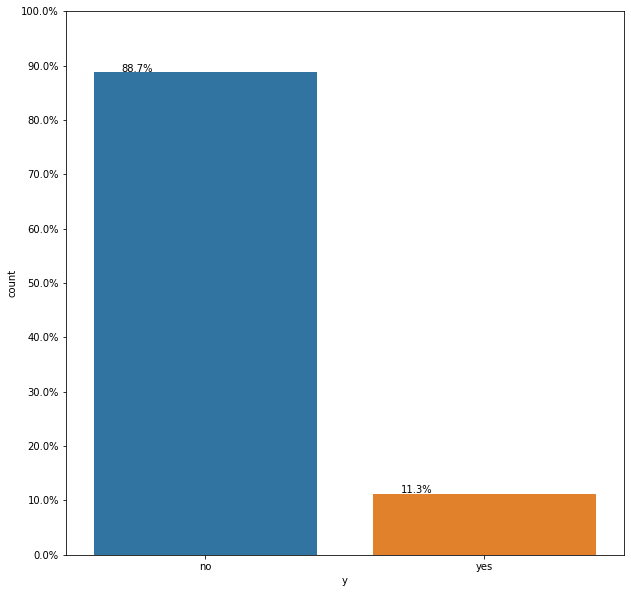

In [ ]:
 
figure(figsize=(10,10))
total=len(data['y'])
plot=sns.countplot(x=data['y'],data=data)
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.pyplot.show()

As from the above plot, we can see that majority of datapoints belong to No class labels with 88.7% and minority of class belongs to 11.3% so the ratio of No:Yes is 8:1.

<h2> EDA </h2>

<h4> 1. Categorical Variables </h4>

In [ ]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=data)
    total=len(data['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()




In [ ]:
def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(data[classes])
    plot=sns.countplot(x=columns,data=data,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()





<h4>1.Job </h4>

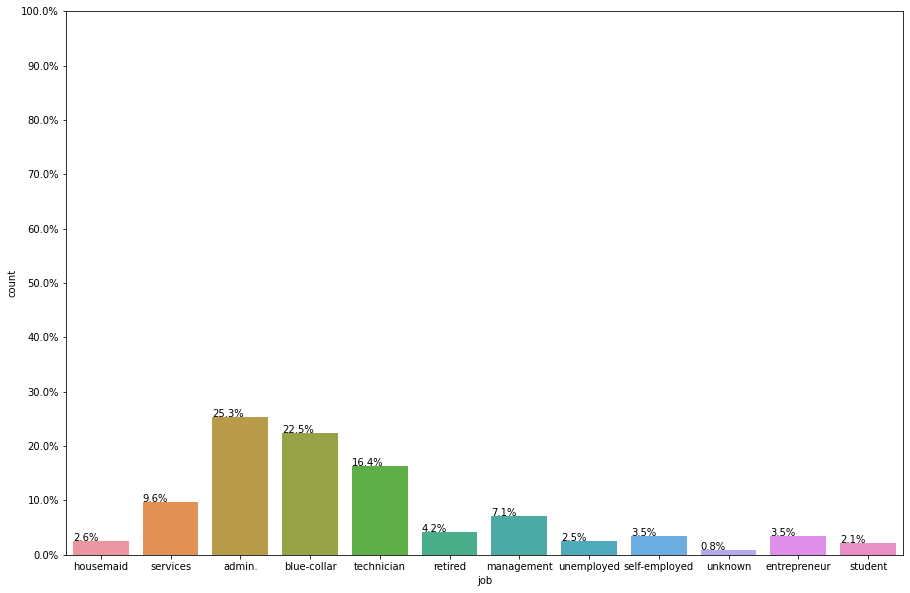

In [ ]:
countplot_columns('job')

From the above plot we can see that people whose job is admin is contacted more by the bank then followed by blue collar 

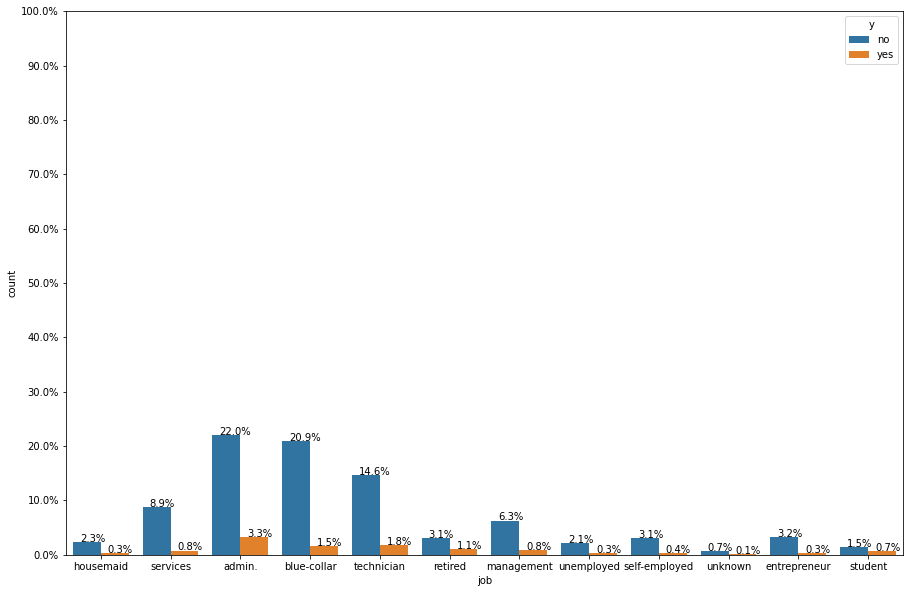

In [ ]:
countplot_target_varaible('job','y')

This above plot is of job category, As we can see that among all the job categories, people who works as an admin subscribed to long term deposits with 3.3%.

<h4>2. Marital</h4>

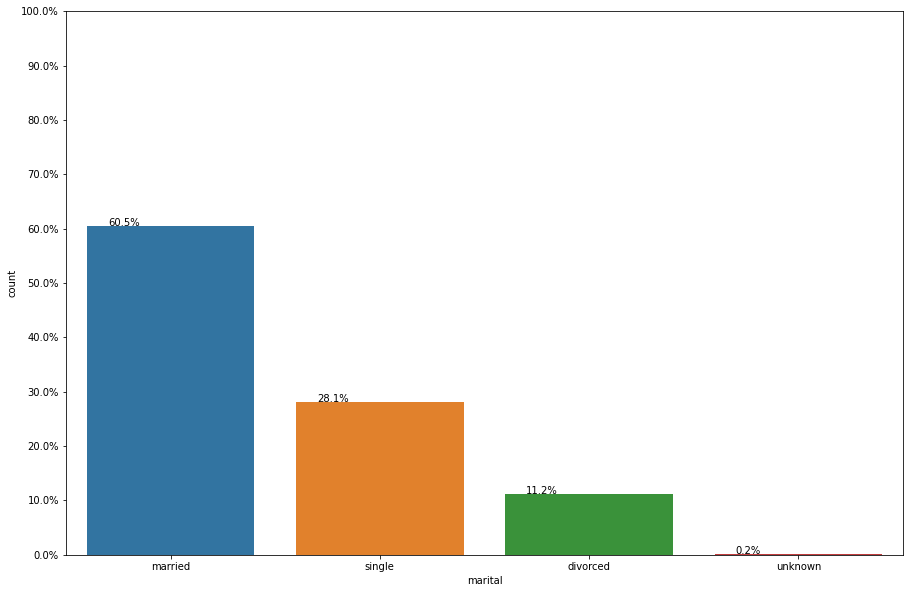

In [ ]:
countplot_columns('marital')

From the above plot customer who has been contacted most are married. About 0.2% of marital status of customer is unknown.

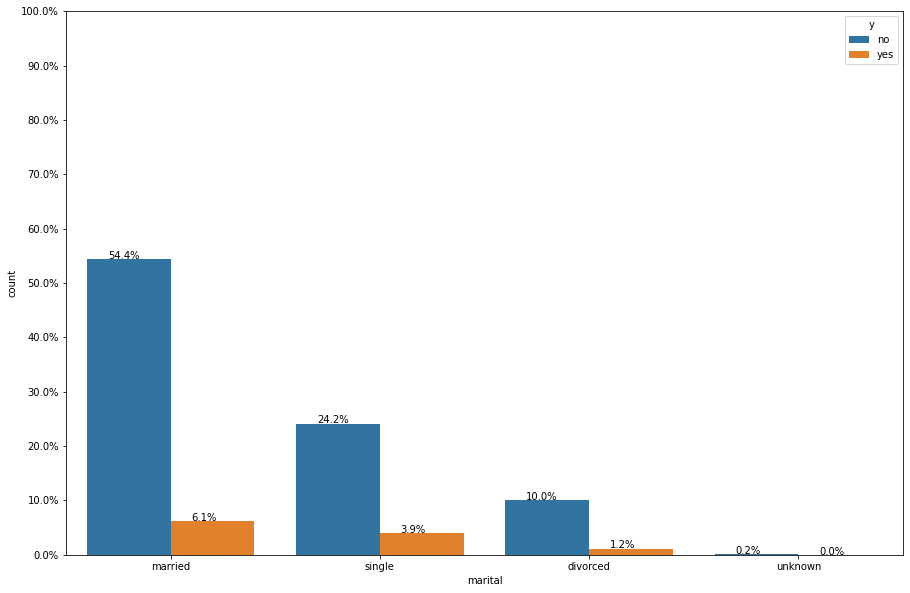

In [ ]:
countplot_target_varaible('marital','y')

From the above plot we can see that married people has subscribed to long term deposits more than any other. People whose status is unknown hasnot subscribed to the long term deposits at all.

<h4>3. Contact Type </h4>

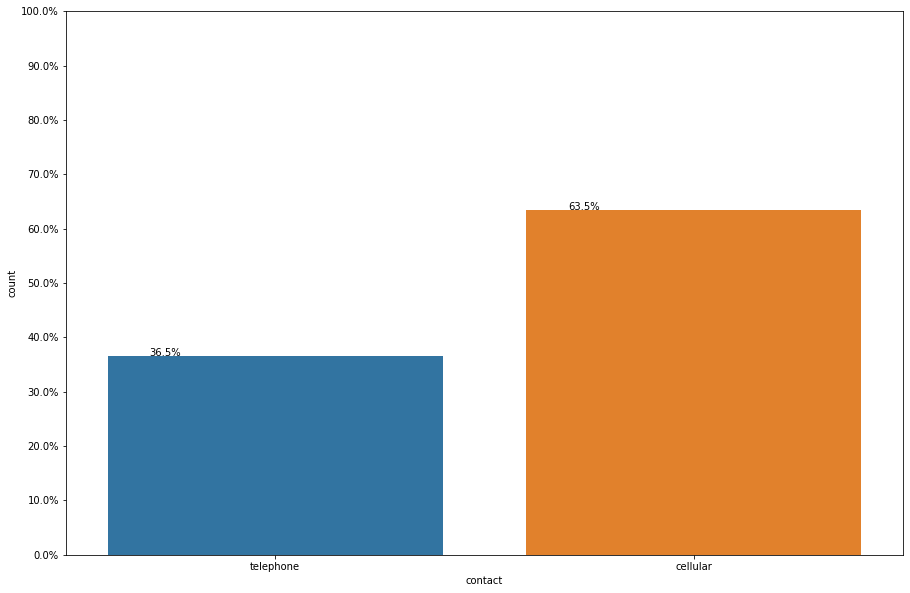

In [ ]:
countplot_columns('contact')

People with contact type cellular has been contacted more than with telephone for long term deposits.

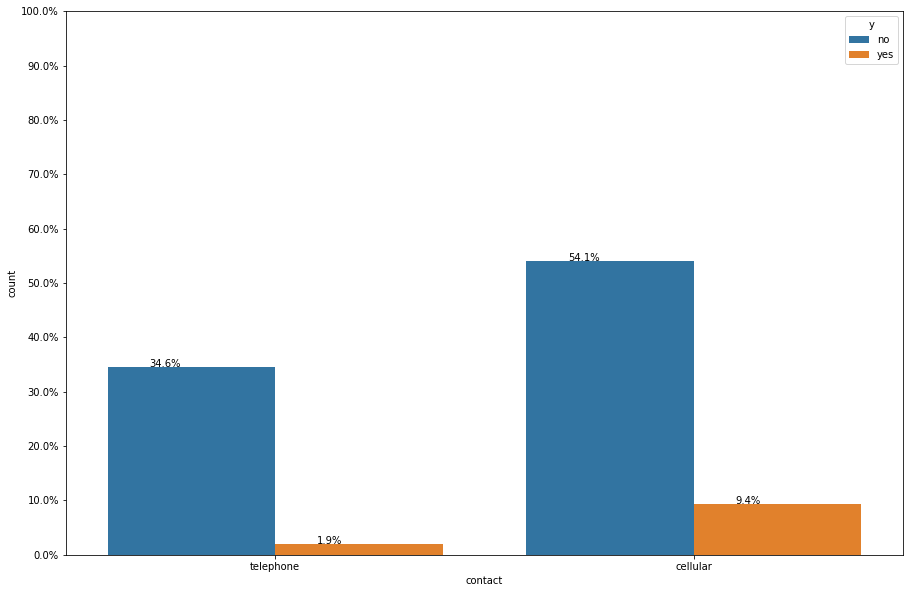

In [ ]:
countplot_target_varaible('contact','y')

People with contact type cellular has subscribed more for long term deposits than telephone

<h4>4. Education</h4>

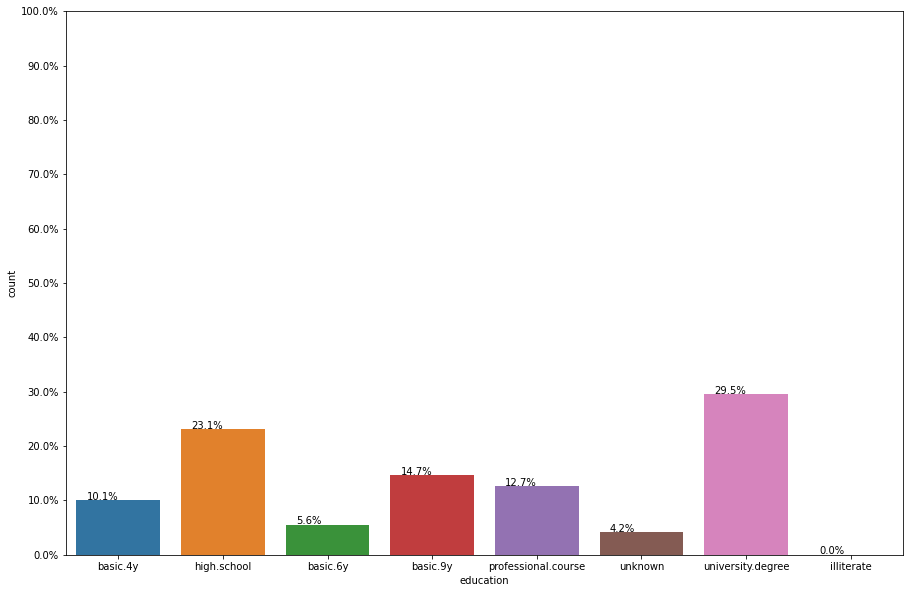

In [ ]:
countplot_columns('education')

Customers who has been contacted are mostly completed university degree then followed by high school.They have not contacted to any person who are illiterate.

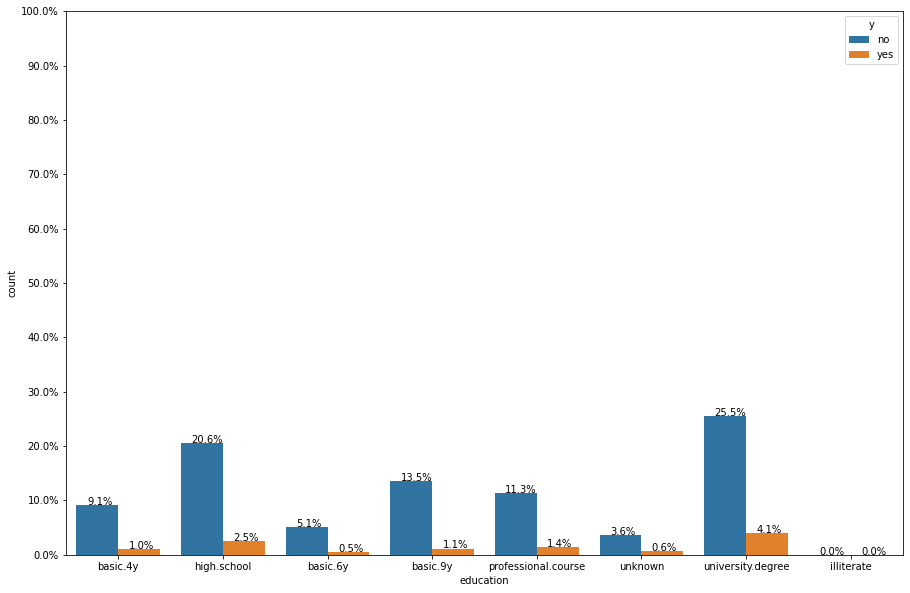

In [ ]:
countplot_target_varaible('education','y')

People with education qualifications, univeristy has subscribed more for long term deposits.

<h4>5. Default </h4>

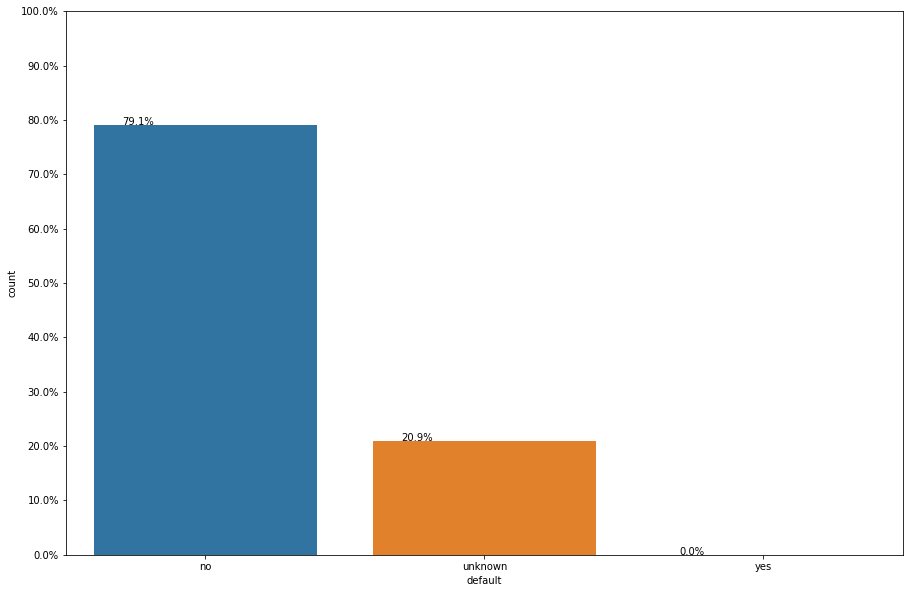

In [ ]:
countplot_columns('default')

From the above plot we can see that bank has contacted to the person more who has no status in default and there no person whose default status is yes. Very few of them are there whose status is unknown.

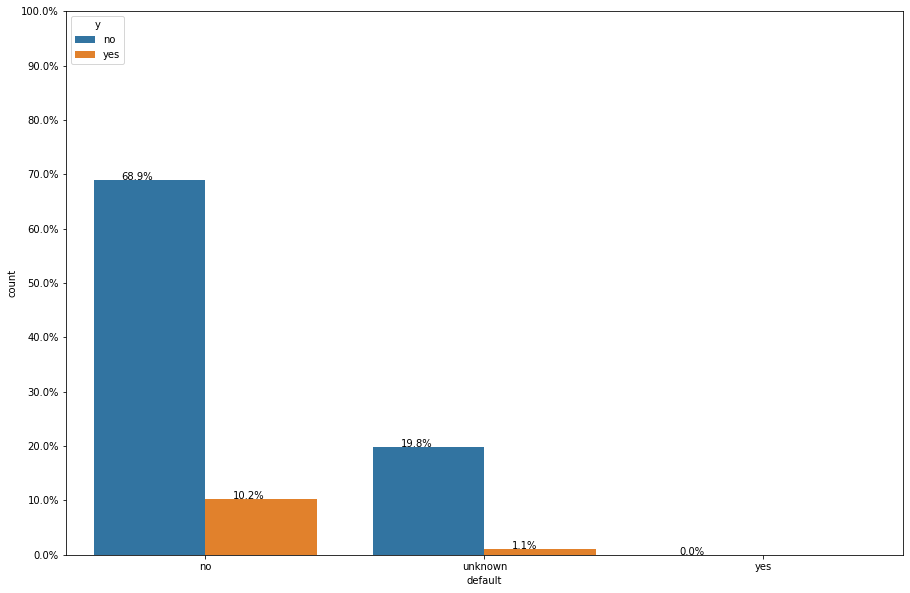

In [ ]:
countplot_target_varaible('default','y')

From the above plot we can observe that people who has no defult has subscribed to the long term deposits. They are most one's who has not subscribed for the deposits as well.

<h4>6. Housing Loan </h4>

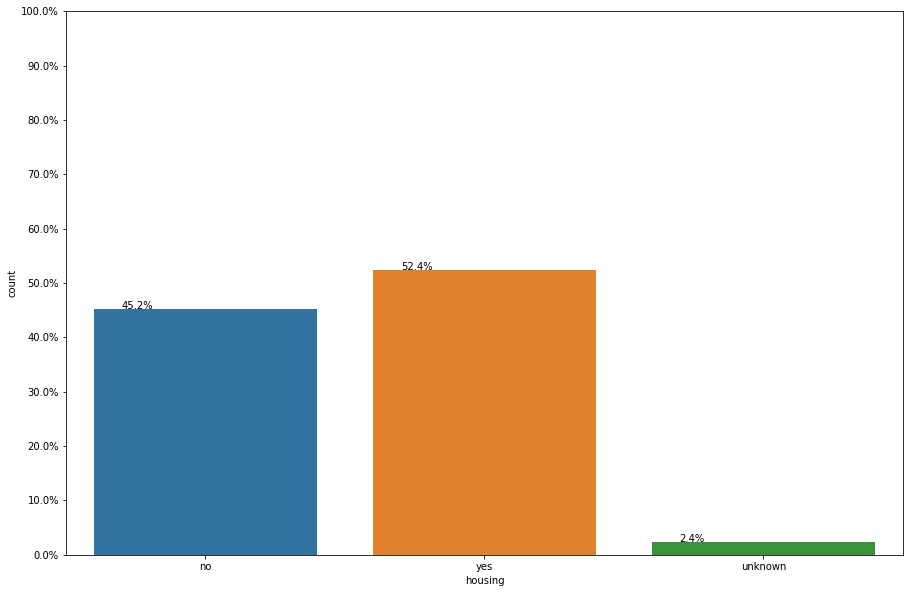

In [ ]:
countplot_columns('housing')

People who have housing loan has been contacted more by the bank. People who has no housing has also been contacted pretty much. People who has status unknown has been least contacted.

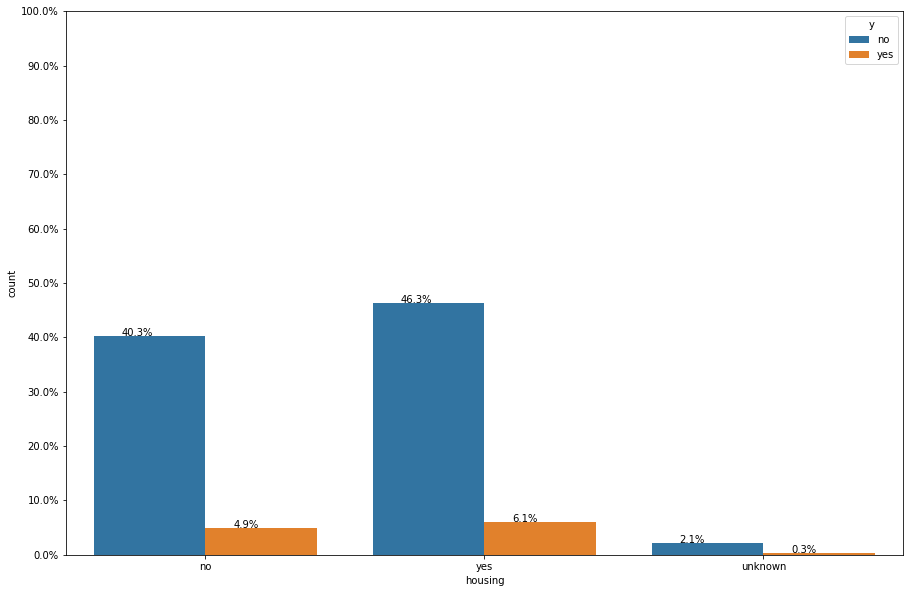

In [ ]:
countplot_target_varaible('housing','y')

People who has housing loan has subscribed more for long term deposits followed by who does not have.

<h4>7. Personal Loan</h4>

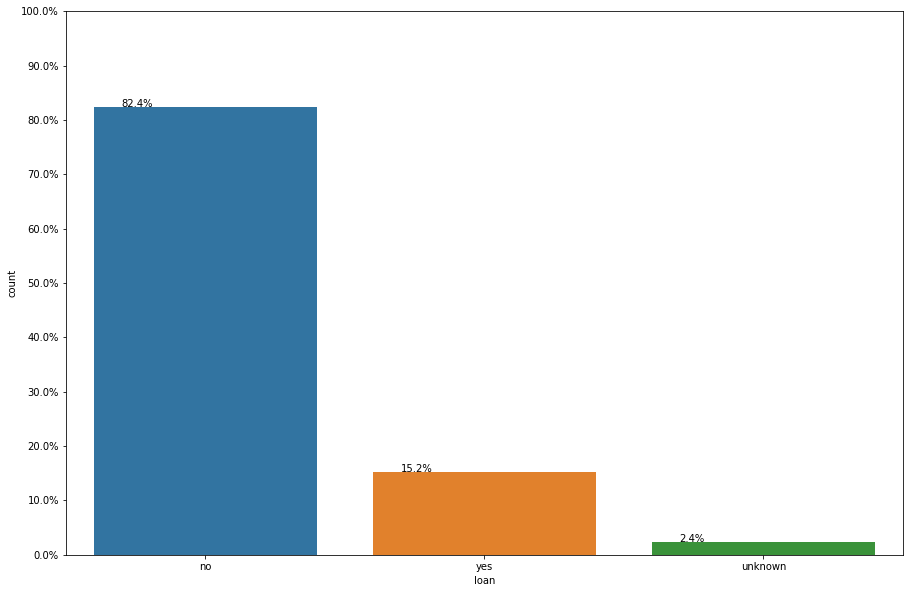

In [ ]:
countplot_columns('loan')

People who doesnot have loan has been more contacted for longer term deposits than who does have

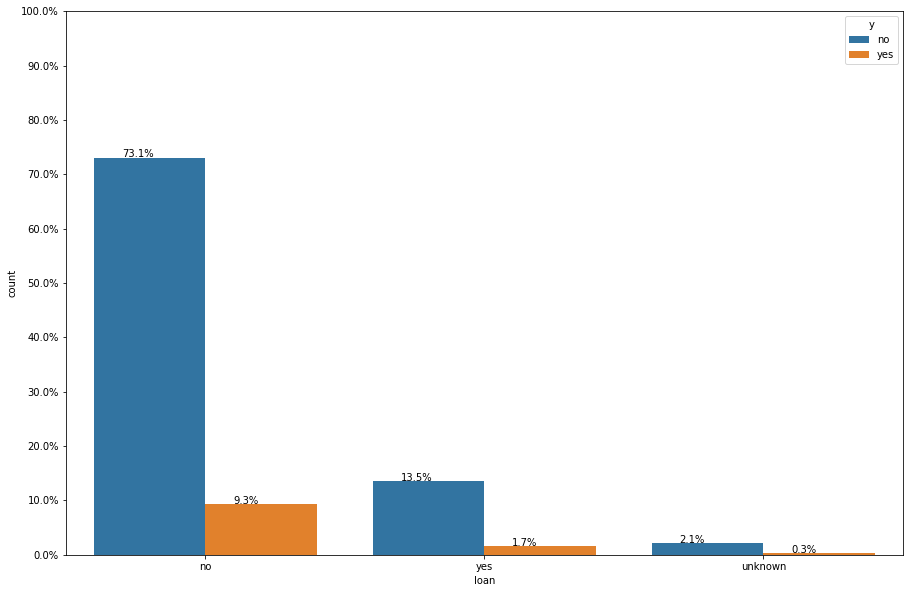

In [ ]:
countplot_target_varaible('loan','y')

People with no personal loan has subscribed more for long term deposits. They are also the ones who has not subscribed for long term deposits

<h4>8. Month </h4>

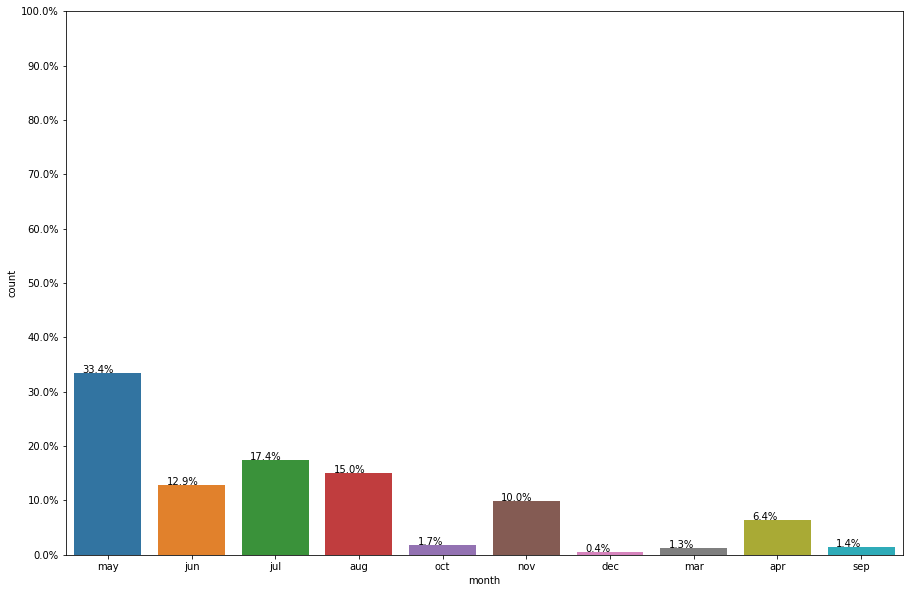

In [ ]:
countplot_columns('month')

People are contacted more in the month of May than anyother months. It is followed by July,August, June.

In [ ]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

It is very interesting from the above query that people are not contacted in the month of January,Februrary.

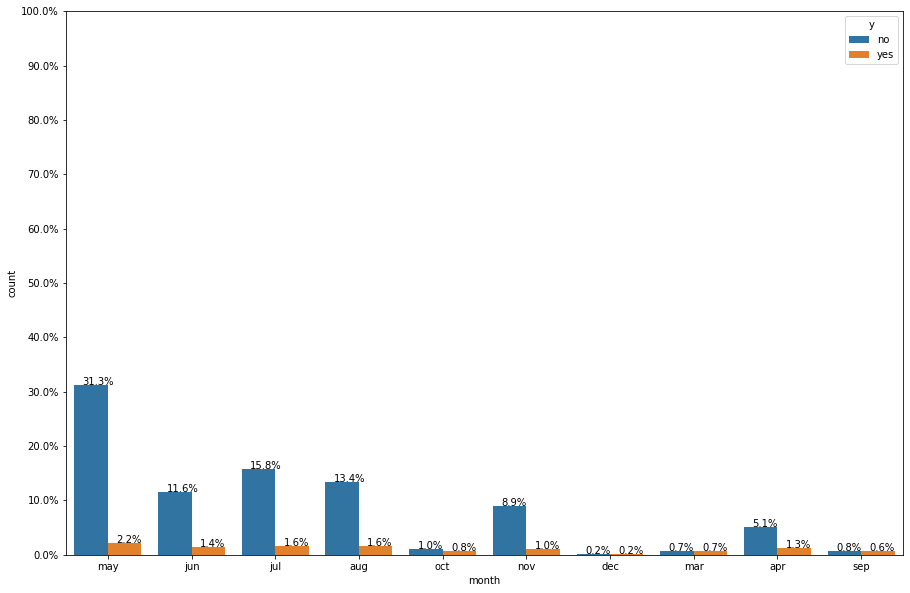

In [ ]:
countplot_target_varaible('month','y')

People who have contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of December,March,September and October and have almost equal chances for subscribing the deposits or not.

<h4>9. Day of Week </h4>

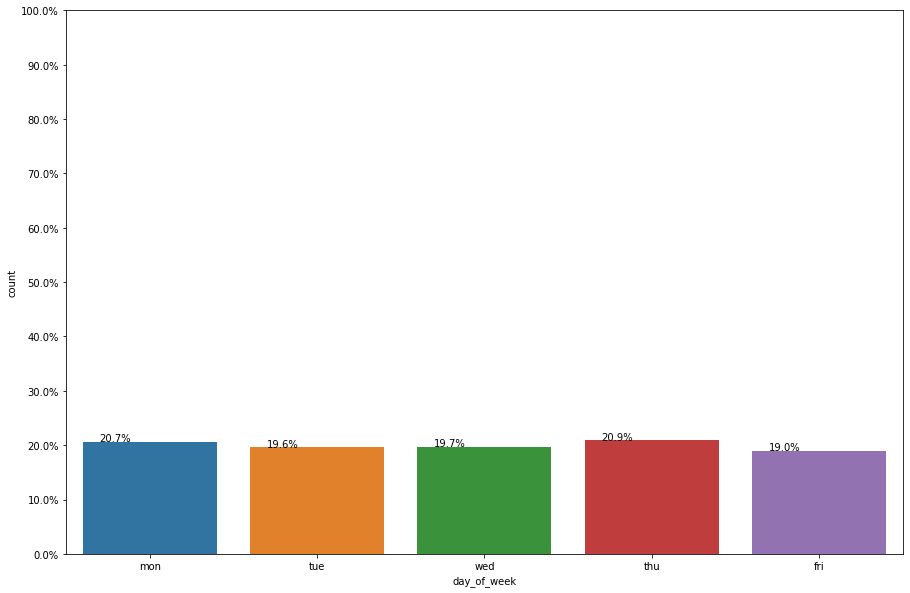

In [ ]:

countplot_columns('day_of_week')

From the above plot we can see that people are contacted from Monday to Friday but not on Saturday and Sunday. In all the day people are contacted with the same percentage.

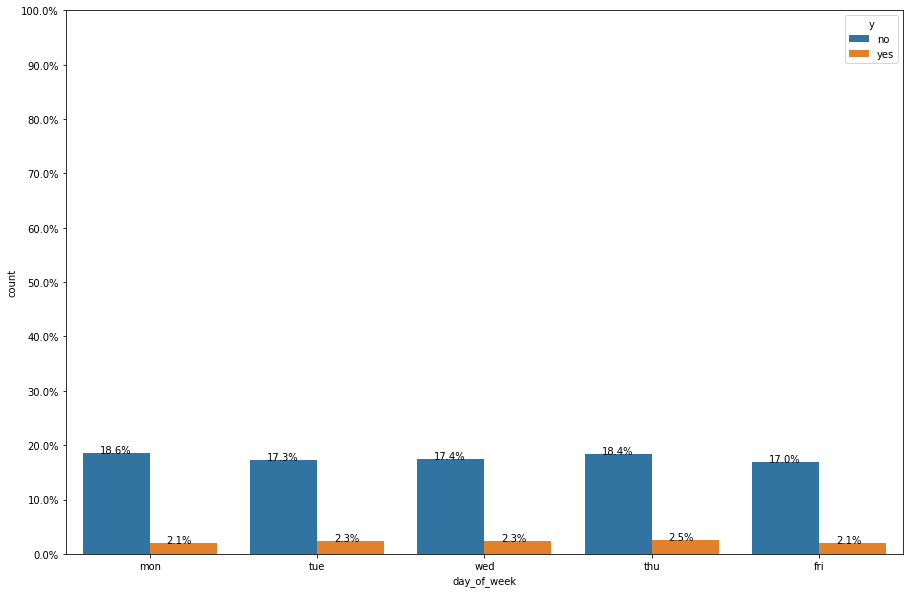

In [ ]:
countplot_target_varaible('day_of_week','y')

In all the days they have equal chances for subscribing and not subscribing the term deposits. Day_of_week maynot be very helpful in predciting whether the customer will subscribe for long term deposits or not.

<h4> 10. Outcome from previous marketing strategy

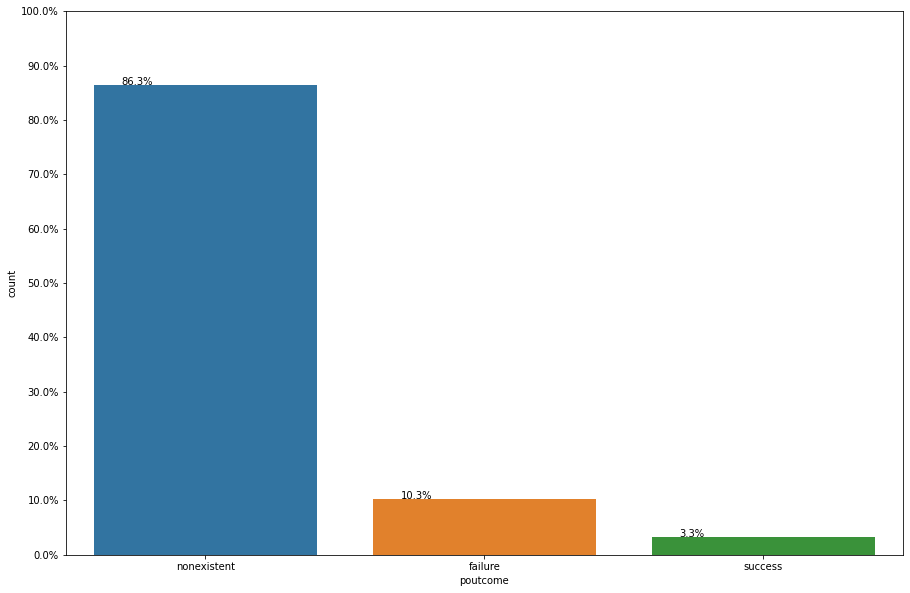

In [ ]:
countplot_columns('poutcome')

From this plot it is evident that majority of outcome of previous campaigns are non existent. Very few people from previous marketing campaign has subscribed for long term deposits.

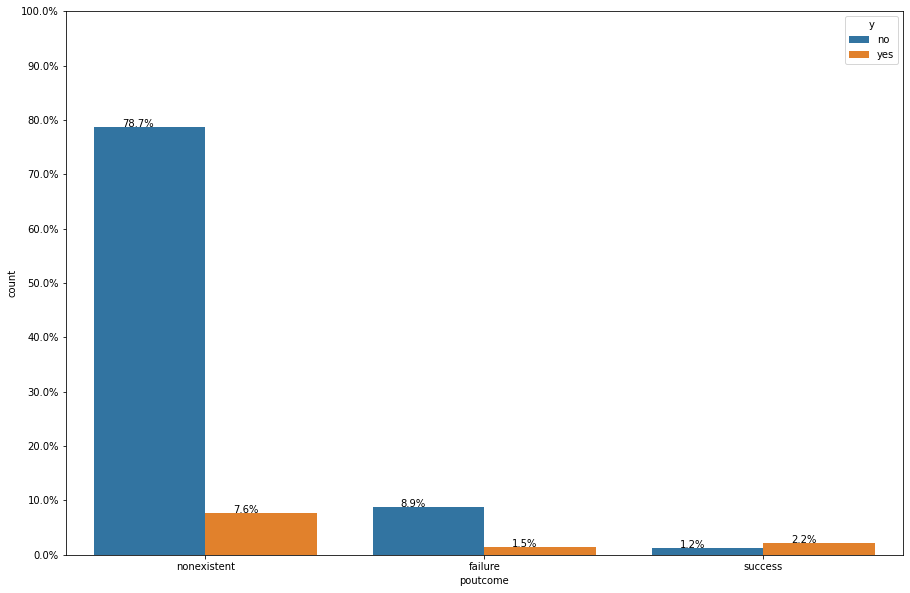

In [ ]:
countplot_target_varaible('poutcome','y')

From the above plot, whose previous outcome is non-existent has actually subscribed more than any other people belonging to previous outcome. It is also clear that people belonging to success category of previous outcome has turned down for longer deposits. But if ratio is considered,people with previous outcome as success has subscribed to long term deposits from the current marketing strategy more than people with previous outcome as success who turned down the long term deposits from the current marketing strategy.

<h3> 2. Numerical Features </h3>

In [ ]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.pyplot.legend()




In [ ]:
def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=data[y],y=data[columns],hue=data['y'],showfliers=False)
    plt.pyplot.title(columns.upper())


<h4>1. Age </h4>

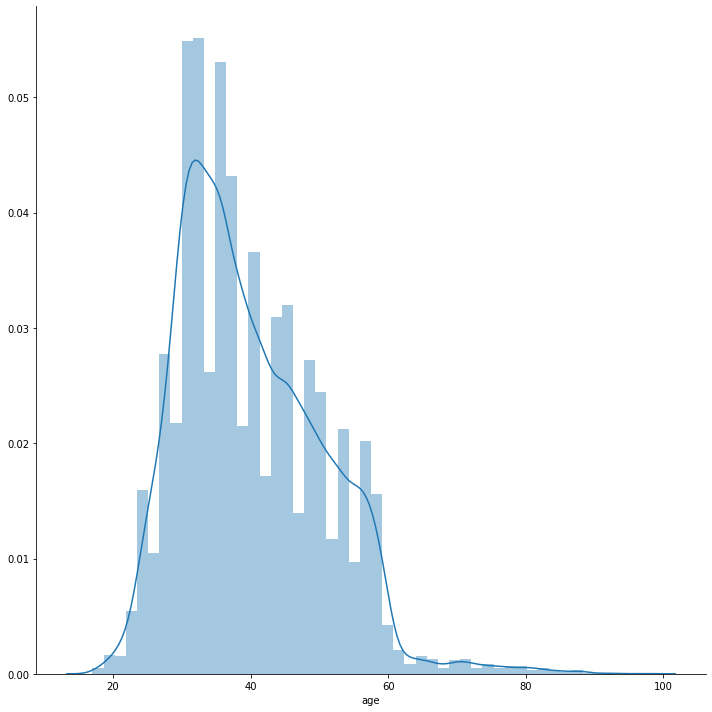

In [ ]:
plotting_kd(data,'age')

From the above plot there is an evidence of outliers after the age of 60. Lets check with the more prominent plot to determine outliers i.e Boxplot

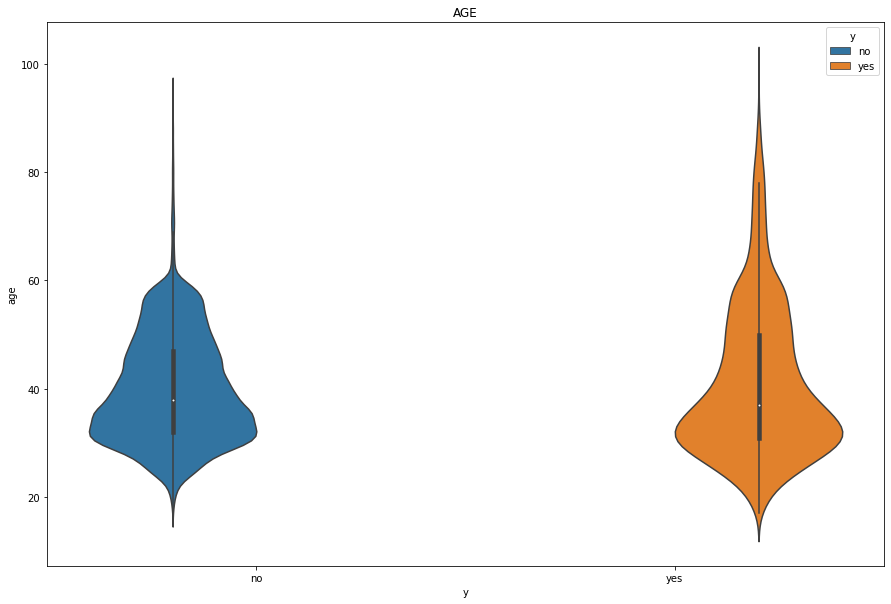

In [ ]:
violinplot_columns('age')

From the above it is clearly visible that there are outliers present for both the class. In No class, outliers are present above age 70 and for Yes class, outliers are present above age 75. Median for No class is around 40 which is same for Yess class. Also, it is visible that IQR range is almost overlapping so age might not be very helpful in predicting class label.

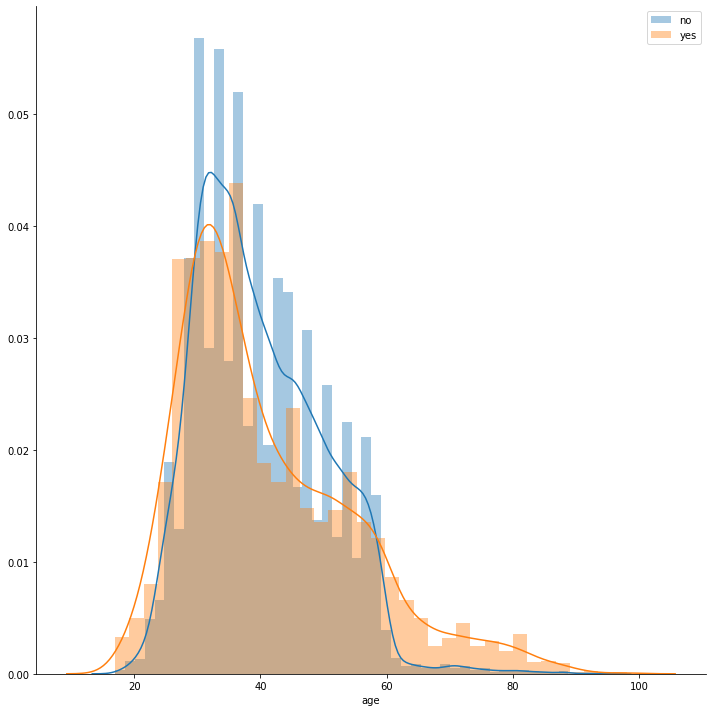

In [ ]:
plotting_kd(data,'age',hue='y')

Plotting kdeplot with hue as classes it is more clear that age might not be very helpful in prediction of class labels because there is so much of overlapping.

<h4> 2. Duration </h4>

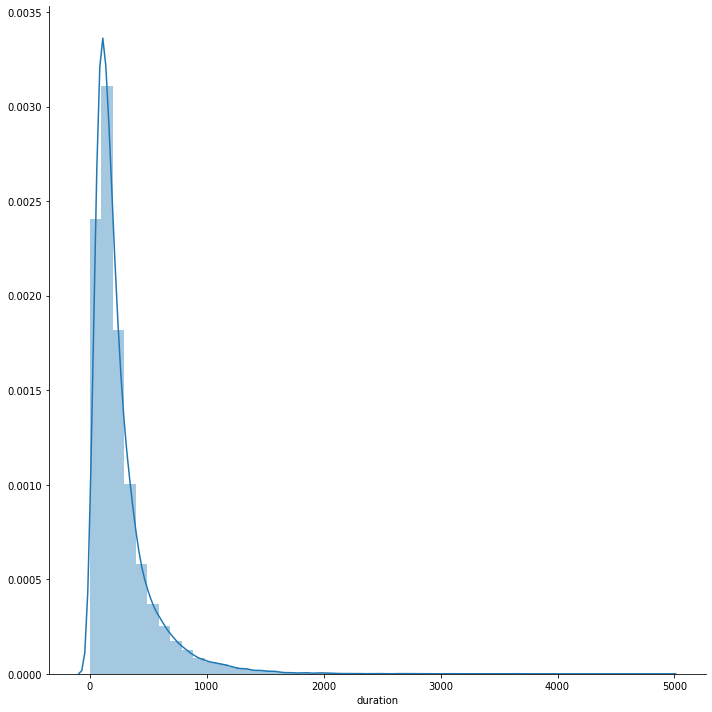

In [ ]:
plotting_kd(data,'duration')

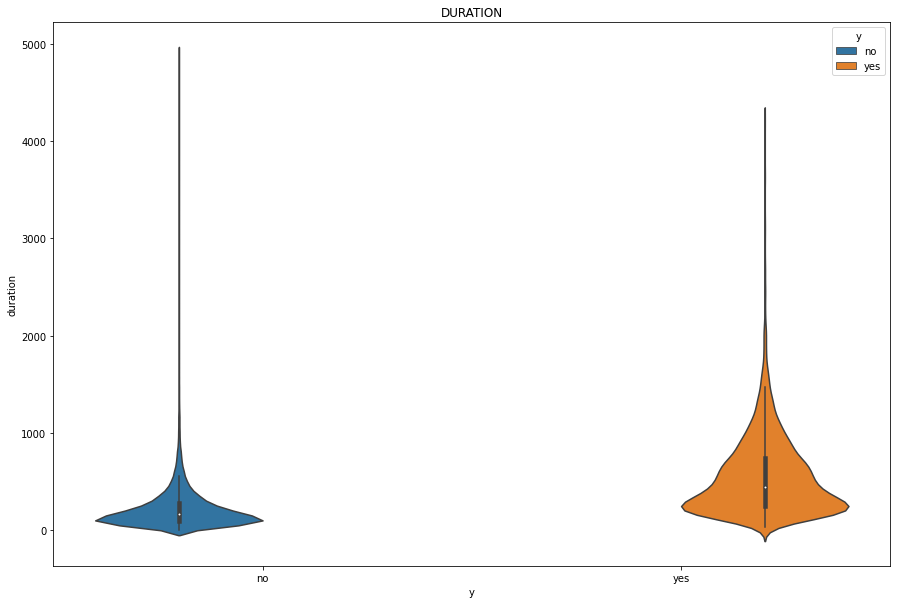

In [ ]:
violinplot_columns('duration')

Any duration of call with class labels as no,more than 1000 are considered as outliers while with class labels more than 1500 would be considered as outliers.

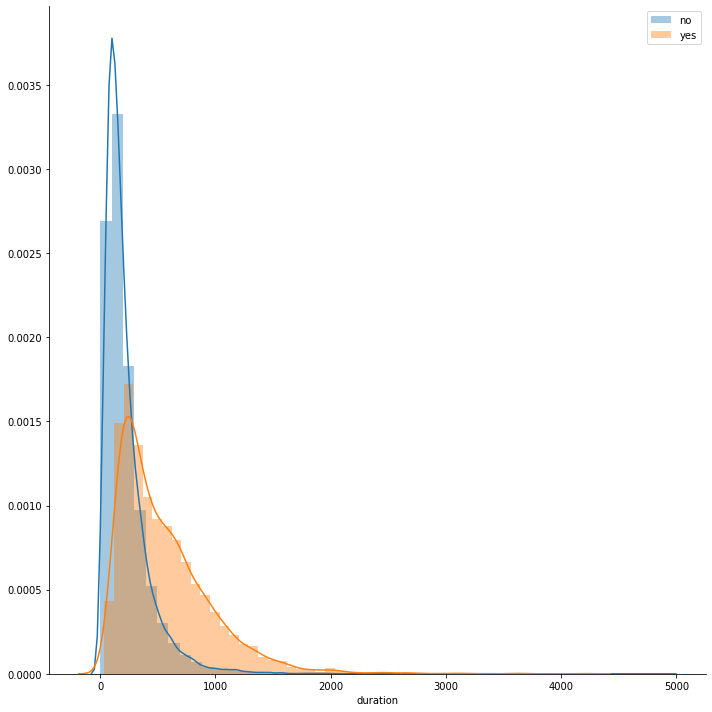

In [ ]:
plotting_kd(data,'duration',hue='y')

From the above 3 plots it is evident that duration feature would be very helpful in predicting class labels.It is also mentioned in the research paper but to make realistic predictive model we dont have to use this column. Most of the call duration with people who have not subscribed for the long term deposits are between 0-1000 and with people who have subscribed are between 0-2000.

<h4>3. Campaign </h4>

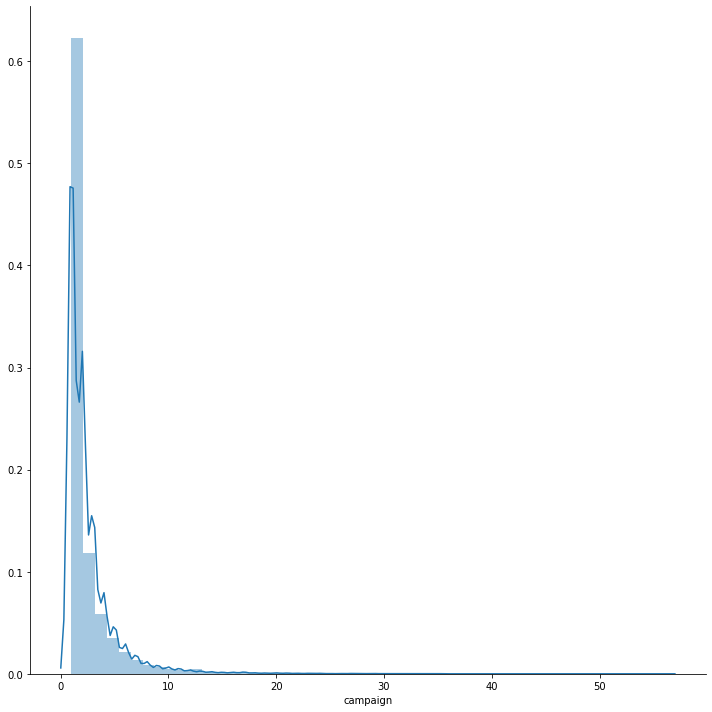

In [ ]:
plotting_kd(data,'campaign')

From the above graph it is not very clear that outliers are present or not. Lets plot boxplot

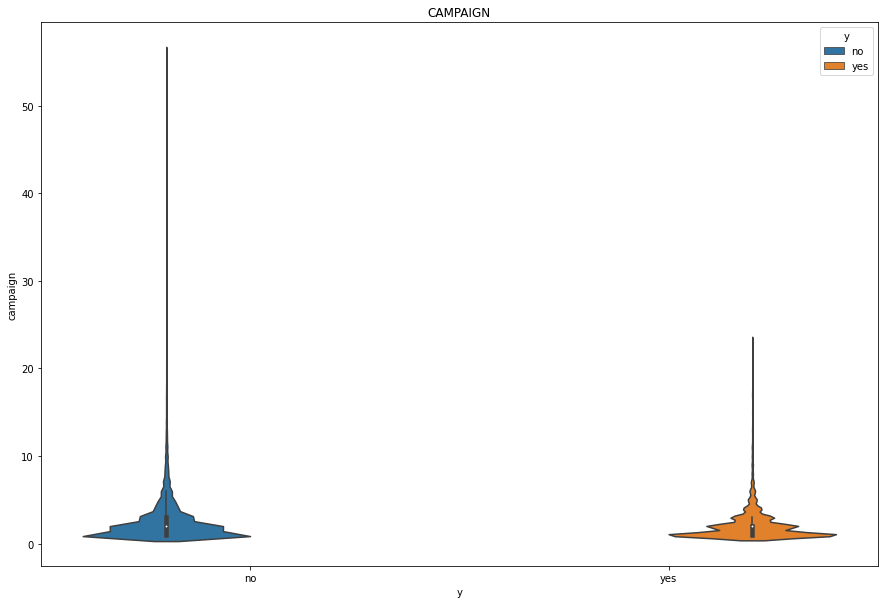

In [ ]:
violinplot_columns('campaign')

For any class labels, campaigns more than 10 are considered as outliers.

From the above plot there are so many outliers are present for No class than yes class. Also it seems like this plot maynot be very helpful in predicting class variables. Lets plot kdplot with hue

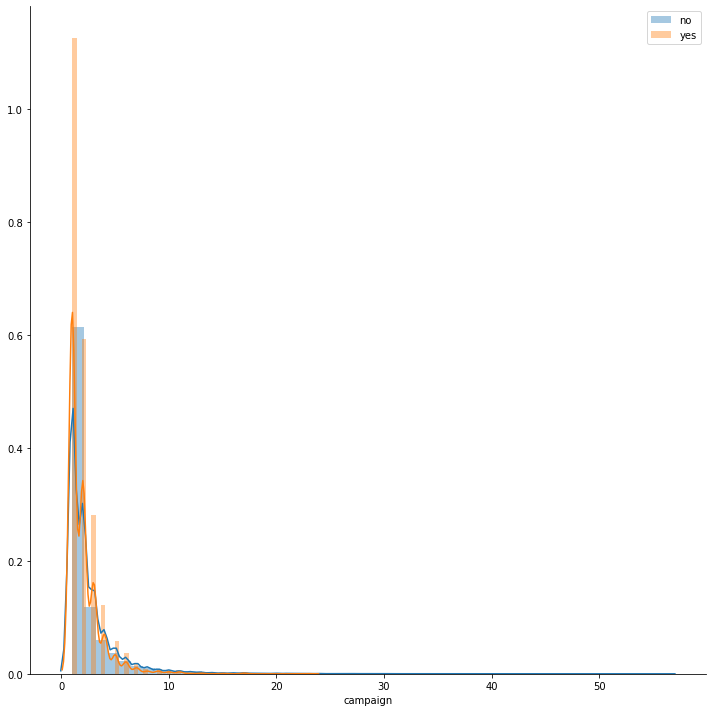

In [ ]:
plotting_kd(data,'campaign',hue='y')

This graph tells us that campaign may not be very useful for determing class labels as there is very much overlapping for both the classes.

<h4>4. Pdays </h4>

In [ ]:
data['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

From the data 999 means the person has not been contacted before. It is very evident that huge number of people has not been contacted. 

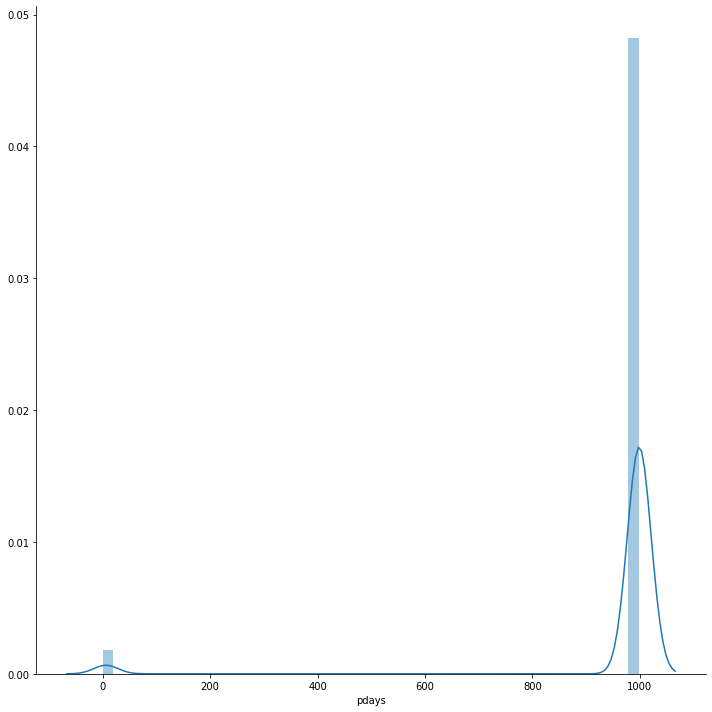

In [ ]:
plotting_kd(data,'pdays')

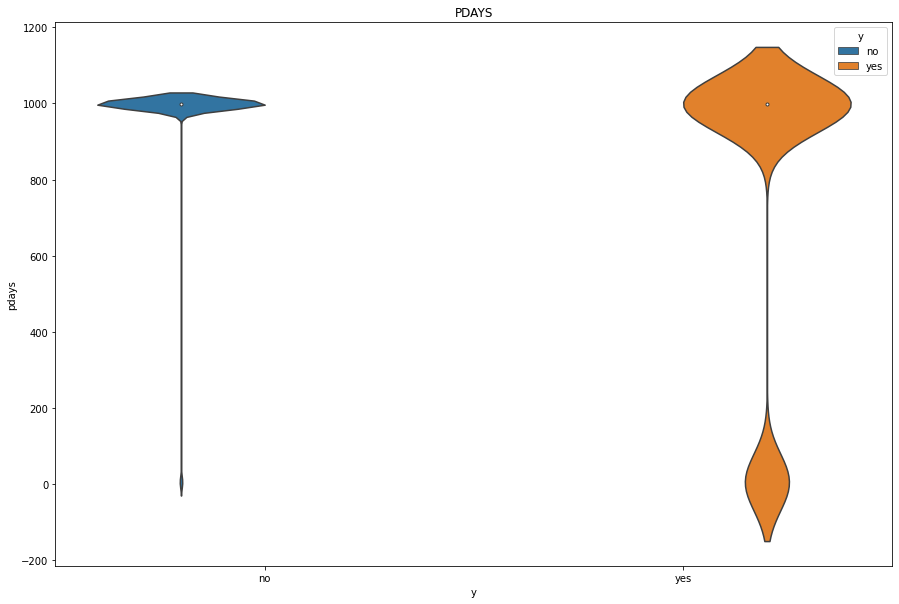

In [ ]:
violinplot_columns('pdays')

From the plot it is not very clear but the IQR range for the both the classes are overlapping. Lets try to get the 25,50,75 percentile for this feature.

In [ ]:
percentile=[0,25,50,75,99]
for values in percentile:
    print("Percentile values",values)
    print("For yes class")
    print(np.percentile(data[data['y']=='yes'].pdays,values))
    
    print("For No Class")
    print(np.percentile(data[data['y']=='no'].pdays,values))
    print()

Percentile values 0
For yes class
0.0
For No Class
0.0

Percentile values 25
For yes class
999.0
For No Class
999.0

Percentile values 50
For yes class
999.0
For No Class
999.0

Percentile values 75
For yes class
999.0
For No Class
999.0

Percentile values 99
For yes class
999.0
For No Class
999.0



This shows that pdays have almost same percentile values for both the class labels.

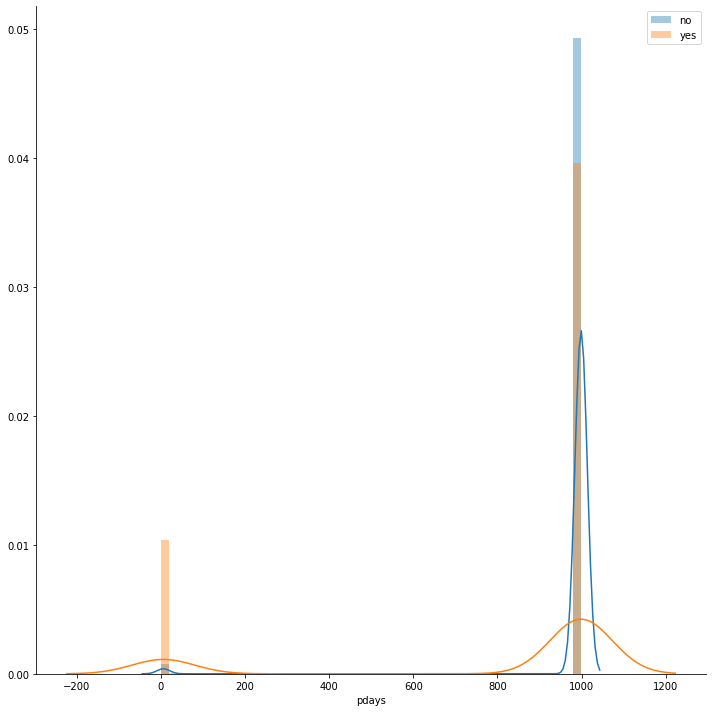

In [ ]:
plotting_kd(data,'pdays',hue='y')

From the above plot with pdays as 999 we can use it to determine the class labels. As we know from the dataset pdays with 999 means they have not been contacted before.

<h4>5. Previous </h4>

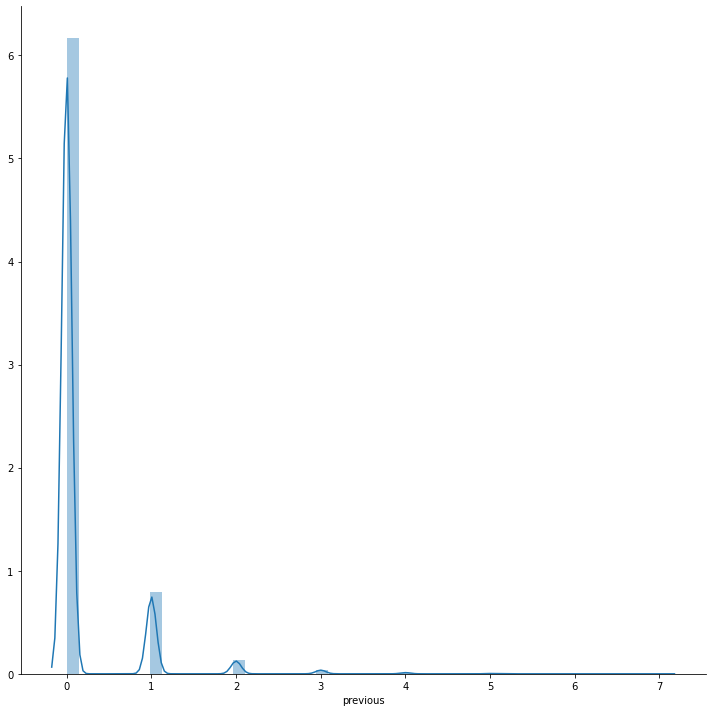

In [ ]:
plotting_kd(data,'previous')

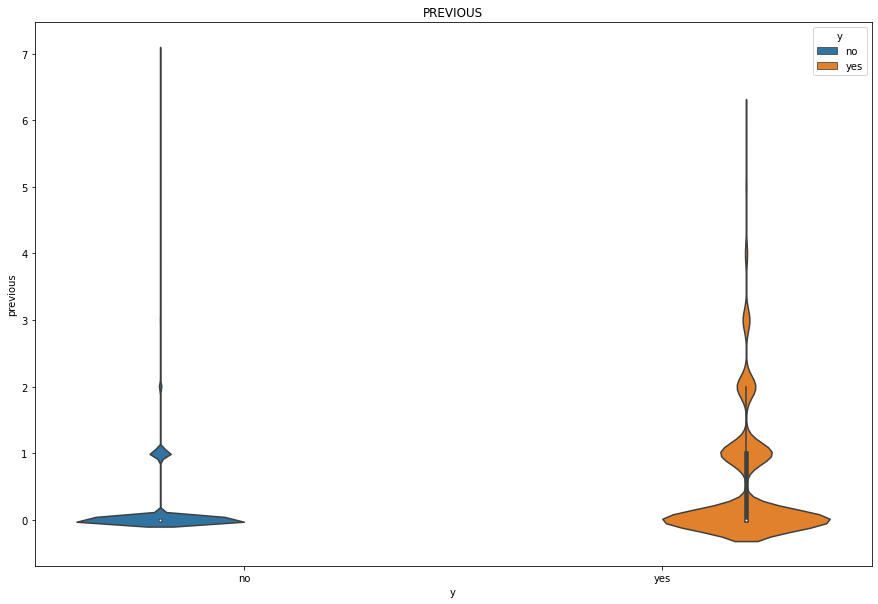

In [ ]:
violinplot_columns('previous')

People who has contacted once for the previous campaign has subscribed for long terem deposits. For class no, there are so many outliers  starting with value 1 but for yes class, outliers are present from value 3.

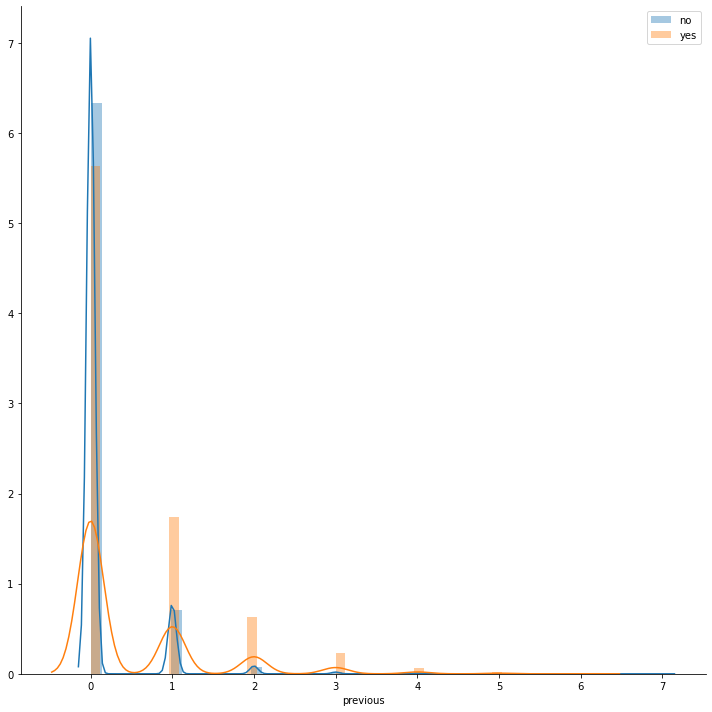

In [ ]:
plotting_kd(data,'previous',hue='y')

From the above 2 plots it is visible that previous feature would be helpful in predicting the class labels. Lets try to get median of both the classes.

In [ ]:
print(np.percentile(data[data['y']=='yes'].previous,50))
print(np.percentile(data[data['y']=='no'].previous,50))

0.0
0.0


<h4> Emp.Var.Rate </h4>

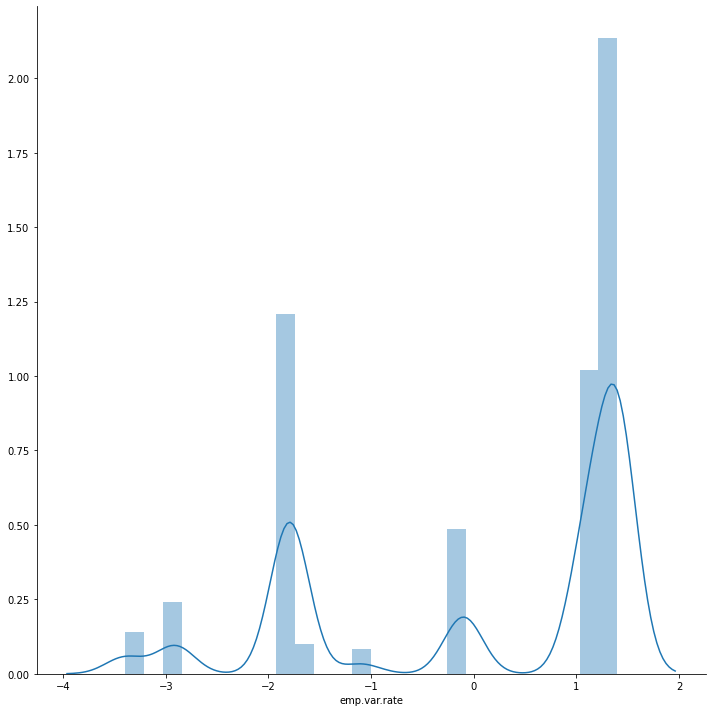

In [ ]:
plotting_kd(data,'emp.var.rate')

From the above plot we are not able to determine whether outliers are present.

<h4> 6 Emp.Var.rate </h4>

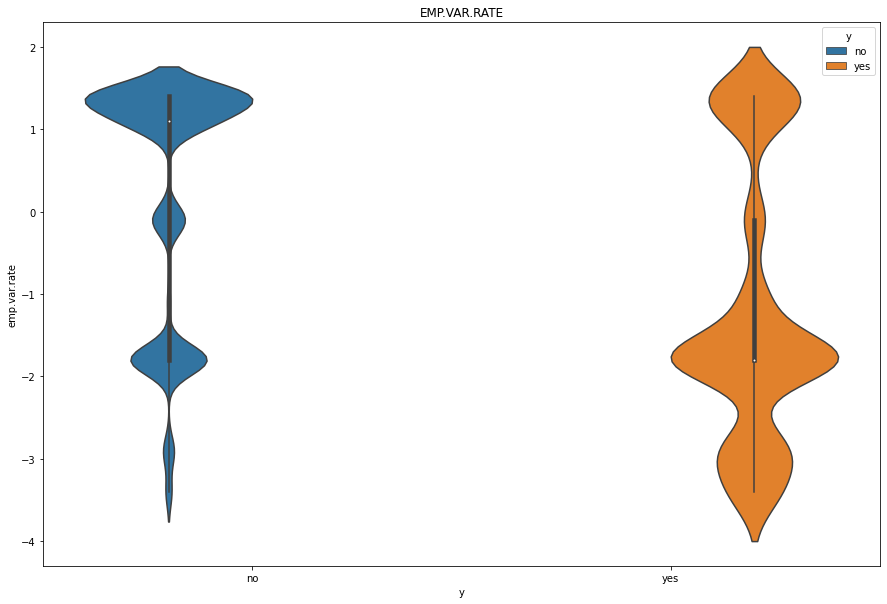

In [ ]:
violinplot_columns('emp.var.rate')

There are no outliers present for any class for this feature.

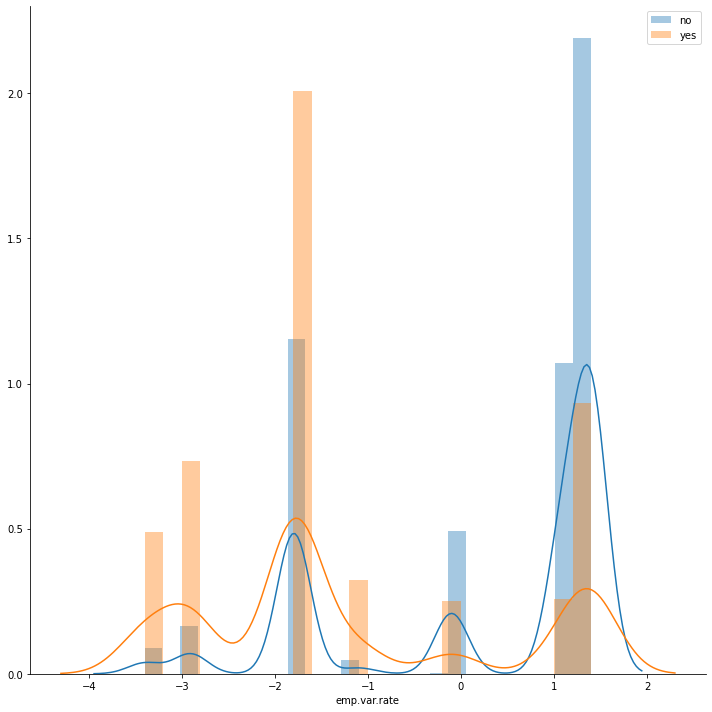

In [ ]:
plotting_kd(data,'emp.var.rate',hue='y')

Plotting box tells us 2 things that emp.var.rate fetaure would be very useful in predicting labels and also there are no outliers present

<h4>7. Cons.price.idx </h4>

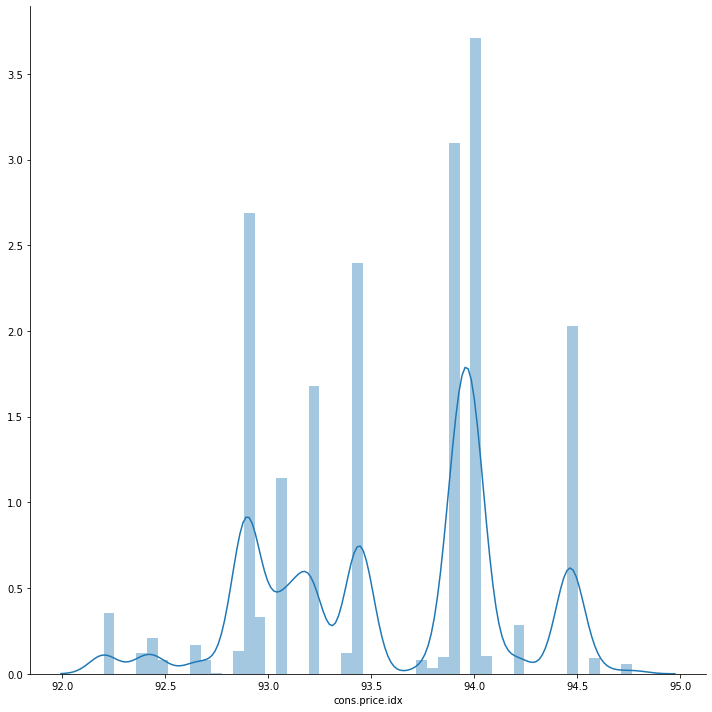

In [ ]:
plotting_kd(data,'cons.price.idx')

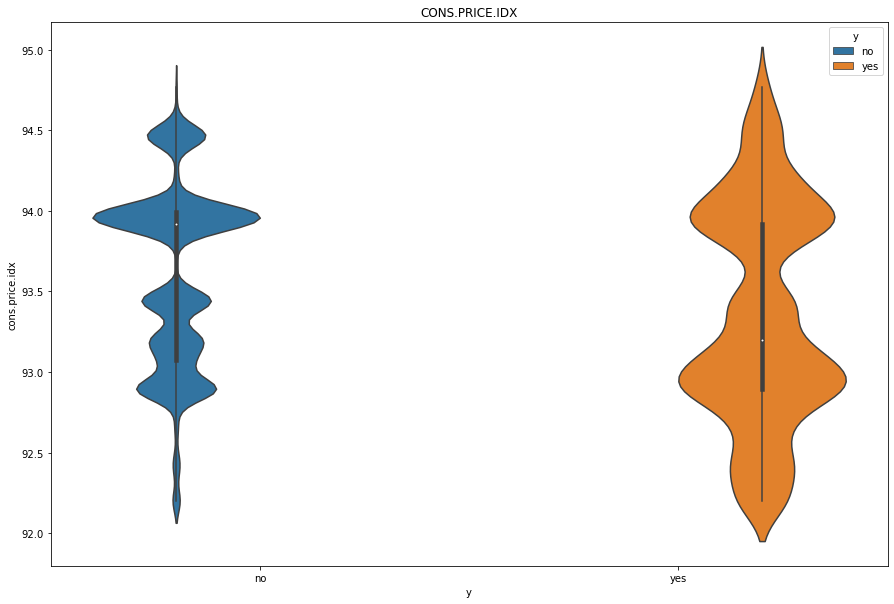

In [ ]:
violinplot_columns('cons.price.idx')

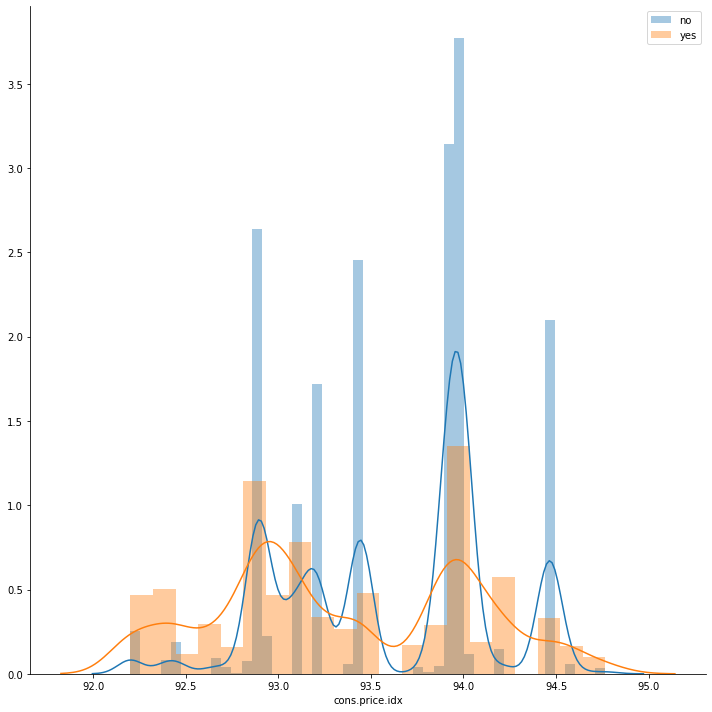

In [ ]:
plotting_kd(data,'cons.price.idx',hue='y')

From the above plots, cons.price.idx doesnot contain any outliers and they would also be very much helpful in predicting class labels.

<h4>8. Euribor 3m</h4>

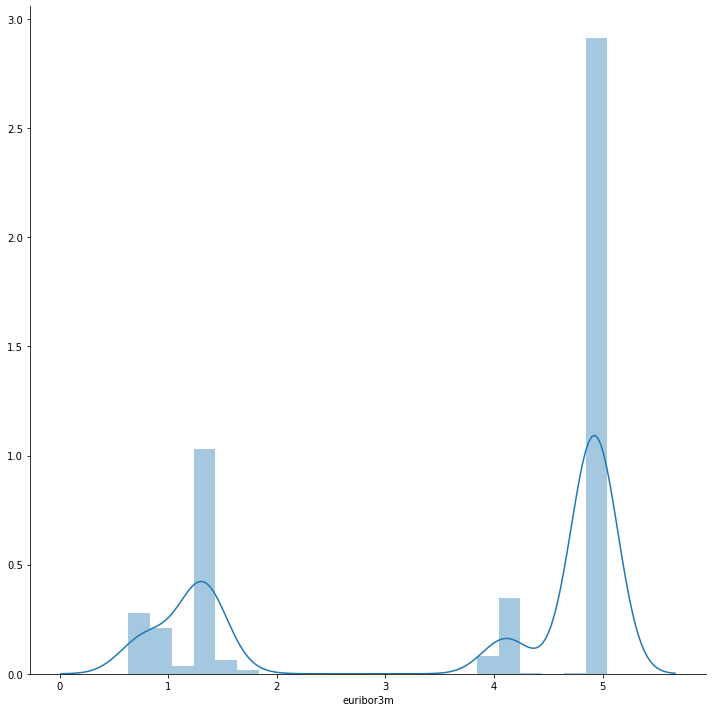

In [ ]:
plotting_kd(data,'euribor3m')

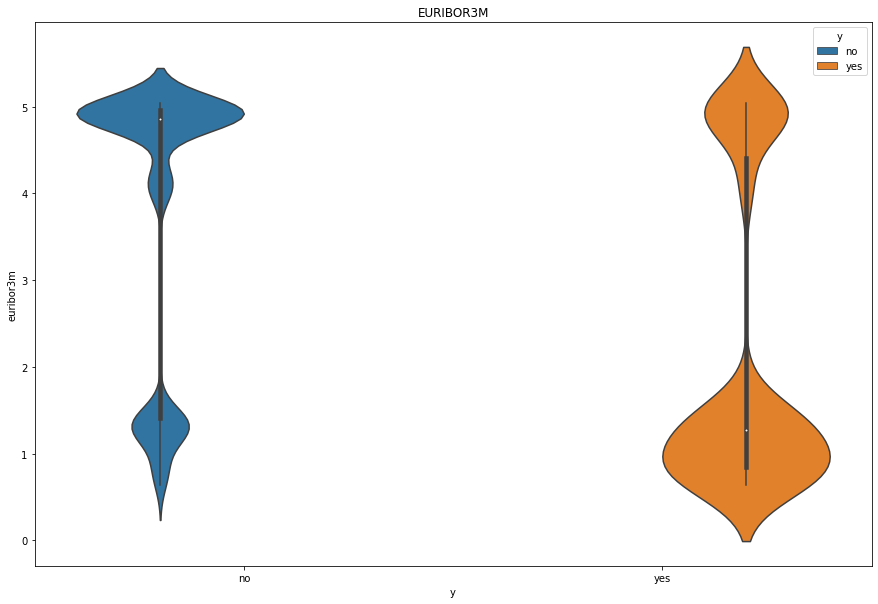

In [ ]:
violinplot_columns('euribor3m')

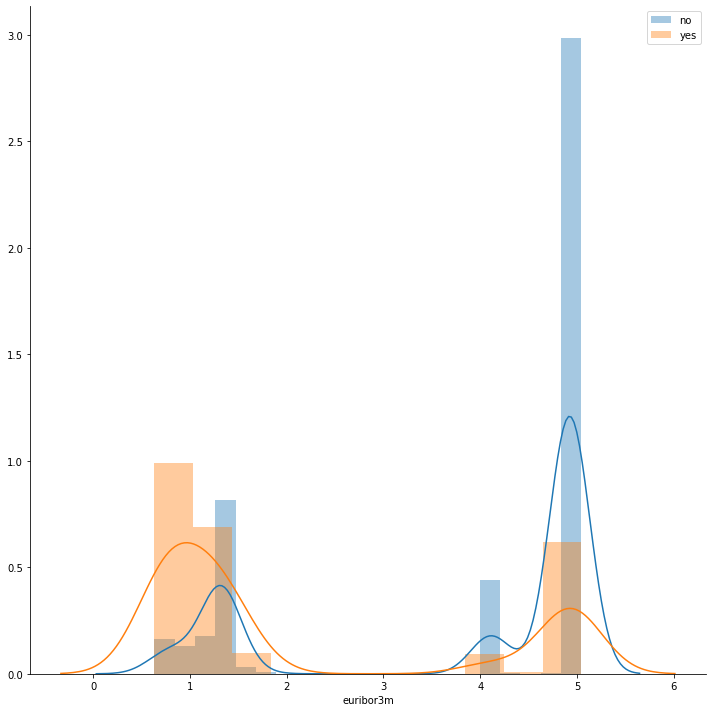

In [ ]:
plotting_kd(data,'euribor3m',hue='y')

Euribor3m doesnot contain outliers and would be very much helpful in predicting the class labels.

<h4>9. Nr.employed </h4>

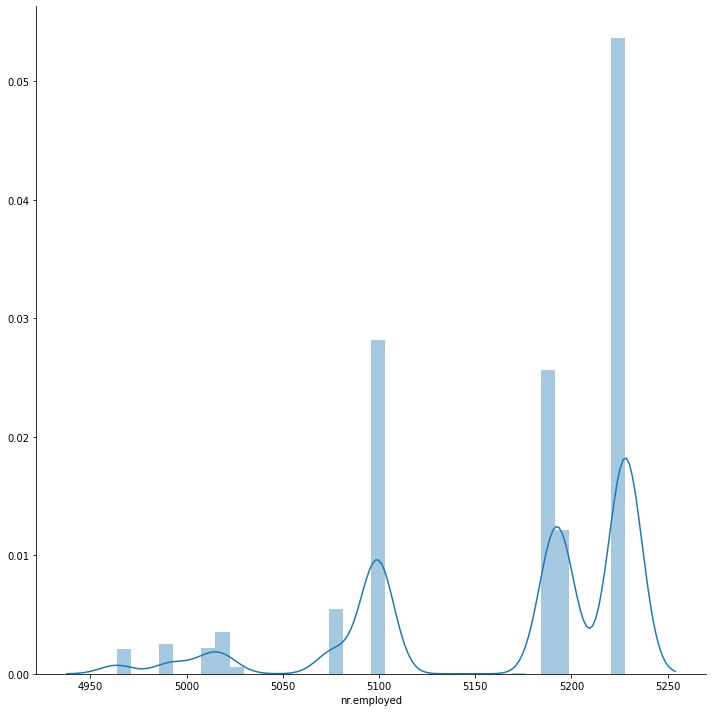

In [ ]:
plotting_kd(data,'nr.employed')

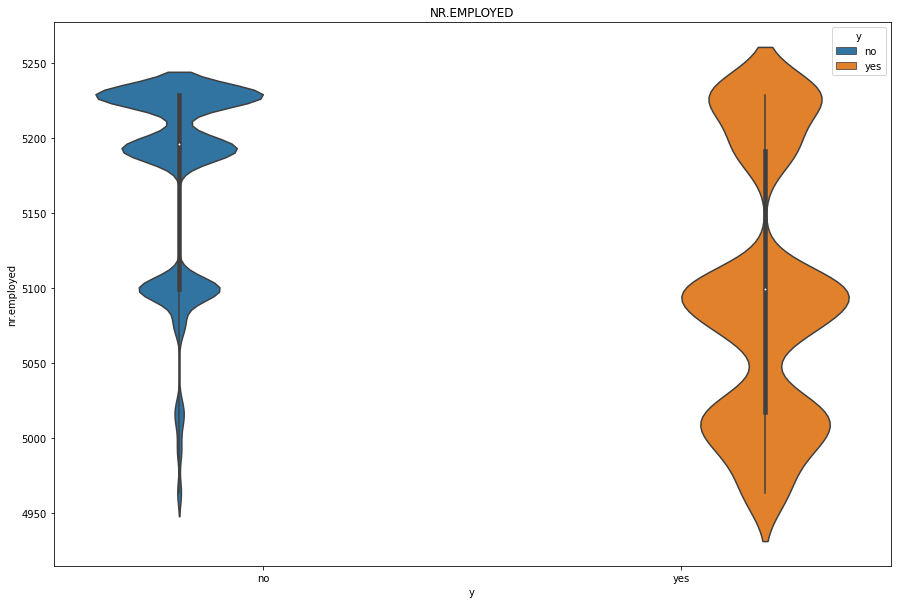

In [ ]:
violinplot_columns('nr.employed')

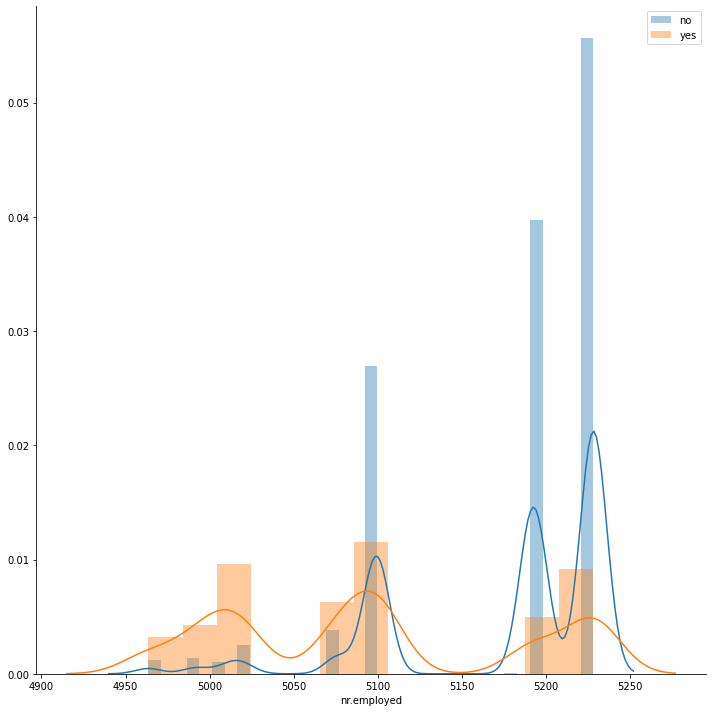

In [ ]:
plotting_kd(data,'nr.employed',hue='y')

From this plot nr.employed would also be very much helpful in predicting class labels.

<h4>10. Cons.conf.idx </h4>

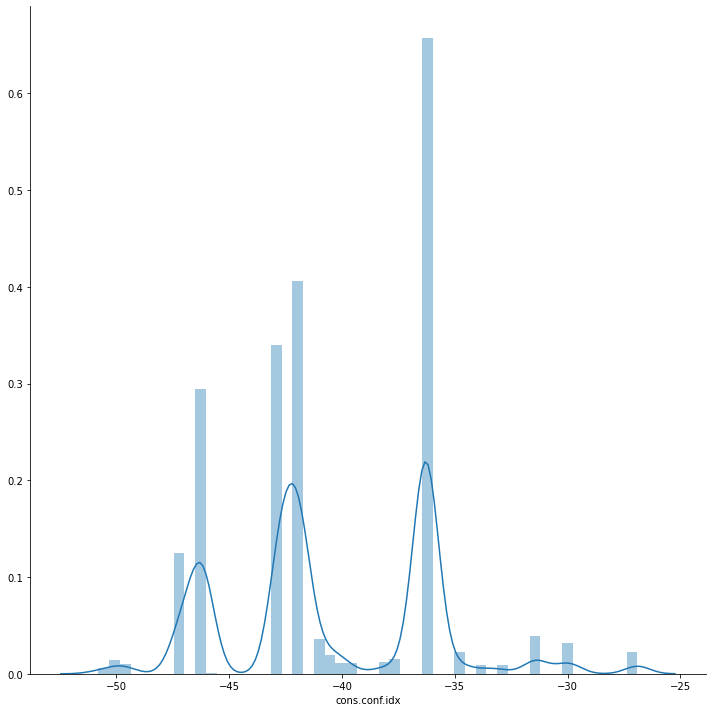

In [ ]:
plotting_kd(data,'cons.conf.idx')

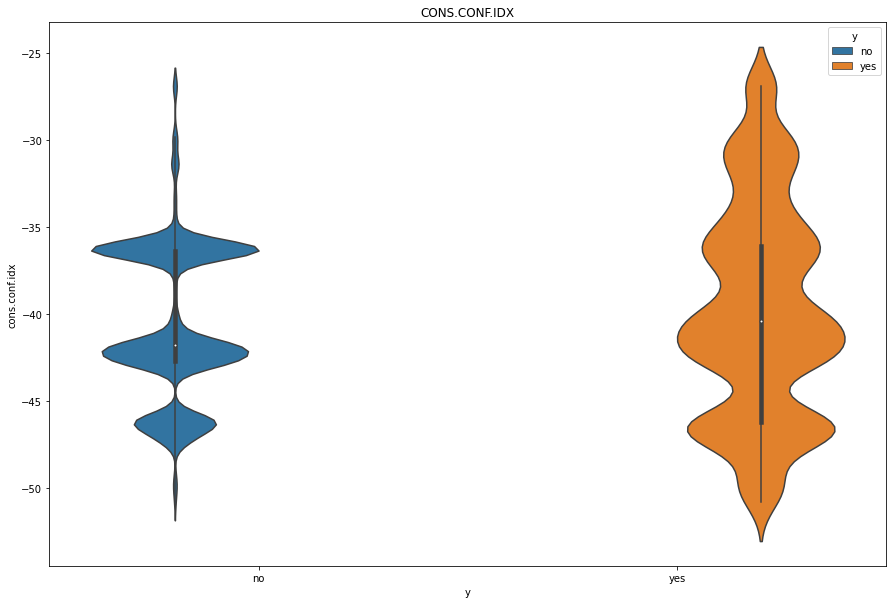

In [ ]:
violinplot_columns('cons.conf.idx')

In cons.conf.idx feature for class labels no, there is a outlier present when value above -30.

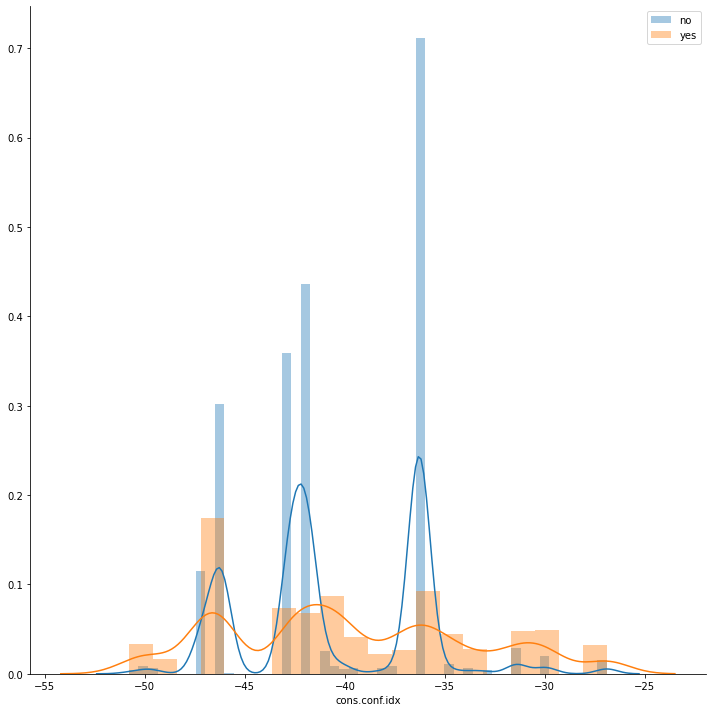

In [ ]:
plotting_kd(data,'cons.conf.idx',hue='y')

From the above plot it is visible that cons.conf.idx  would also be helpful in predicitng class labels.

<h4> Correlation Matrix </h4>

In [ ]:
def plotting_heatmap(data):
    correlation=data.corr()
    figure(figsize=(15,10))
        
        
    sns.heatmap(correlation, annot=True)
    plt.pyplot.show()


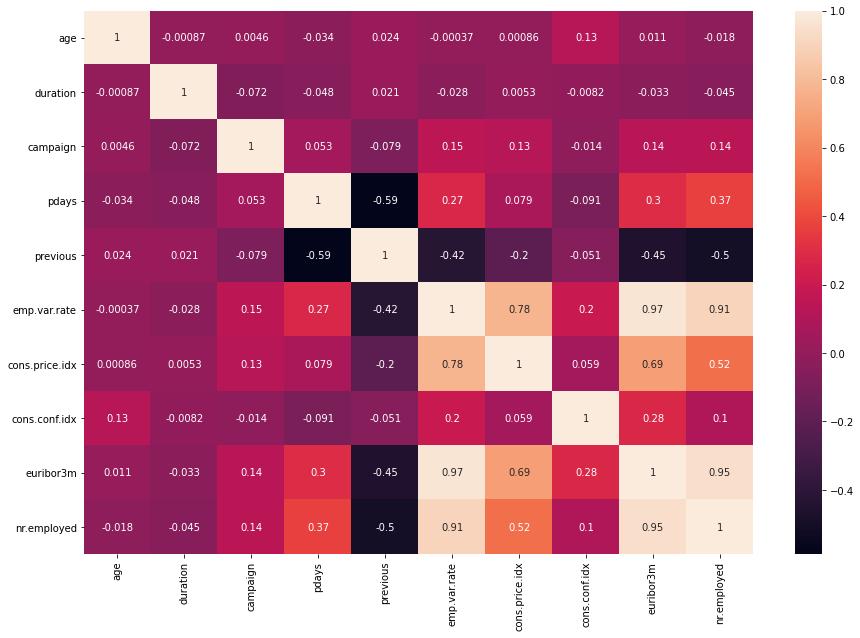

In [ ]:
plotting_heatmap(data)

The emp.var.rate, euribor3m, nr.employed and cons.price.index have very high correlation. Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation with more than 0.9 value.


In [ ]:
def plotting_violinplot(column1,column2):
    figure(figsize=(15,10))
    sns.violinplot(x=data[column1],y=data[column2],hue=data['y'],showfliers=False)
    plt.pyplot.show()


In [ ]:
def plotting_catplot(column1,column2,height=10):
    sns.catplot(x=column1, col=column2,hue='y',col_wrap=2,data=data,kind="count", height=height, aspect=.8)

<h4> Converting Age into categorical data </h4>

In [ ]:
#Reference https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/
def age_to_categorical(data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    data1.insert(1,'age_group',age_group)
    #dropping age column
    data1.drop('age',axis=1,inplace=True)
    
    return data1
data=age_to_categorical(data,data.age)    


<h4> Creating i_loan column; Deleting Housing and Loan column </h4>

In [ ]:
#creating i_loan based on the columns['loan','housing'] status we have 3 status yes,no, unknown and if any 2 columns have status yes then
#i_loan will have yes as status, if none of them have yes as status but no as status then i_loan will have no status else unknown status.
#dropped the housing,loan column and added i_loan column. 
def creating_i_loan(data2):
    i_loan=[]
    for index in range(len(data2)):
        if (data2['housing'].loc[index]=='yes' or data2['loan'].loc[index]=='yes'):
            i_loan.append('yes')
        elif (data2['housing'].loc[index]=='no' or data2['loan'].loc[index]=='no'):
            i_loan.append('no')
        
        else:
            i_loan.append('unknown')
    data2.insert(5,'i_loan',i_loan,True)   
    data2.drop(['loan','housing'],axis=1,inplace=True)
    return data2           
data=creating_i_loan(data)


In [ ]:
data.tail()

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


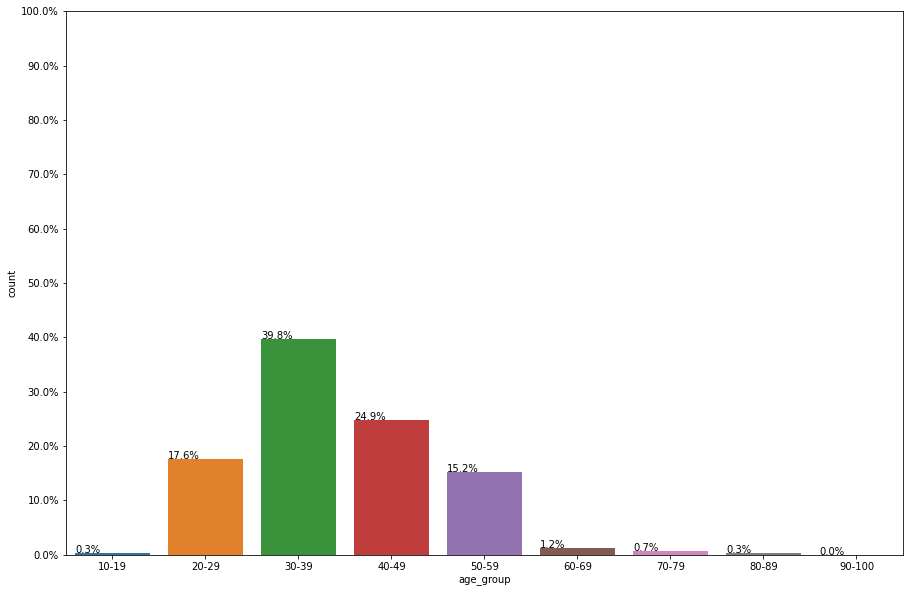

In [ ]:
countplot_columns('age_group')

Bank has contacted to the most between the age group of 30-39 followed by 40-49

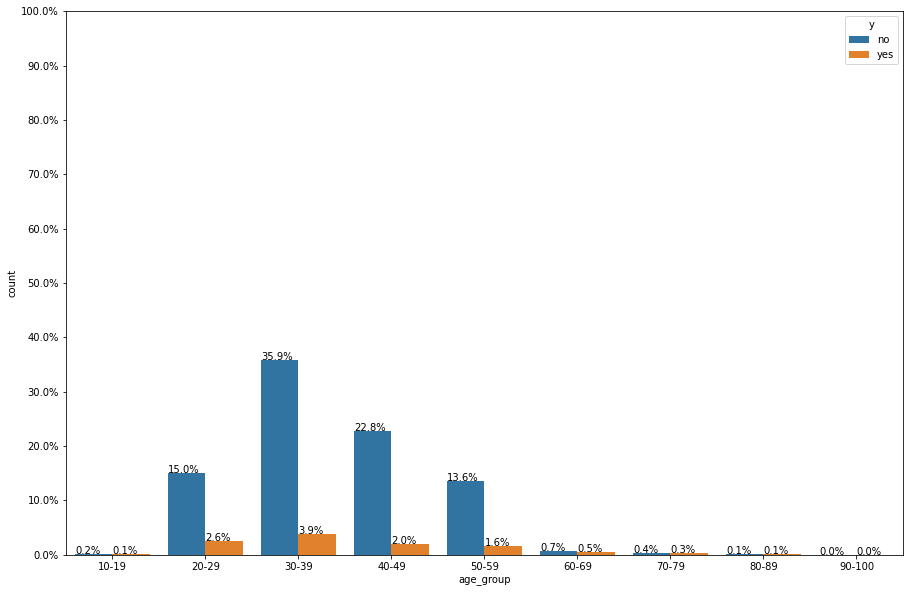

In [ ]:
countplot_target_varaible('age_group','y')

Age group of 30-39 are the most people who have not subscribed for the deposits. They are also the most who has subscribed for the deposits.

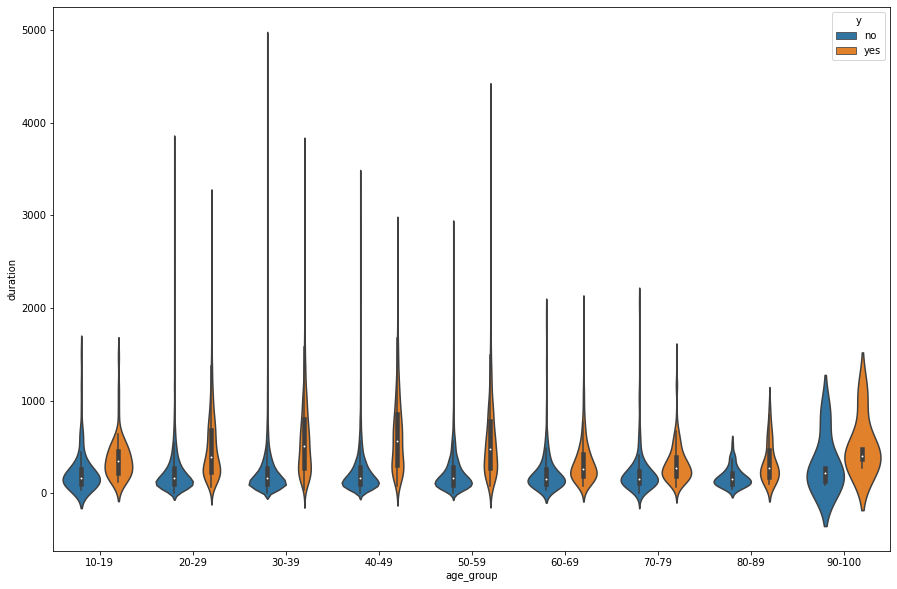

In [ ]:
plotting_violinplot('age_group','duration')

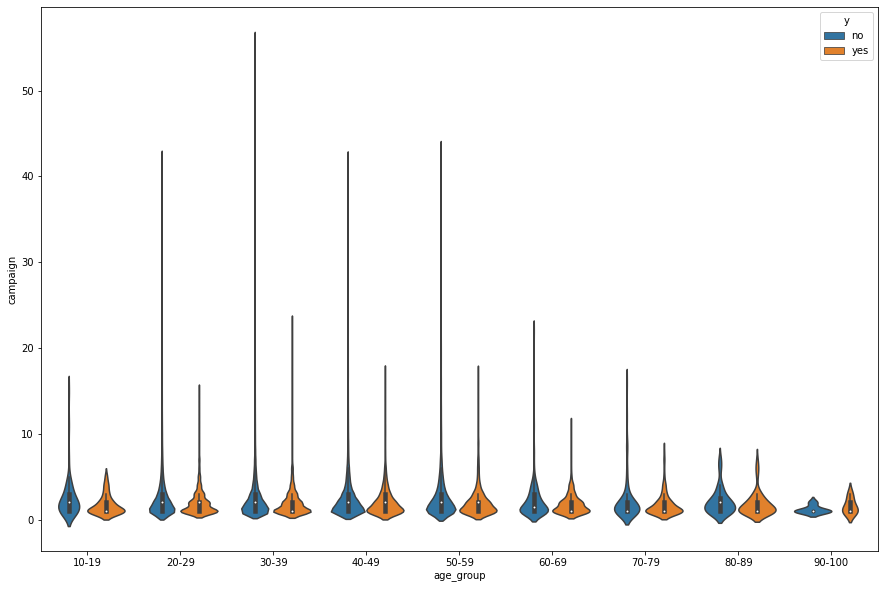

In [ ]:
plotting_violinplot('age_group','campaign')

Number of campaigns from 1-7 and age above 70 has possible outliers.

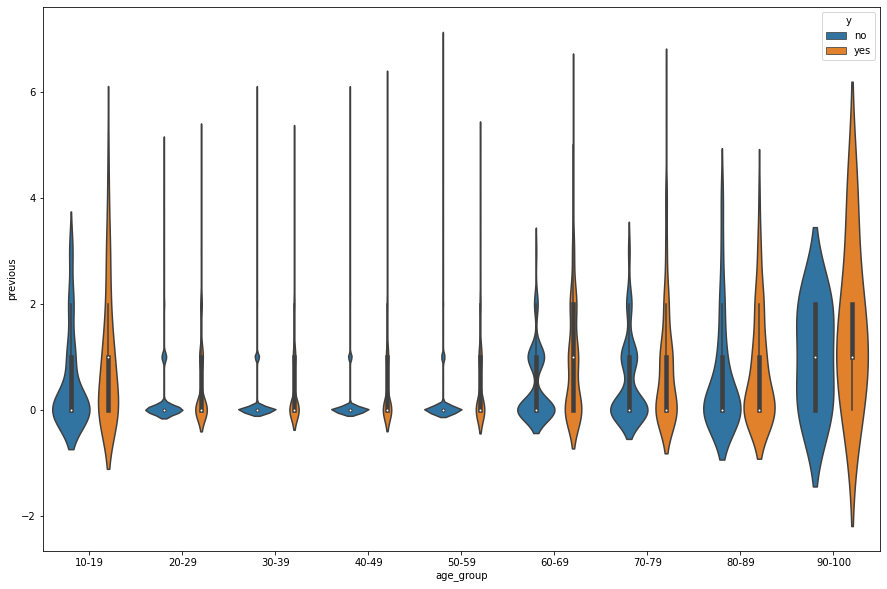

In [ ]:
plotting_violinplot('age_group','previous')

For number of previous campaign from 0-1 age group above 70 are possible outliers. For number of contatcs for previous campaign as 2, age around 90 are possible outliers. For number of previous campaign from 3-4 age around 80 are possible outliers.

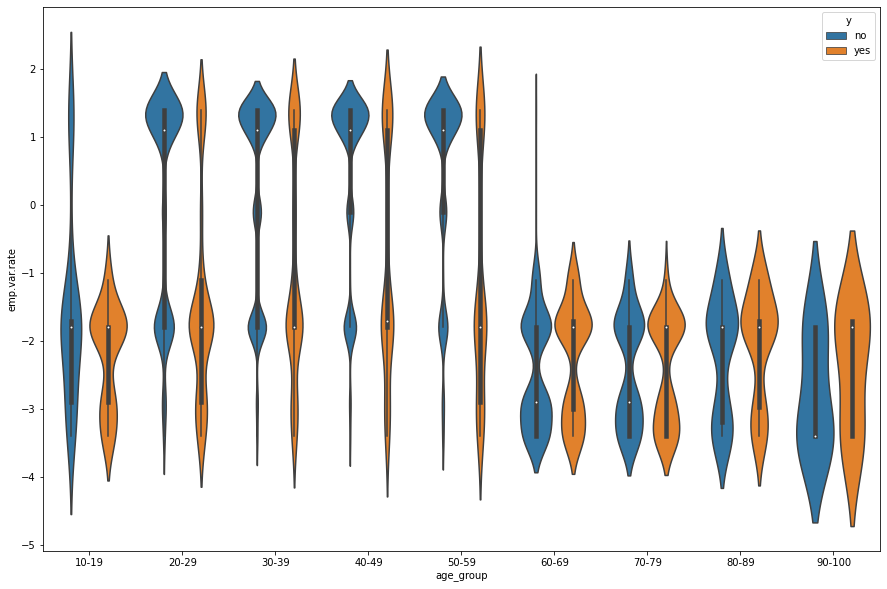

In [ ]:
plotting_violinplot('age_group','emp.var.rate')

For emp.var.rate with -1.8 has most outliers above age around 60.

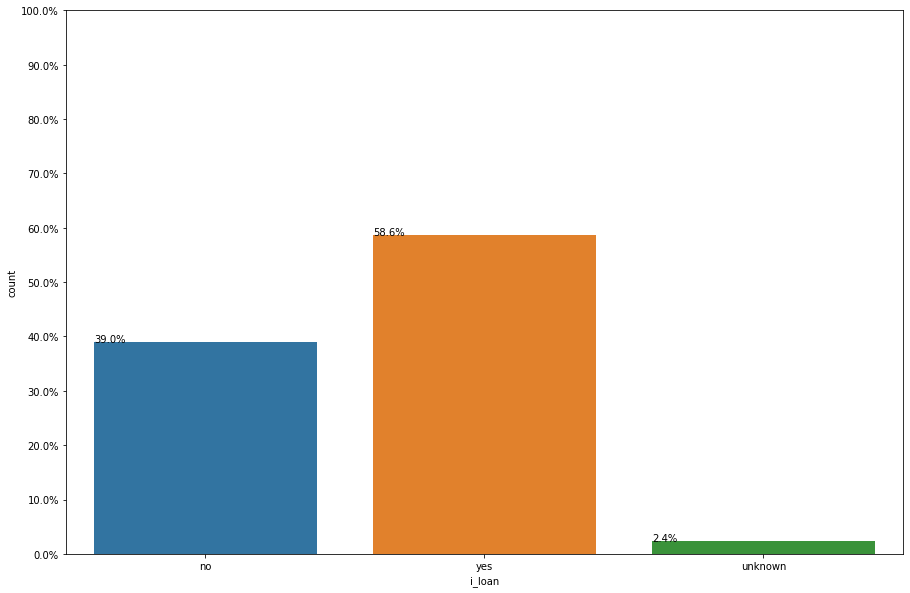

In [ ]:
countplot_columns('i_loan')

Most of the people bank has contacted either have personal or housing loan. Very few of the status of loan is unknown. 

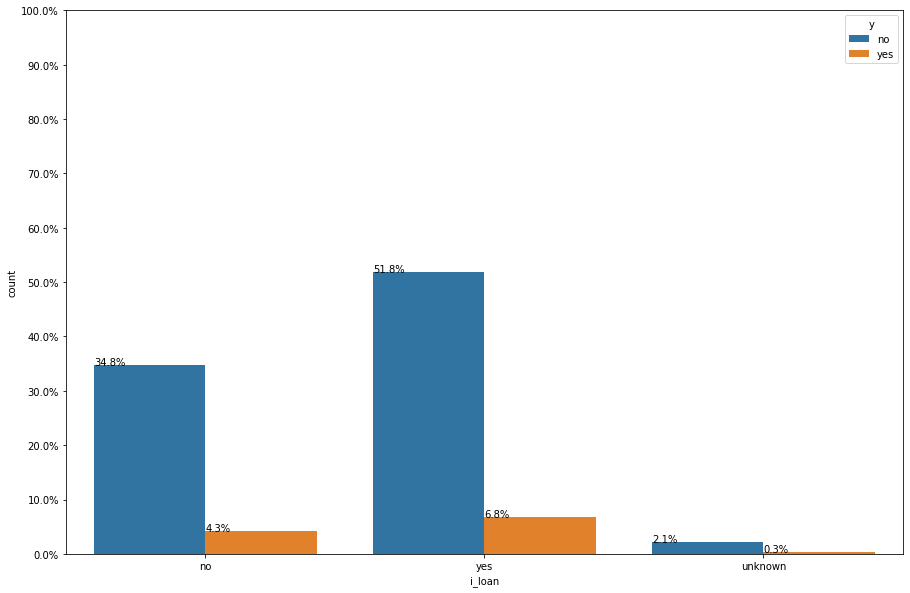

In [ ]:
countplot_target_varaible('i_loan','y')

People who have loan are in majority who have subscribed for deposits. They are also the one who has not subscribed for the deposit.

<h4> Age Group and Job </h4>

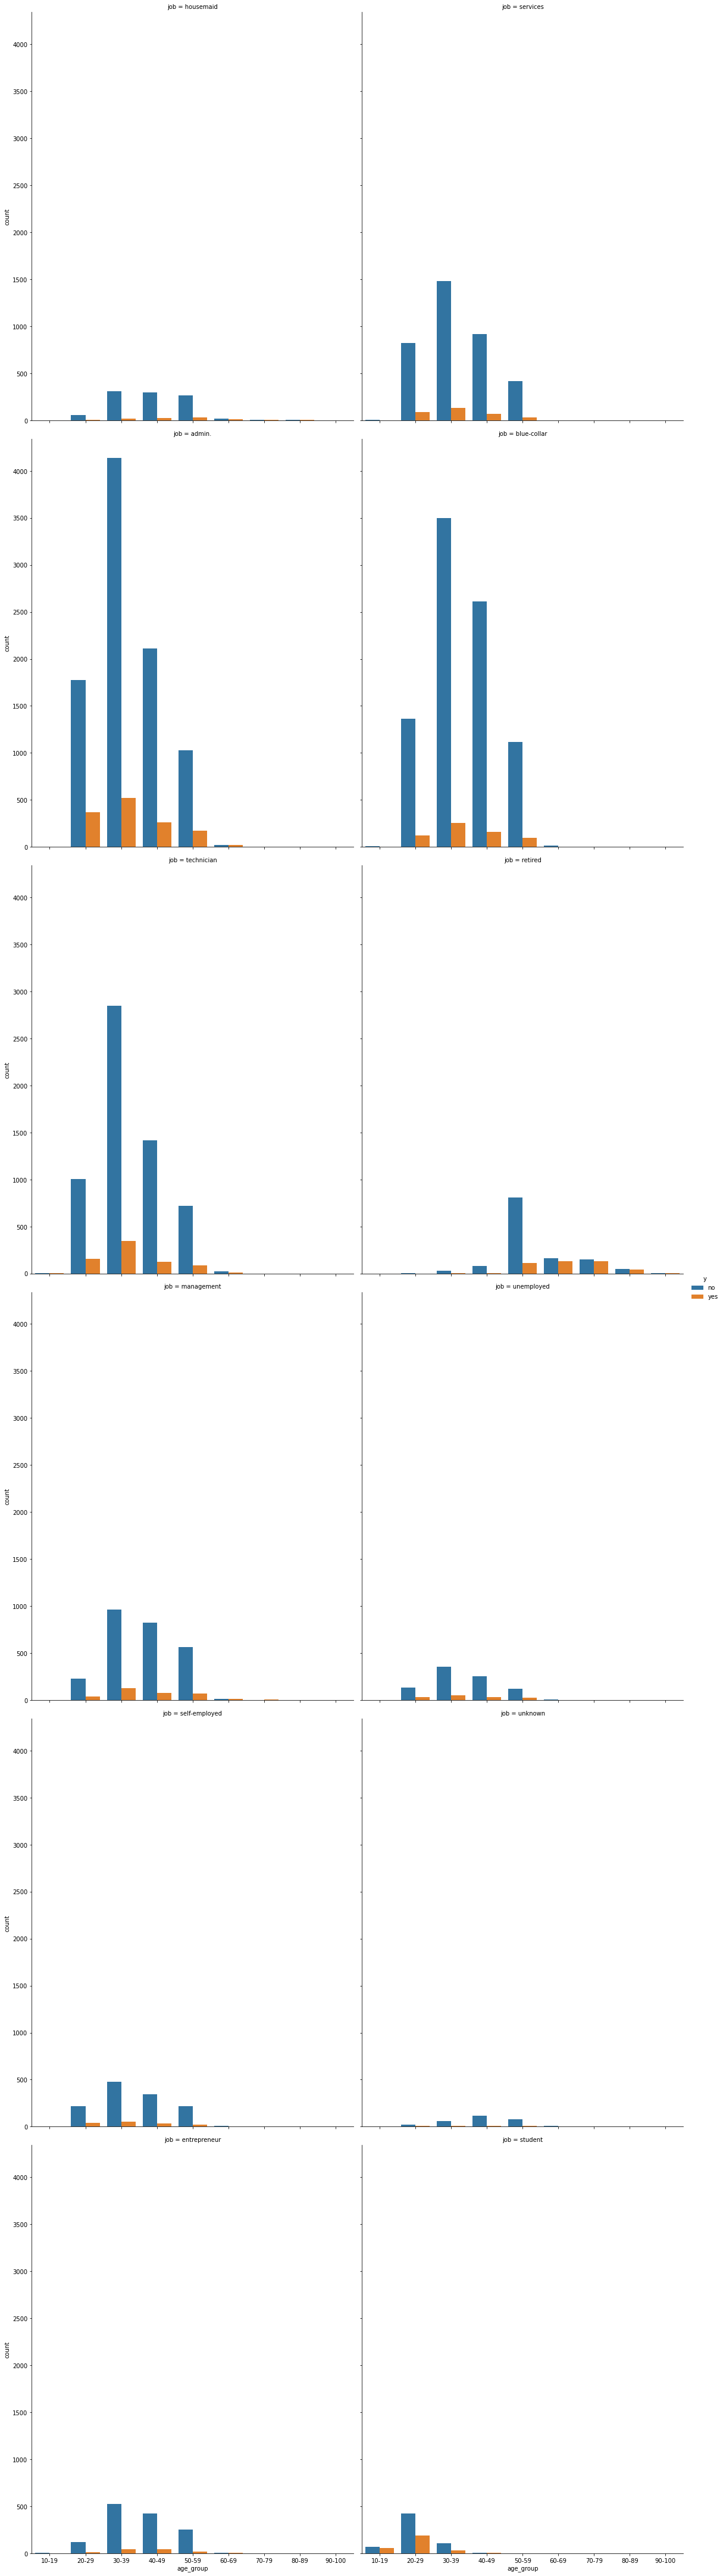

In [ ]:
plotting_catplot('age_group','job')

People whose profession is admin and age group between 30-39 has the highest number for subscribing for deposits. Followed by the age group 20-29 and 40-49 in the same profession.

<h4> Age Group and Education </h4>

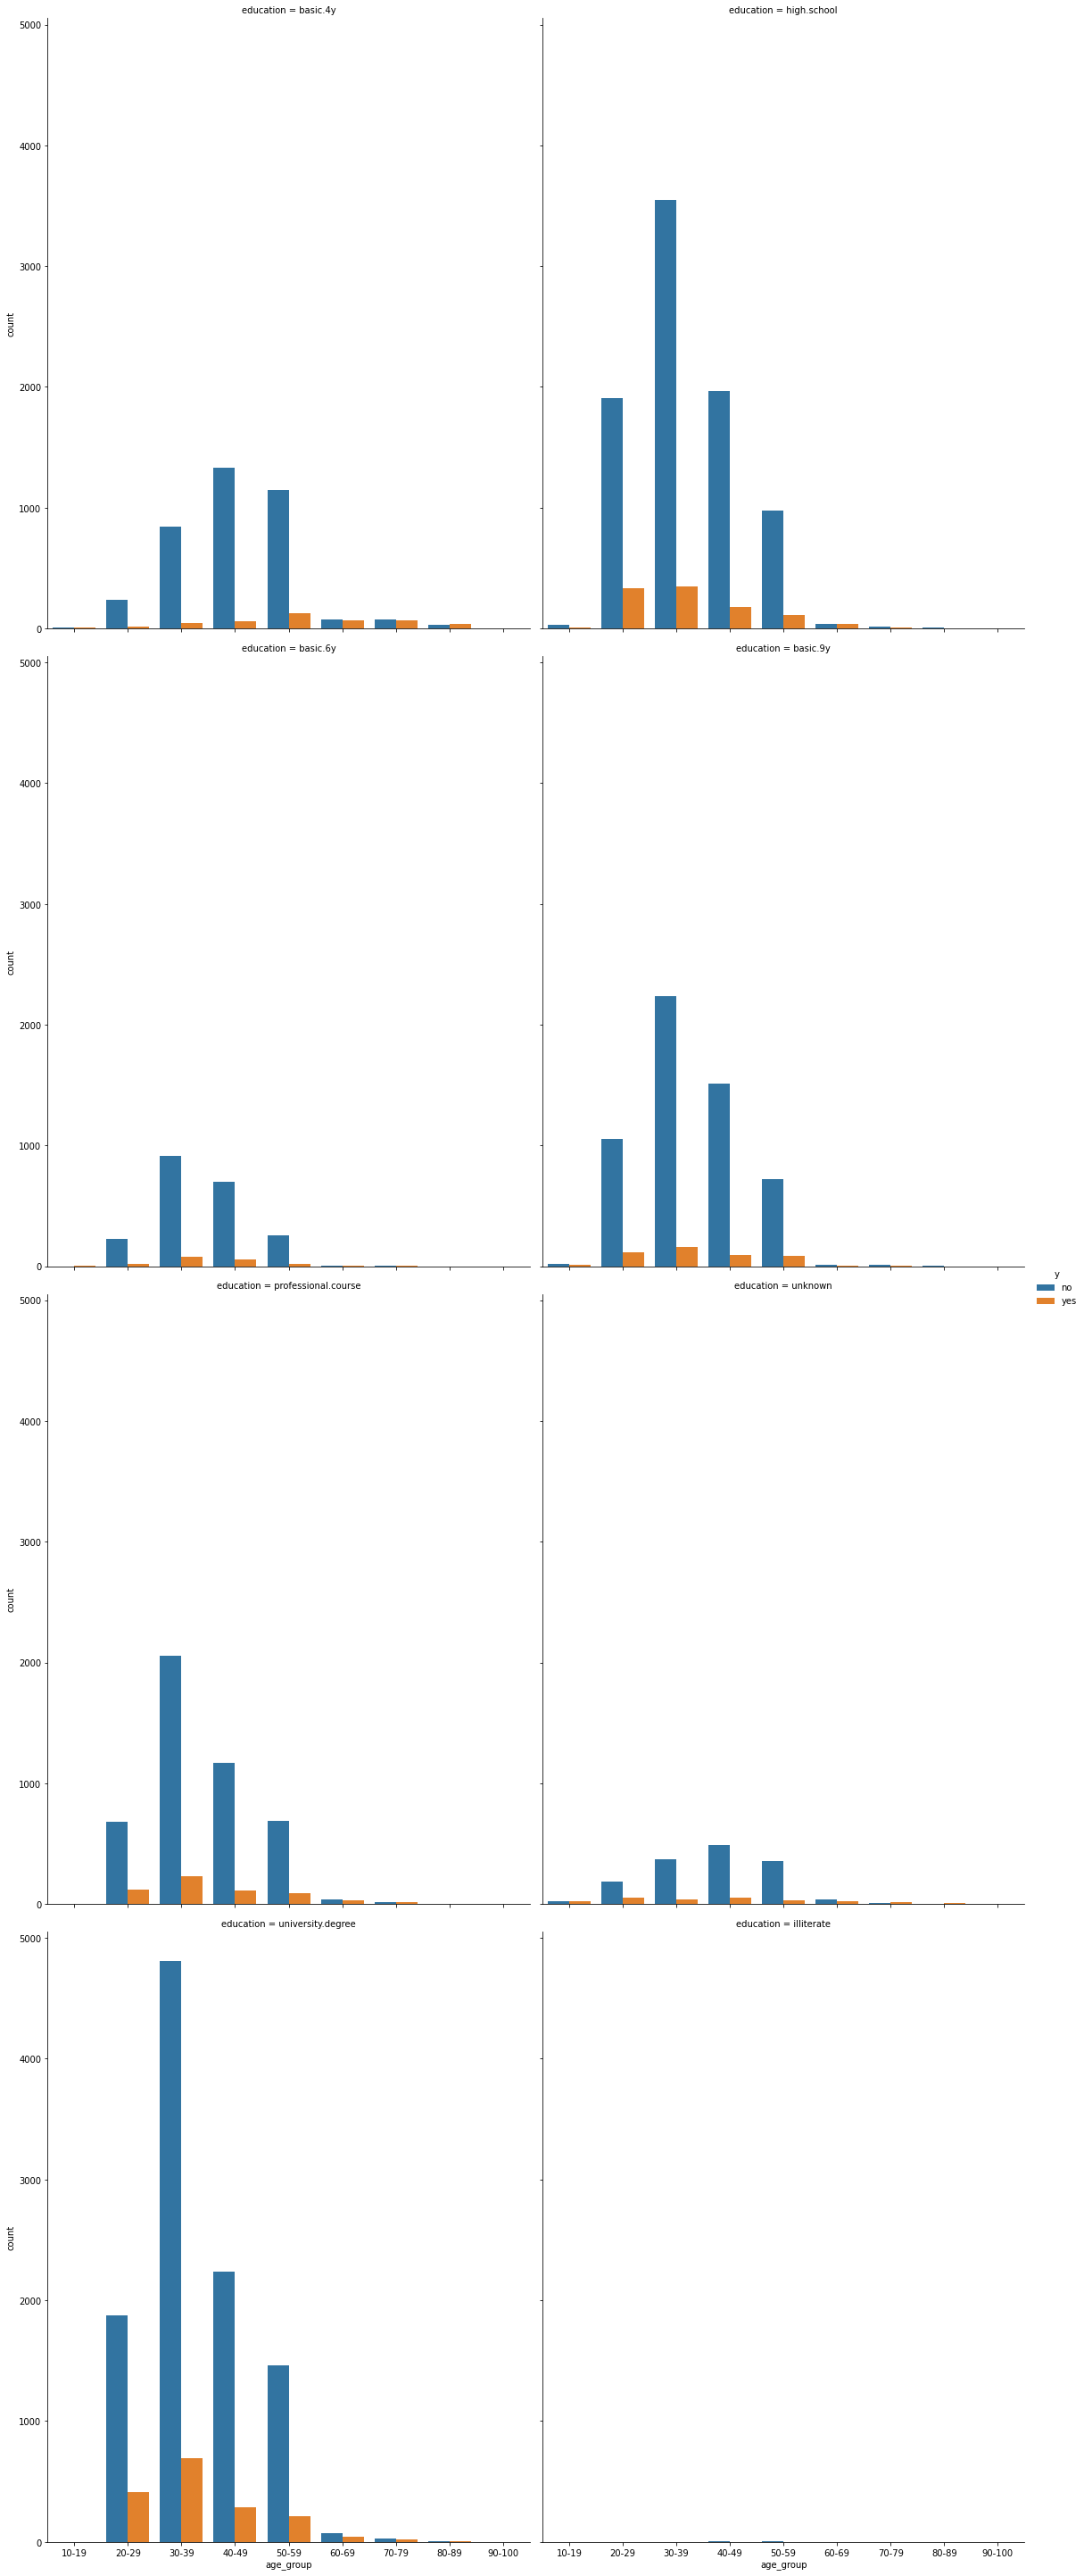

In [ ]:
plotting_catplot('age_group','education')

People who are in age group of 30-39 and have completed university are the most ones who have and have not subscribed for deposits.

<h4> Age Group and Marital </h4>

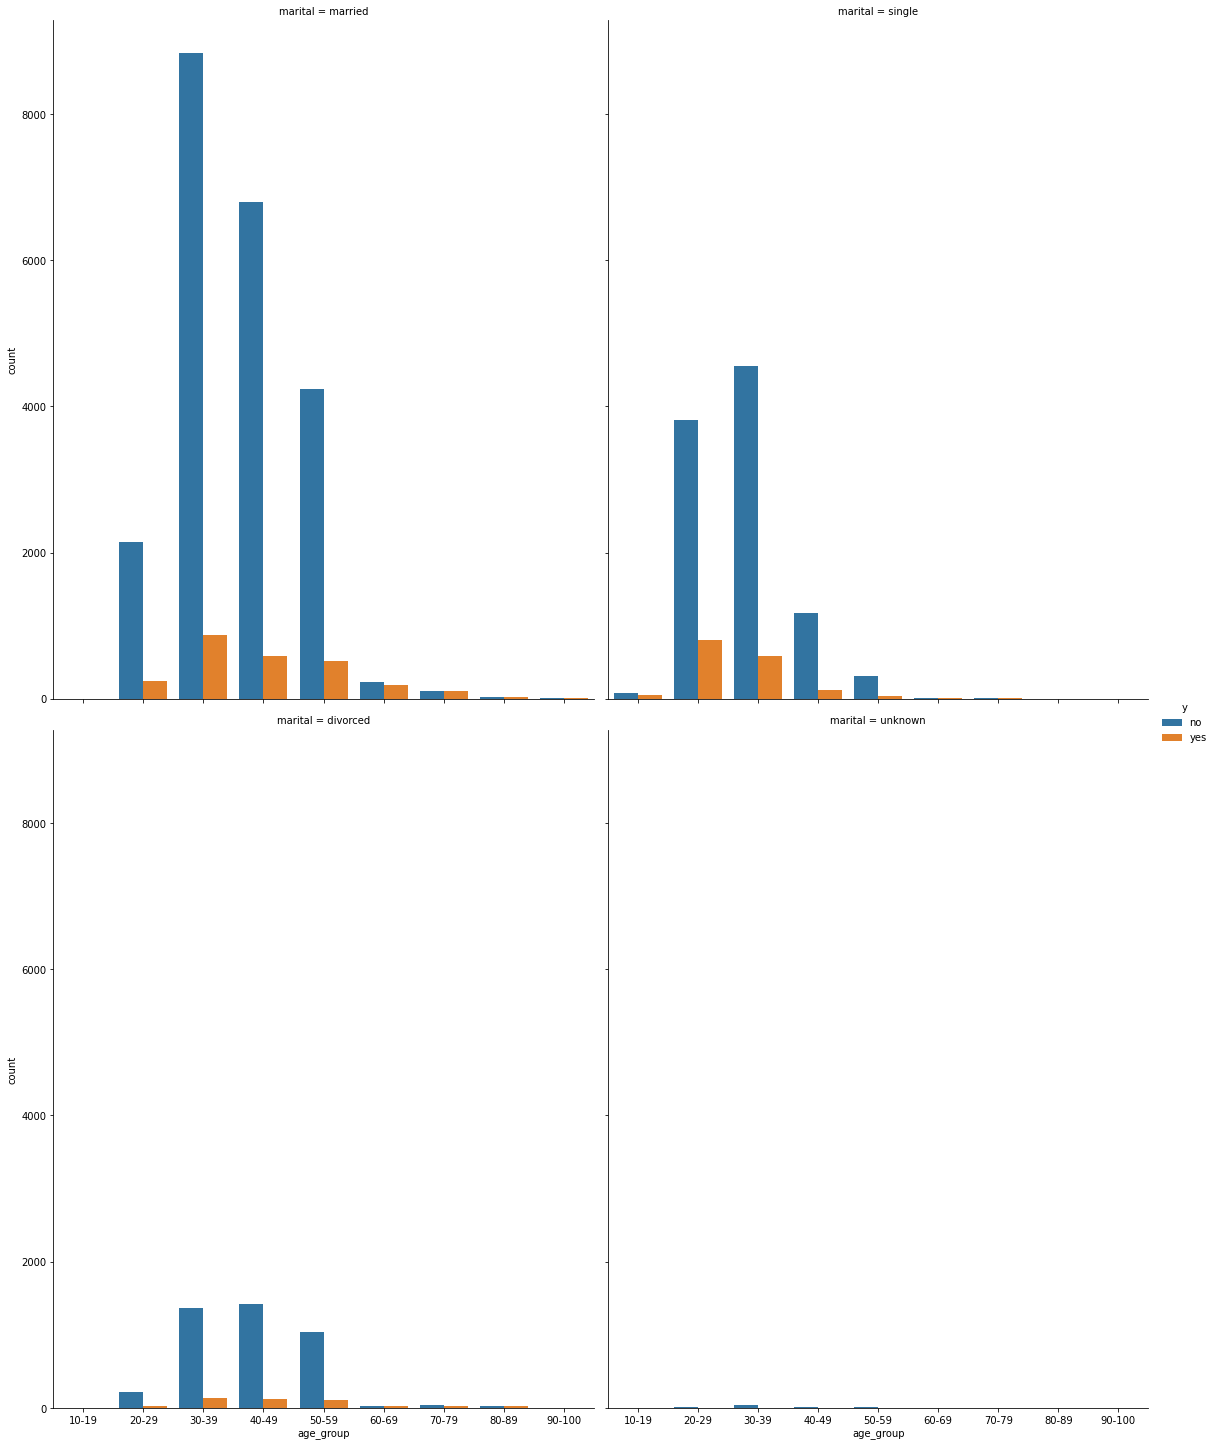

In [ ]:
plotting_catplot('age_group','marital')

<h4> Age Group and Iloan </h4>

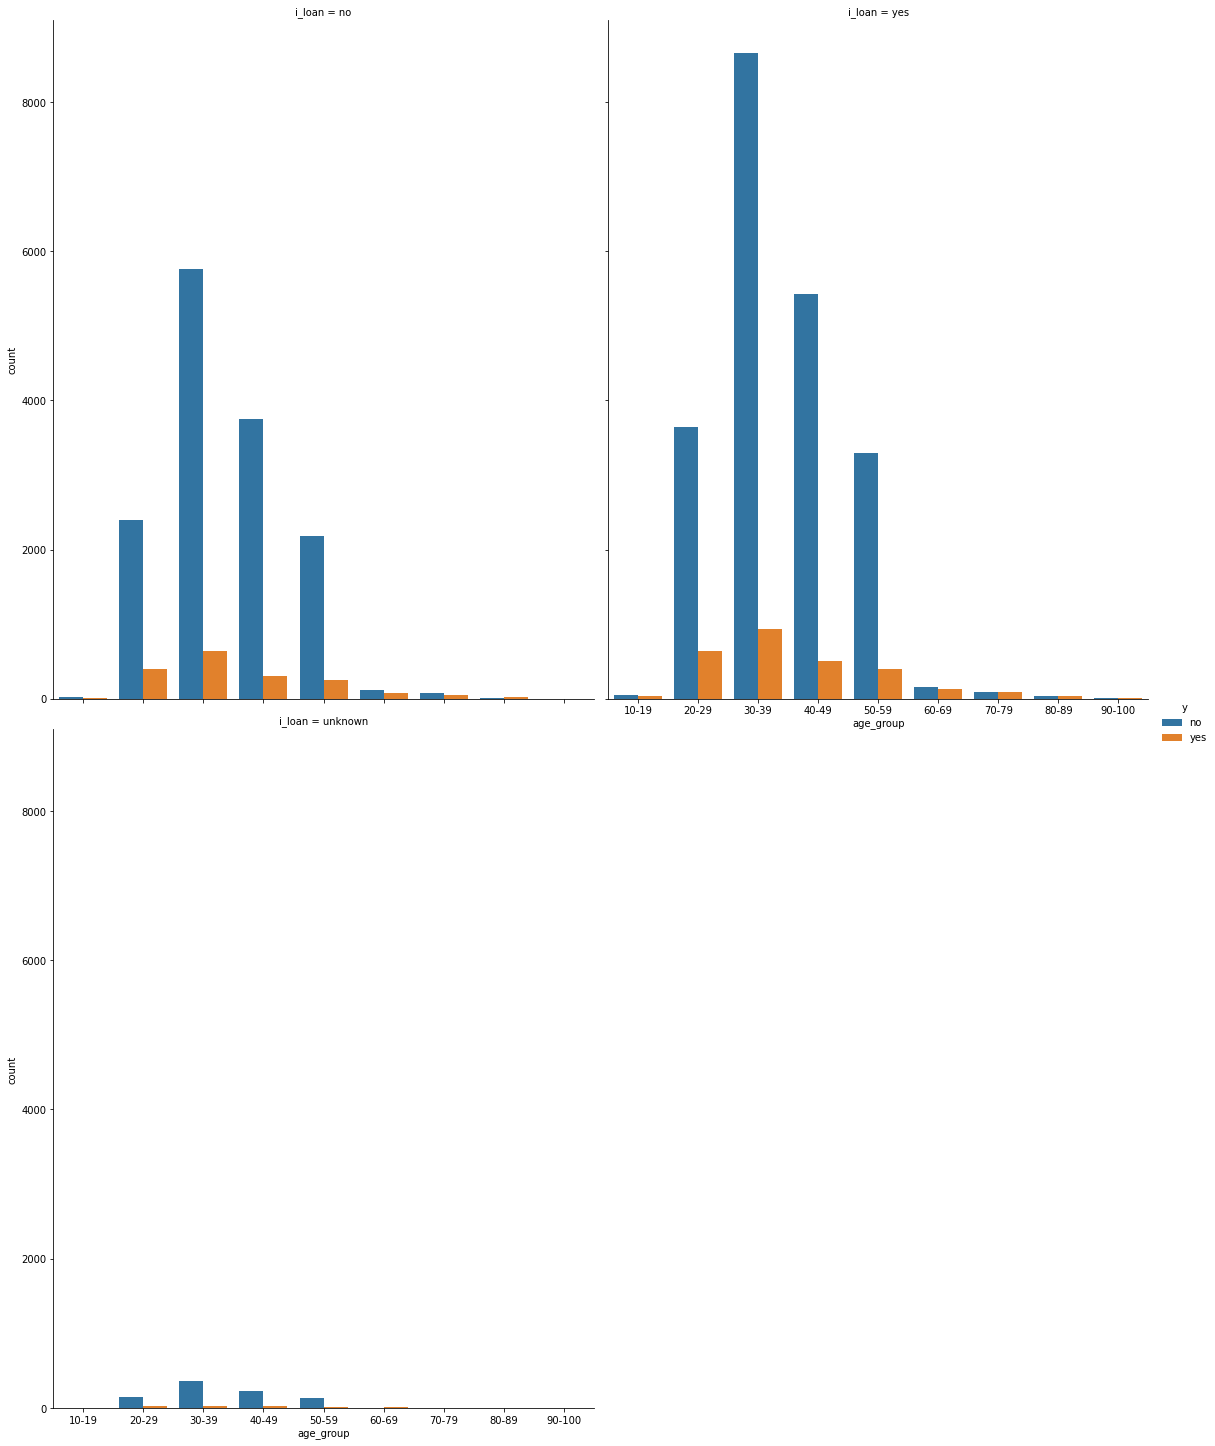

In [ ]:
plotting_catplot('age_group','i_loan')

People who are in age group of 30-39 and have loan are the most ones who have subscribed for long term deposits. They are also the most ones who have not subscribed for it.

<h4> Education and Job </h4>

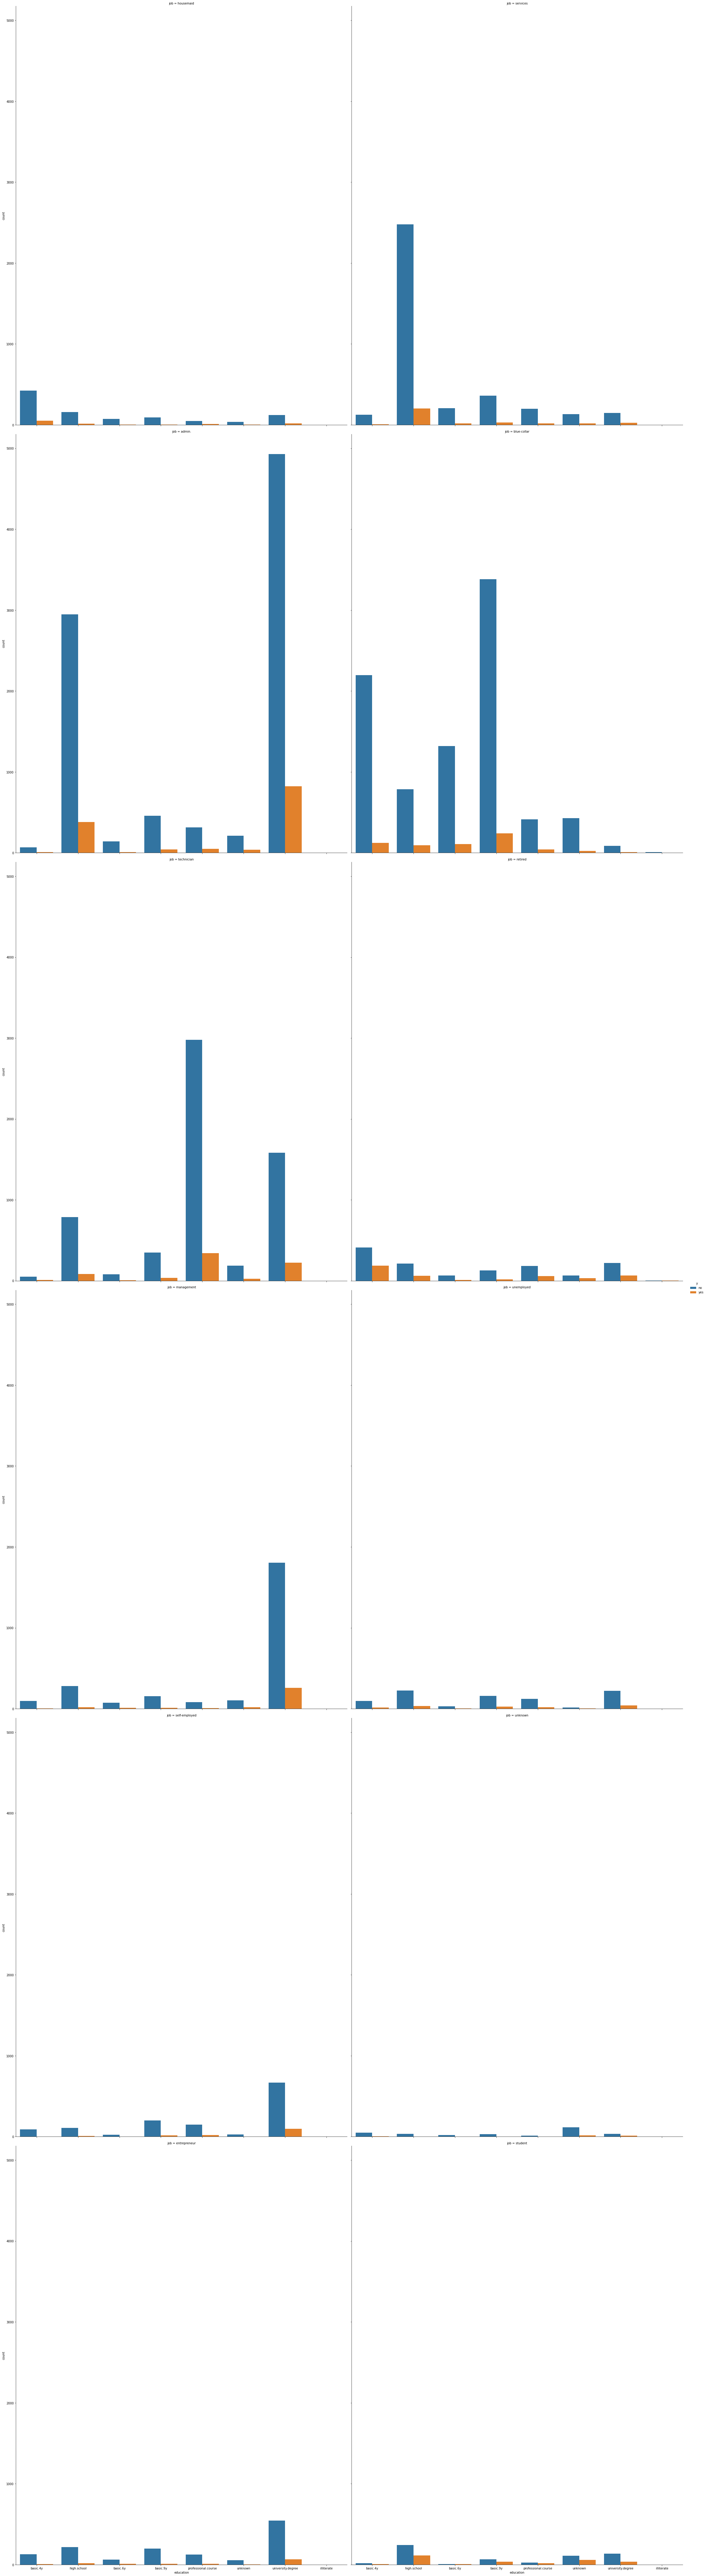

In [ ]:
plotting_catplot('education','job',20)

People who are admin and have completed univeristy are the most ones who have subscribed for long term deposits.They are also the most ones who have not subscribed for long term deposits.

<h4> Education and Marital </h4>

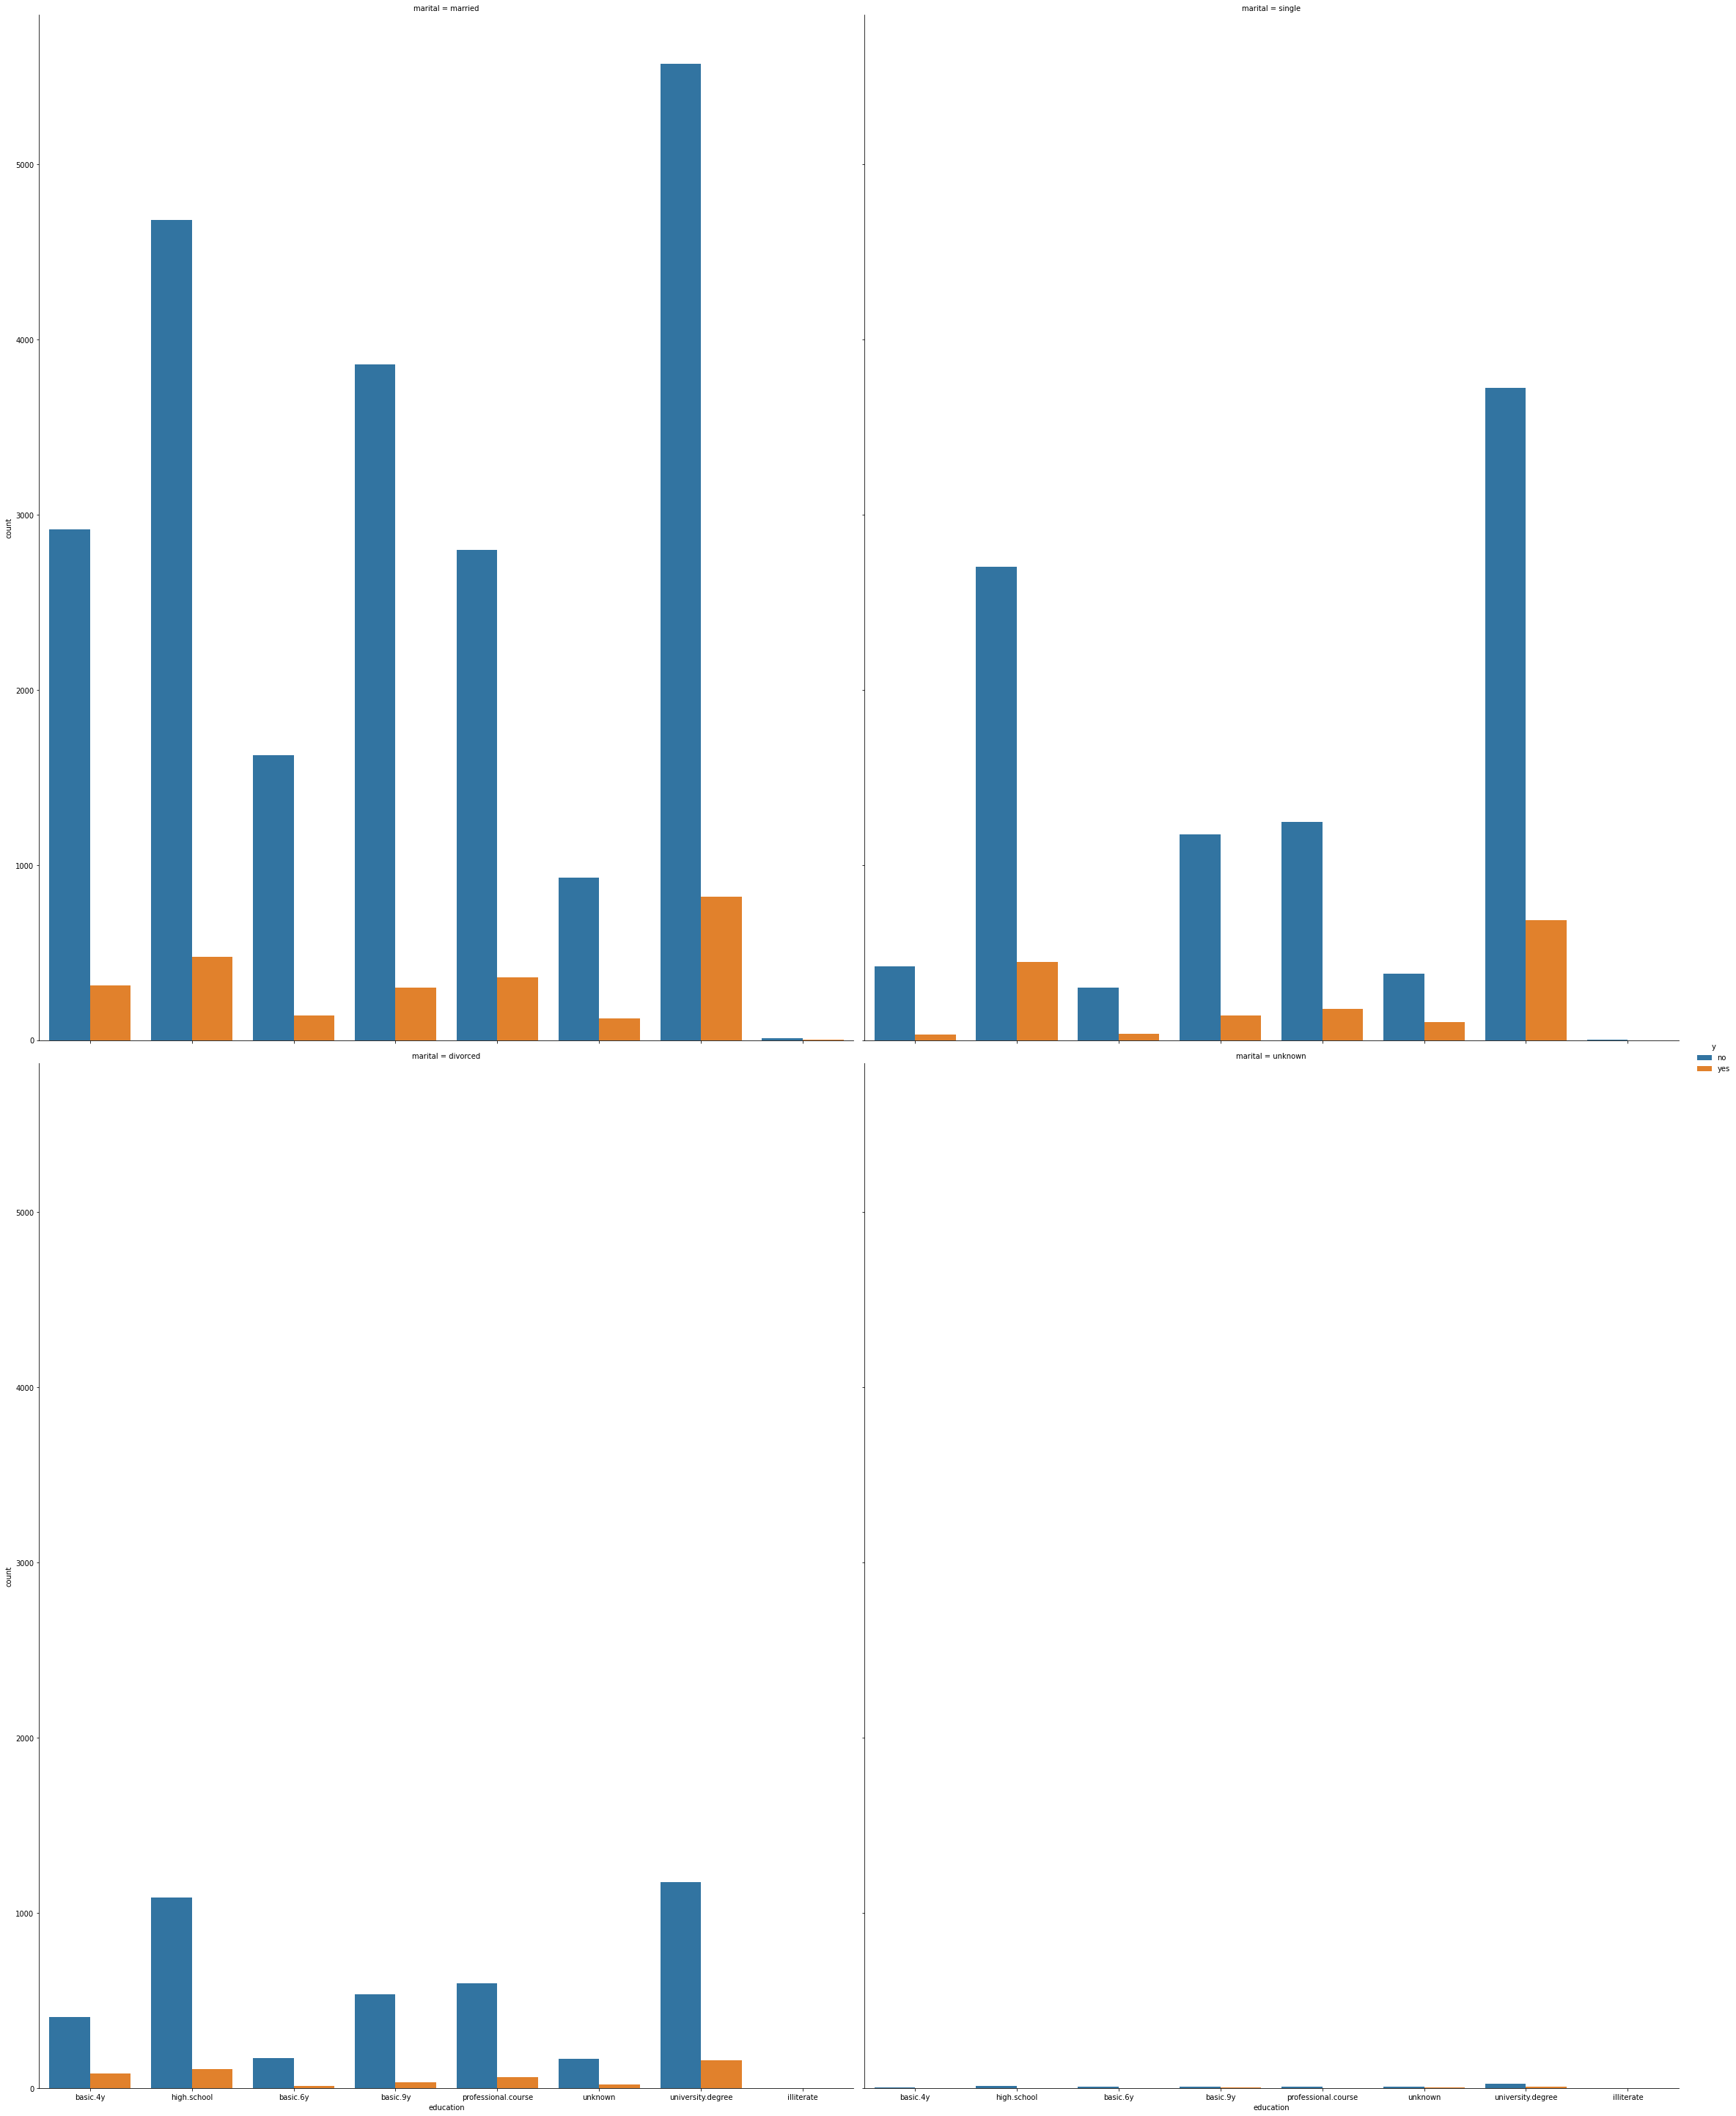

In [ ]:
plotting_catplot('education','marital',20)

People who have done university and are either single or married are the most one who have subscribed for the deposits. People who are married and have done univeristy are the most ones who have not subscribed for long term deposits.

<h4> I_loan and Education </h4>

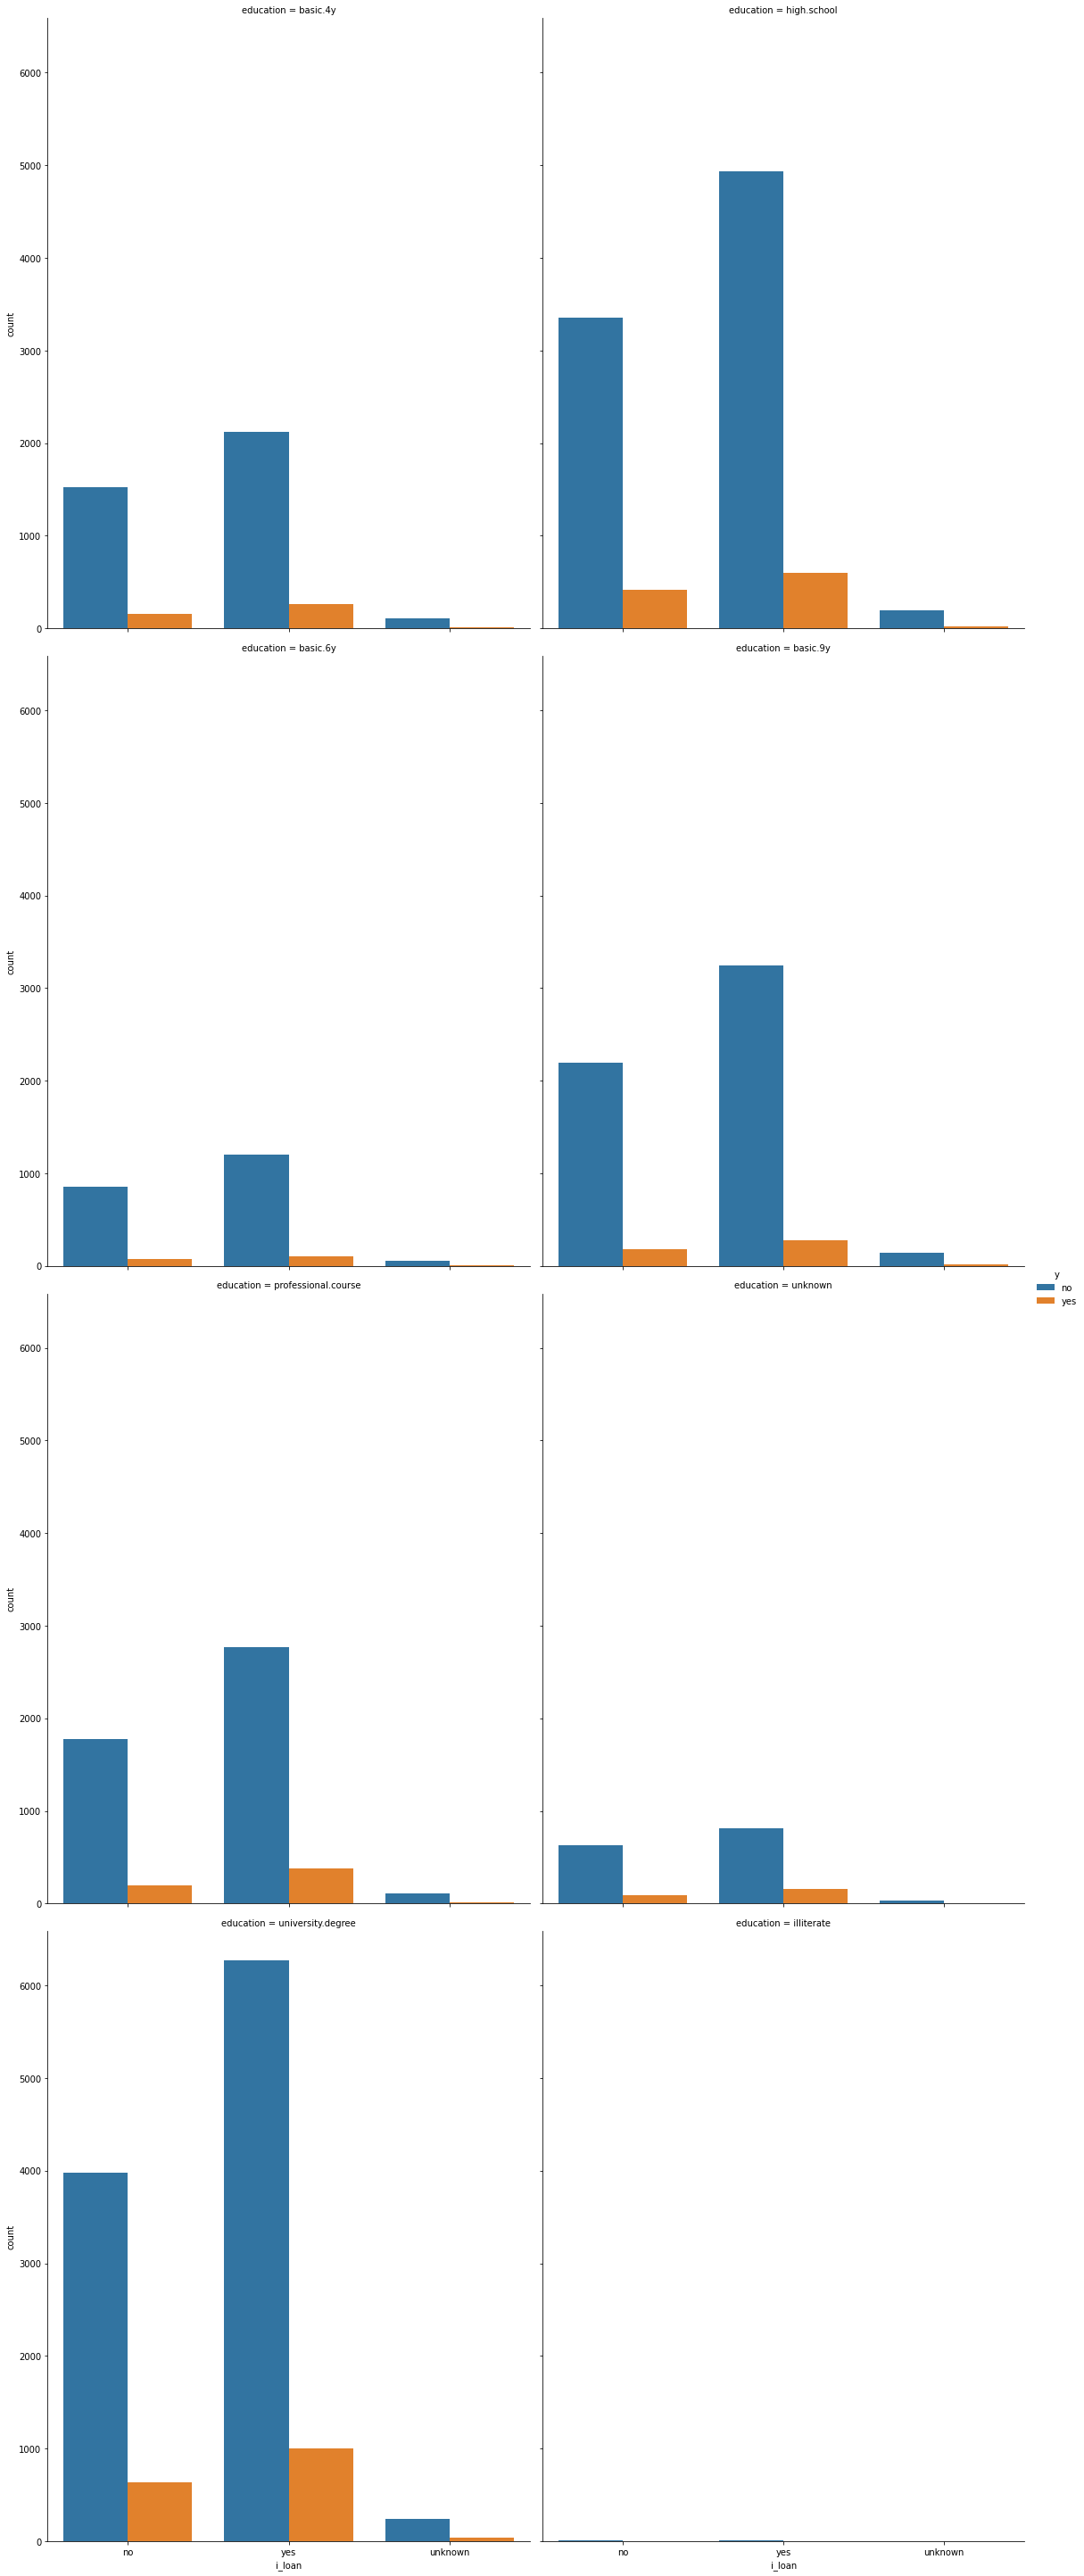

In [ ]:
plotting_catplot('i_loan','education')

People who are in university and have loan are the most ones who have subscribed for deposits.They are also the most people who have not subscribed for their deposits.

<h4> Marital and Job </h4>

<h4> Changing Y labels into Binary </h4>

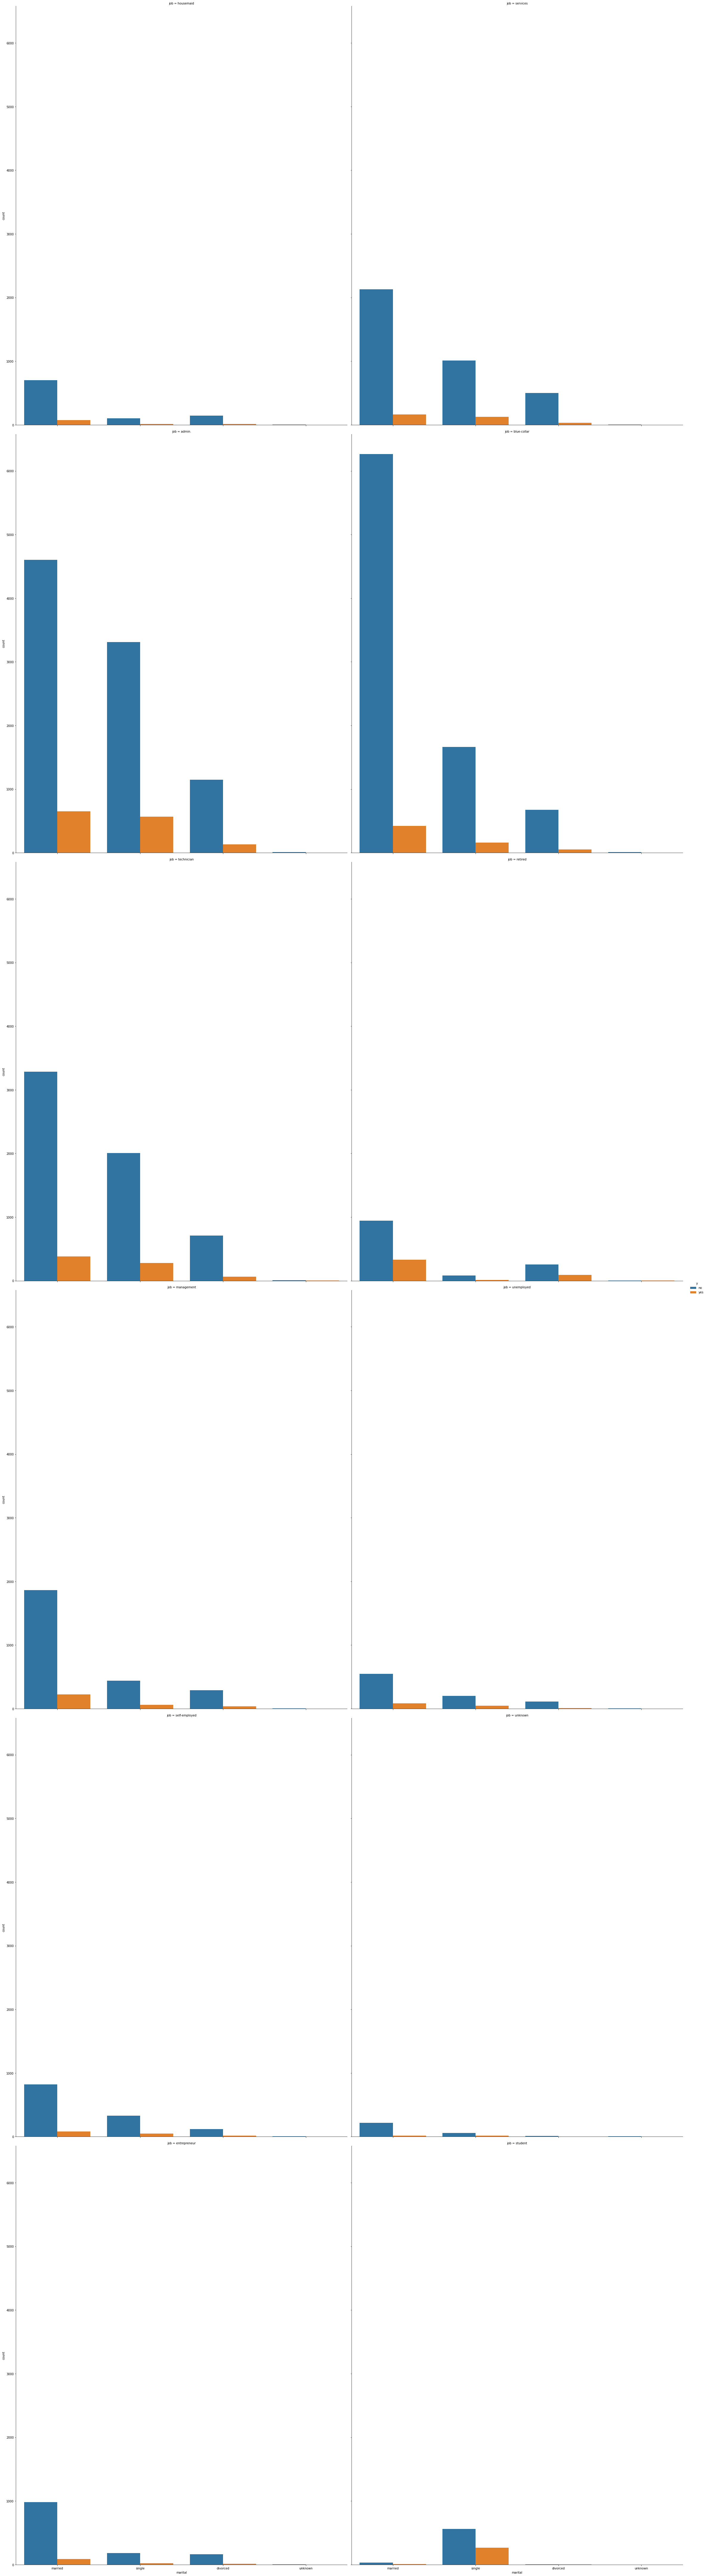

In [ ]:
plotting_catplot('marital','job',20)

Peoplw who are in admin job with marital status married and single and most ones who have subscribed for their deposits. People who are in blue collar job and are married are the most ones who has not subscribed for their deposits.

<h4> I_loan and Marital </h4>

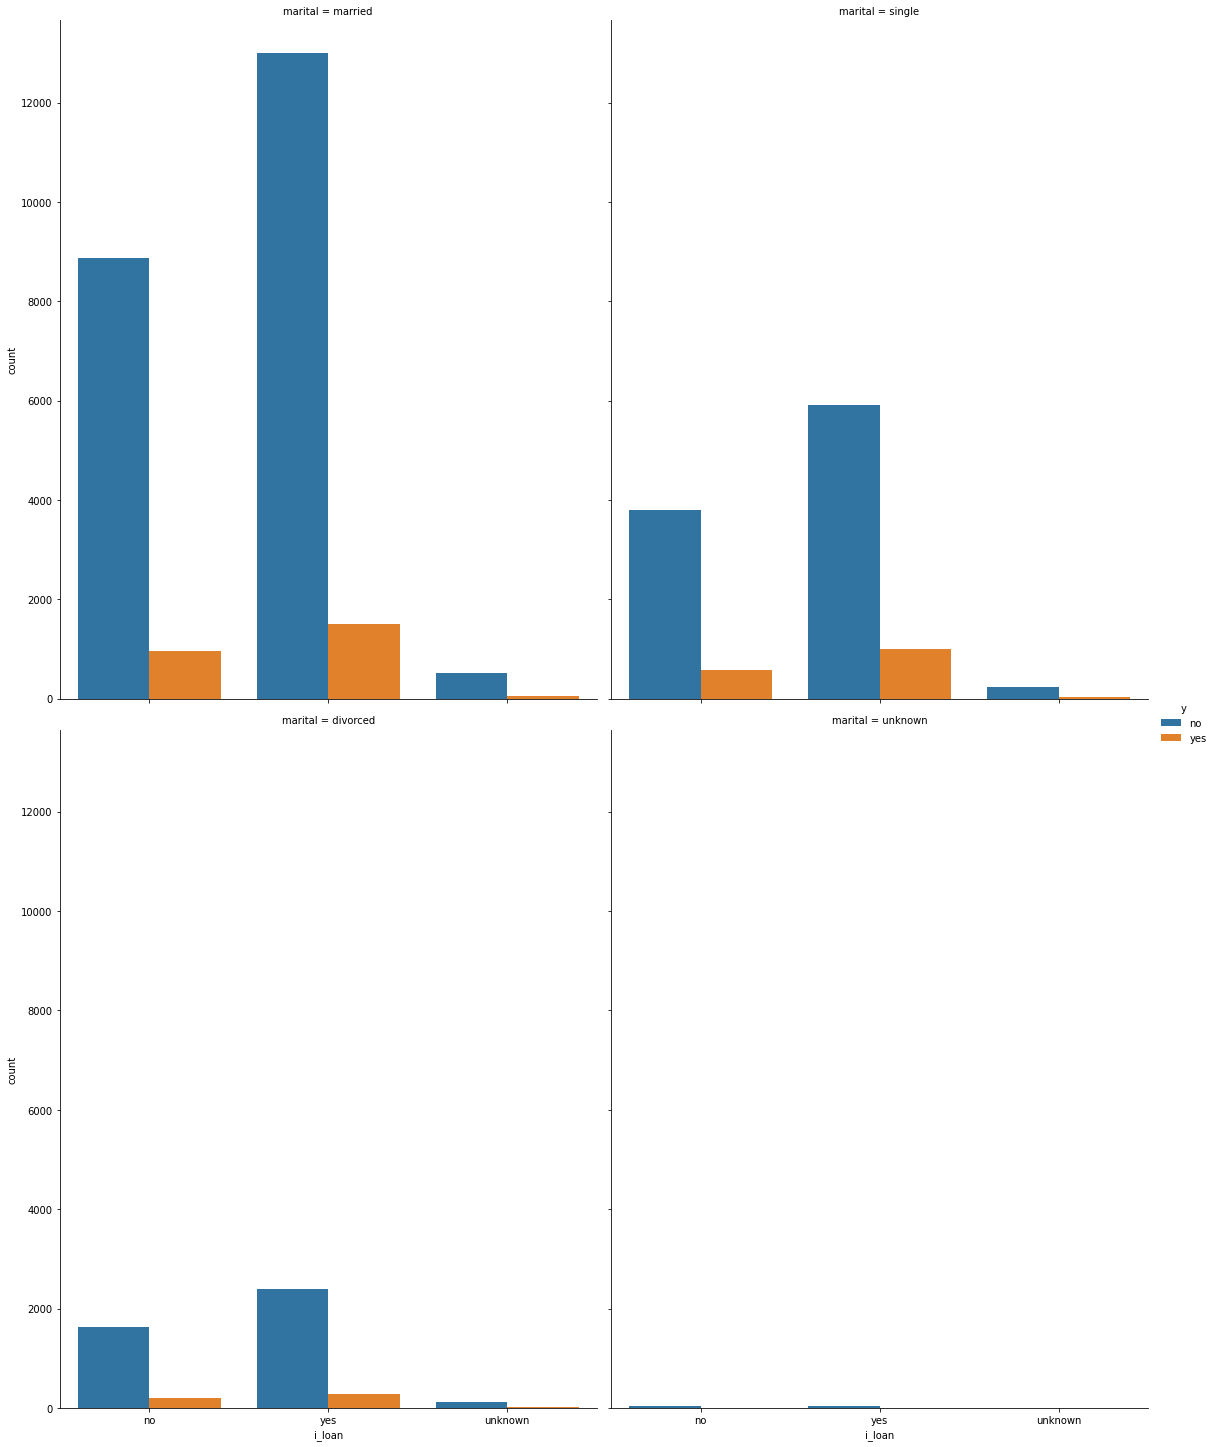

In [ ]:
plotting_catplot('i_loan','marital')

People who are married and have loan are the most ones who have subscribed for their deposits. They are the most one in any marital status for not subscribing for their deposits.

<h4> I_loan and Job </h4>

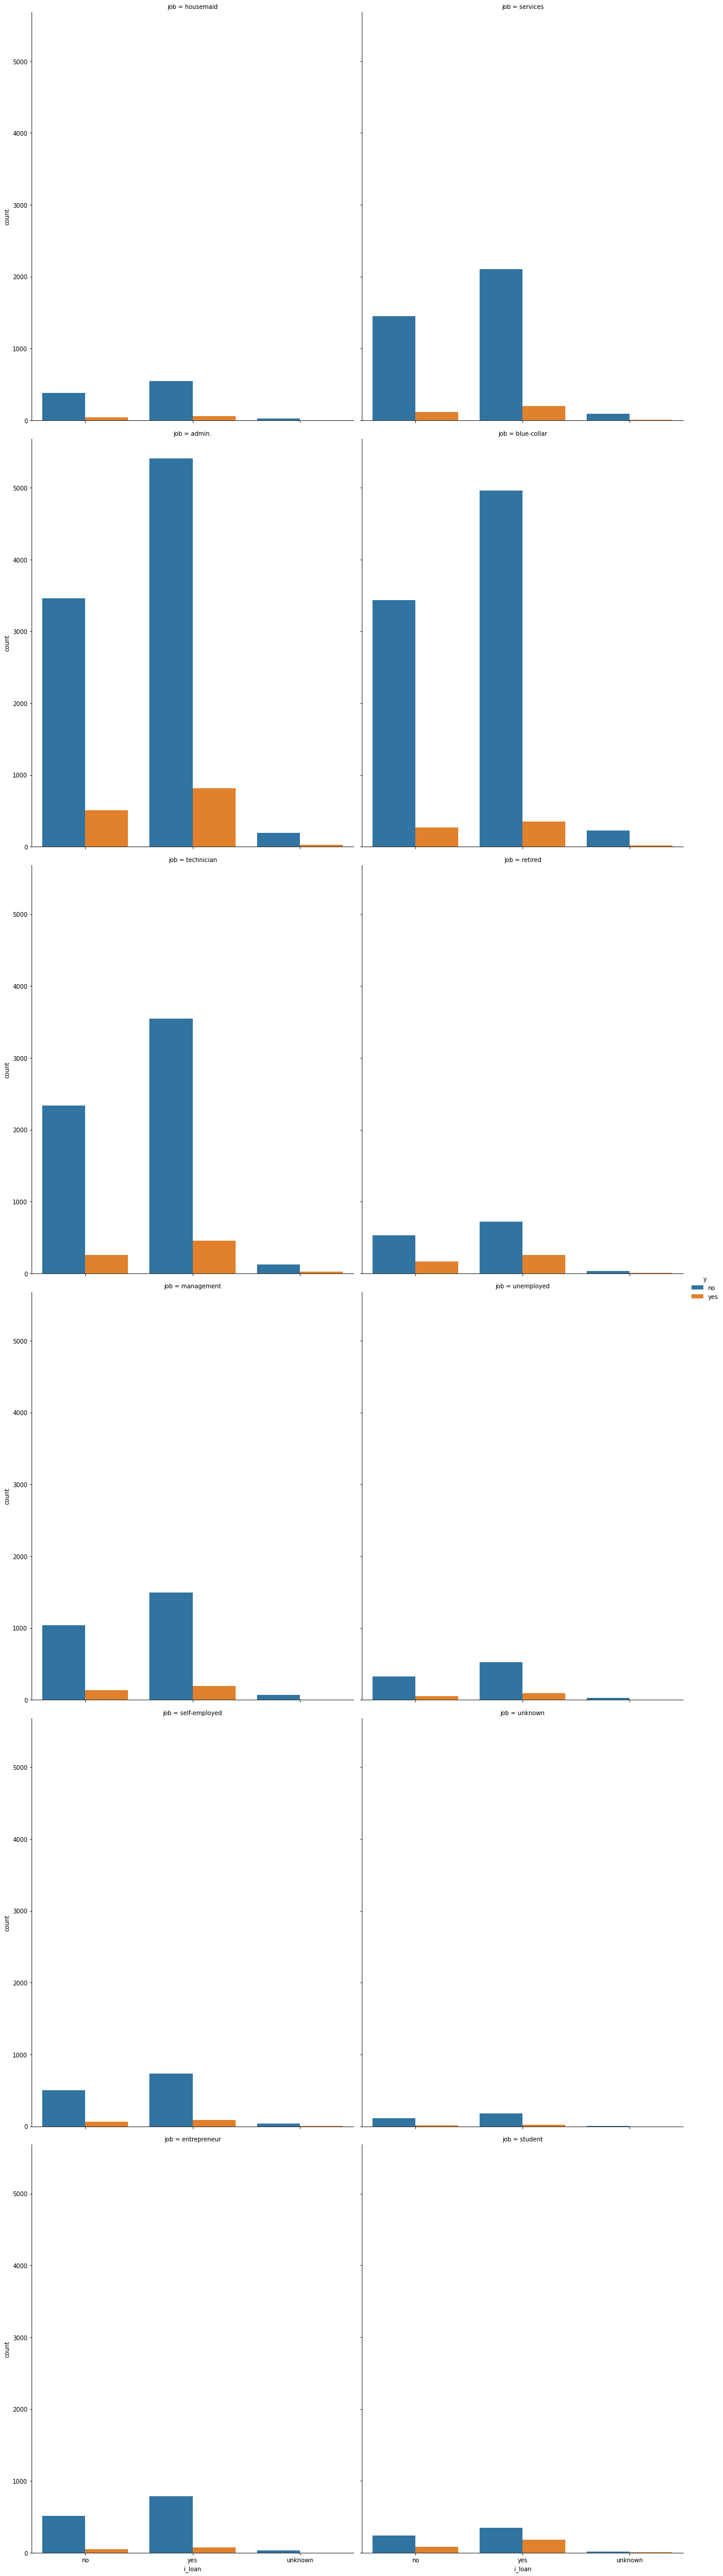

In [ ]:
plotting_catplot('i_loan','job')

People who are in the profession of admin with loan are the ones who have subscribed for deposits. Followed by the admins who does not have loan has subscribed for the deposits. People who are technician and admin have loan status yes or no are most one's who have not subscribed for their deposits.

<h4> Correlation Matrix after Converting Age into Categorical Data </h4>

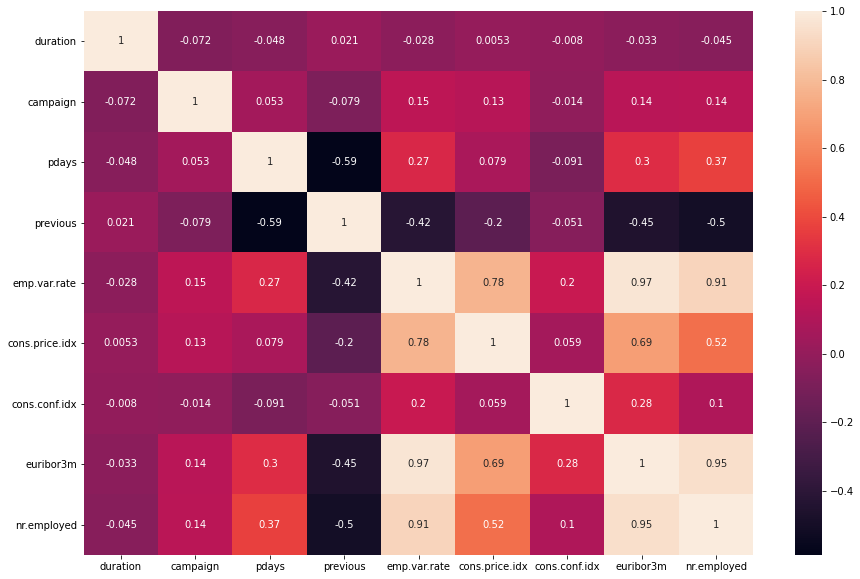

In [ ]:
plotting_heatmap(data)

Comparing two correlation matrix there is no major changes when it comes to converting age into categorical data. This is due to age was not very much correlated to any of the other features.

<h3> Summary </h3>
1. People who are in admin job has been more contacted for the deposits by the bank.<br>
2. People who are married has been contacted more for the deposits by the bank.<br>
3. People who has been contacted more on the cellular than the telephone.<br>
4. People has been conatcted more in the month of May than any other month. They have not been contacted in January and Februray at all. <br>
5. People has not been contacted on Saturday and Sunday <br>
6. People with no default status has been contacted more by the bank.<br>
7. People who has housing loan has been contacted more by the bank <br>
8. People with no personal loan has been contacted more by the bank.<br>
9. People who are in university has been contacted more by the bank. <br>
10. Age,Duration,Campaign have outliers and are rightly skewed.<br>
11. Pdays have more than 70% of data imputed so it is better either to impute or remove the column. <br>
12. Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation <br>
13. Converted the age into age_group with 9 group from 10-100. <br>
14. Merged the personal,housing into i_loan which has 3 categories{yes,no,unknown}. Yes if a person has either of  loan, no if person does have loan status as no and unknown if both the loan status is unknown. <br>



<h2> Pre-Processing Part </h2>

<h4> Duplicate Values </h4>

In [ ]:
duplicate_data=data[data.duplicated(keep="last")]
print("Duplicate Data",duplicate_data.shape)
duplicate_data.head()

Duplicate Data (27, 20)


,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
440,30-39,technician,married,professional.course,unknown,yes,telephone,may,tue,264,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
737,40-49,admin.,married,high.school,no,no,telephone,may,tue,157,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1251,40-49,blue-collar,married,basic.4y,unknown,no,telephone,may,thu,190,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1265,30-39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2011,30-39,admin.,married,high.school,no,yes,telephone,may,mon,115,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 27 data that are duplicate. Now in paramter we have given keep=last reason we want to have most recent records in our data. Data that were in past and have duplicate should be removed.

Removing Duplicate Values.

In [ ]:
data=data.drop_duplicates()
data.shape

(41161, 20)

In [ ]:
#mapping the values into binary yes->1 and no->0
def target_variable_binary(y):
    y=y.replace({"yes":1,"no":0},inplace=True)
   


In [ ]:
target_variable_binary(data['y'])

<h4> Loading Preprocessing Data </h4>

In [ ]:
data.to_csv('age_iloan.csv',index=False)

In [ ]:
data=pd.read_csv('age_iloan.csv',sep=",")
data.columns

Index(['age_group', 'job', 'marital', 'education', 'default', 'i_loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.tail()

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41156,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41157,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41158,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41159,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41160,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


<h4> Testing for MultiCollinearity for Highly Correlated Features </h4>

In [ ]:
#reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

vif = data[['euribor3m', 'emp.var.rate', 'nr.employed','y']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif.values, i) 
                          for i in range(len(vif.columns))] 
  
print(vif_data)

        feature         VIF
0     euribor3m  105.020842
1  emp.var.rate   18.514590
2   nr.employed   83.194366
3             y    1.242344


From the output we can see that Euribor3m,emp.var.index and nr.employed have high VIF values that means they are highly correlated to each other which we have seen while plotting correlation. We know that any feature with VIF>10 are having multicollinearity

<h4> Seperating Target Variable from the data. </h4>

In [ ]:
#storing the y into target variable and dropping the y column from the data
target_variable=data['y']
data=data.drop('y',axis=1)


In [ ]:
print("Target variable",target_variable.shape)
print("After dropping target variable",data.shape)

Target variable (41161,)
After dropping target variable (41161, 19)


In [ ]:
print("Percentage of target variable belonging to Yes class",(target_variable.value_counts()[1]/len(target_variable))*100)
print("Percentage of target variable belonging to No class",(target_variable.value_counts()[0]/len(target_variable))*100)

Percentage of target variable belonging to Yes class 11.270377298899444
Percentage of target variable belonging to No class 88.72962270110055


<h3> Splitting Dataset into Test CV and Train </h3>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target_variable, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(26342, 19)
(6586, 19)
(8233, 19)
(26342,)
(6586,)
(8233,)


In [ ]:
#this function seperates the categorical and numerical columns which would be easier for us to encode and feature scaling.
""""this function takes the train dataset and based on the datatype it seperates the feature"""
def splitting_categorical_numerical_columns(data):
   
    categorical_feature=data.dtypes==object
    categorical_columns=data.columns[categorical_feature].tolist()
    numerical_feature=data.dtypes!=object
    numerical_columns=data.columns[numerical_feature].tolist()
    return categorical_columns,numerical_columns

        

       

                 


In [ ]:
catgeorical_columns,numerical_columns=splitting_categorical_numerical_columns(X_train)
print(catgeorical_columns)
print(numerical_columns)

['age_group', 'job', 'marital', 'education', 'default', 'i_loan', 'contact', 'month', 'day_of_week', 'poutcome']
['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


For datamodel, We have dropped P-Days and duration is used only for baseline model.

<h2> Data Modelling </h2>

In [ ]:
"""this function takes the train,cv and test dataset and first it converts it into log transformation and normalize the data
For log transformation we always need to add some constant to avoid getting infinity. Here I have considered 100 as constant."""
def feature_scaling_numerical(train,cv,test,required=False):
    train=np.log(100+train)
    cv=np.log(100+cv)
    test=np.log(100+test)
    if required==True:
        normalizer= Normalizer()
        normalizer.fit(train.values.reshape(-1,1))
        train=normalizer.transform(train.values.reshape(1,-1))
        train=train.reshape(-1,1)
        cv=normalizer.transform(cv.values.reshape(1,-1))
        cv=cv.reshape(-1,1)
        test=normalizer.transform(test.values.reshape(1,-1))
        test=test.reshape(-1,1)
    return train,cv,test

    

In [ ]:
train_duration,cv_duration,test_duration=feature_scaling_numerical(X_train['duration'],X_cv['duration'],X_test['duration'],True)
train_campaign,cv_campaign,test_campaign=feature_scaling_numerical(X_train['campaign'],X_cv['campaign'],X_test['campaign'],True)

train_previous,cv_previous,test_previous=feature_scaling_numerical(X_train['previous'],X_cv['previous'],X_test['previous'],True)
train_emp,cv_emp,test_emp=feature_scaling_numerical(X_train['emp.var.rate'],X_cv['emp.var.rate'],X_test['emp.var.rate'],True)
train_cons_price,cv_cons_price,test_cons_price=feature_scaling_numerical(X_train['cons.price.idx'],X_cv['cons.price.idx'],X_test['cons.price.idx'],True)
train_cons_conf,cv_cons_conf,test_cons_conf=feature_scaling_numerical(X_train['cons.conf.idx'],X_cv['cons.conf.idx'],X_test['cons.conf.idx'],True)
train_euribor,cv_euribor,test_euribor=feature_scaling_numerical(X_train['euribor3m'],X_cv['euribor3m'],X_test['euribor3m'],True)
train_nr_employed,cv_nr_employed,test_nr_employed=feature_scaling_numerical(X_train['nr.employed'],X_cv['nr.employed'],X_test['nr.employed'],True)



In [ ]:

def batch_predict(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%10000
    for i in range(0,tr_loop,10000):
        y_data_pred.extend(clf.predict_proba(data[i:i+10000])[:,1])
        
    if data.shape[0]%10000!=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [ ]:
def find_best_threshold(threshold,fpr,tpr):
    t=threshold[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    return t

def prediction_with_best_t(proba,threshold):
    #print("theshold",threshold)
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
"""this function takes the classifier object,train,test data send it to batch_predict function to calculate the class probablity
belonging to class 1 append the probablity to the list and return it as a list. Then we calculate tpr and fpr values and plot it 
also calculating to get auc score Along printing the confusion matrix of both train and test data of metaclassifier"""
def calculating_roc_auc_score(classifier,train,test,y_train,y_test):
    classifier.fit(train,y_train)
    y_train_predict=batch_predict(classifier,train)
    y_test_predict=batch_predict(classifier,test)
    train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
    test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_test_predict)
    plt.pyplot.plot(train_fpr,train_tpr,label='Train ROC Curve')
    plt.pyplot.plot(test_fpr,test_tpr,label='Test ROC Curve')
    plt.pyplot.legend()
    plt.pyplot.xlabel('FPR')
    plt.pyplot.ylabel('TPR')
    plt.pyplot.title('TPR vs FPR graph')
    plt.pyplot.grid()
    plt.pyplot.show()

 
    print("Train AUC Score",auc(train_fpr,train_tpr))
    print("Test AUC Score",auc(test_fpr,test_tpr))
    print()
    print()
  
  #Printing Confusion matrix on train and test dataset
    fig=plt.pyplot.figure()
    ax=fig.add_subplot(111)
    best_t= find_best_threshold(train_threshold,train_fpr,train_tpr)
    print("Train Confusion Matrix")
    y_train_predicti=prediction_with_best_t(y_train_predict,best_t)
    train_matrix=confusion_matrix(y_train,y_train_predicti)
    sns.heatmap(train_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax)
    print()
    fig=plt.pyplot.figure()
    ax1=fig.add_subplot(111)
    print("Test Cofusion Matrix")
    y_test_predicti=prediction_with_best_t(y_test_predict,best_t)
    test_matrix=confusion_matrix(y_test,y_test_predicti)
    sns.heatmap(test_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax1)


<h3> One Hot Encoding </h3>

In [ ]:
def count_vectorizing_categorical(train,cv,test):
    """"token pattern is used because count vectorizer without token considers only
2 letters and use punctuation marks as seperator but in some of our categories in categorical columns
contains punctuations and we dont want to use it as seperator. """
   
    countVectorizer=CountVectorizer(token_pattern="[a-zA-Z0-9-.]+")
    train=countVectorizer.fit_transform(train)
    cv=countVectorizer.transform(cv)
    test=countVectorizer.transform(test)
    

    return train,cv,test

    


In [ ]:
train_age,cv_age,test_age=count_vectorizing_categorical(X_train['age_group'],X_cv['age_group'],X_test['age_group'])
train_job,cv_job,test_job=count_vectorizing_categorical(X_train['job'],X_cv['job'],X_test['job'])
train_marital,cv_marital,test_marital=count_vectorizing_categorical(X_train['marital'],X_cv['marital'],X_test['marital'])
train_education,cv_education,test_education=count_vectorizing_categorical(X_train['education'],X_cv['education'],X_test['education'])
train_default,cv_default,test_default=count_vectorizing_categorical(X_train['default'],X_cv['default'],X_test['default'])
train_iloan,cv_iloan,test_iloan=count_vectorizing_categorical(X_train['i_loan'],X_cv['i_loan'],X_test['i_loan'])
train_contact,cv_contact,test_contact=count_vectorizing_categorical(X_train['contact'],X_cv['contact'],X_test['contact'])
train_month,cv_month,test_month=count_vectorizing_categorical(X_train['month'],X_cv['month'],X_test['month'])
train_day,cv_day,test_day=count_vectorizing_categorical(X_train['day_of_week'],X_cv['day_of_week'],X_test['day_of_week'])
train_poutcome,cv_poutcome,test_poutcome=count_vectorizing_categorical(X_train['poutcome'],X_cv['poutcome'],X_test['poutcome'])


Stacking Columns with duration for Baseline Model.

In [ ]:

x_train_ohe_d=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe_d.shape)
x_cv_ohe_d=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe_d.shape)
x_test_ohe_d=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe_d.shape)

(26342, 67)
(6586, 67)
(8233, 67)


<h4> Baseline Model </h4>

In [ ]:
strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(x_train_ohe_d, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe_d)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))




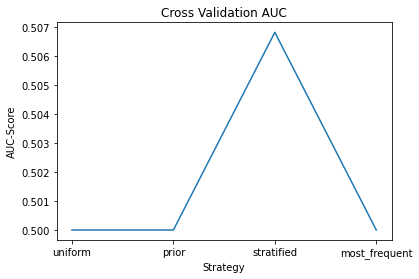

In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

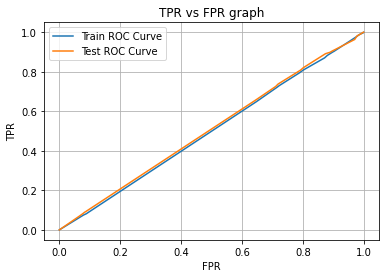

Train AUC Score 0.49937347937242027
Test AUC Score 0.5092084741263658


Train Confusion Matrix


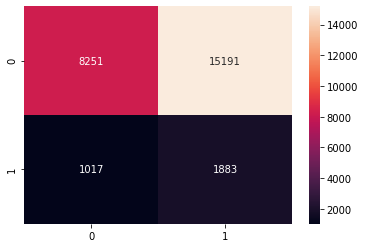


Test Cofusion Matrix


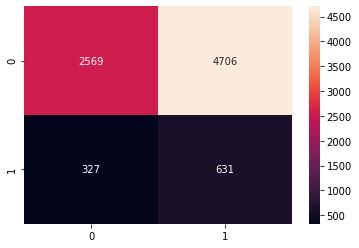

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,x_train_ohe_d,x_test_ohe_d,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe_d), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe_d), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


Stacking of Columns without Duration

In [ ]:

x_train_ohe=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe.shape)
x_cv_ohe=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe.shape)
x_test_ohe=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe.shape)

(26342, 66)
(6586, 66)
(8233, 66)


<h4> K-Nearest Neighbour </h4>

In [ ]:

neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in neighbours:
    knn=KNeighborsClassifier(n_neighbors=k)
   
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))
  


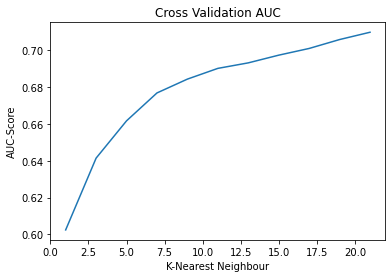

In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [ ]:
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

Best K  21


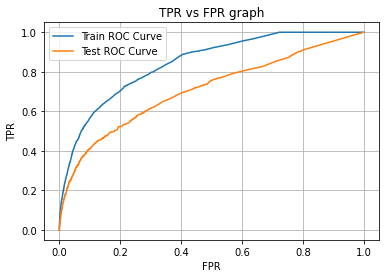

Train AUC Score 0.8426631318970665
Test AUC Score 0.7077483158642361


Train Confusion Matrix


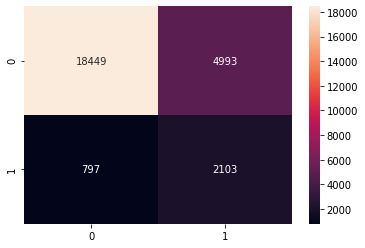


Test Cofusion Matrix


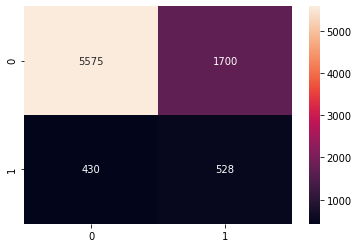

In [ ]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6127122970437586
Test F1-Score: 0.5569974699651474


<h4> Logistic Regression </h4>

In [ ]:

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))




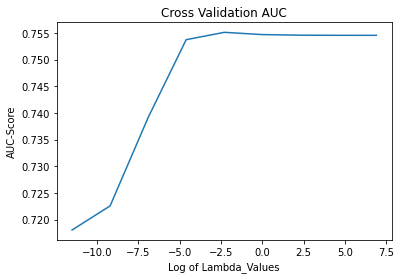

In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [ ]:
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

Best lambda 0.1


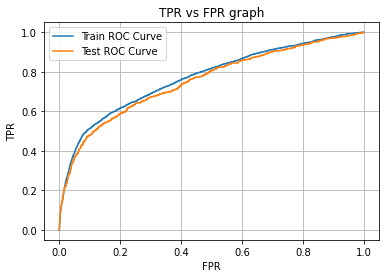

Train AUC Score 0.7704598363091297
Test AUC Score 0.7530170242989045


Train Confusion Matrix


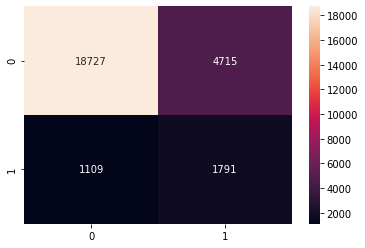


Test Cofusion Matrix


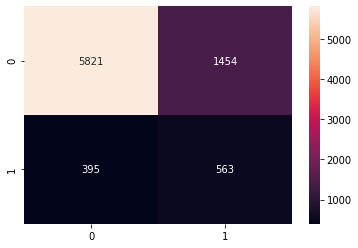

In [ ]:
lr=LogisticRegression(penalty='l2',C=0.1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6135150074159785
Test F1-Score: 0.6142478756159598


<h4> SGD Classifier with log-loss </h4>

In [ ]:

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

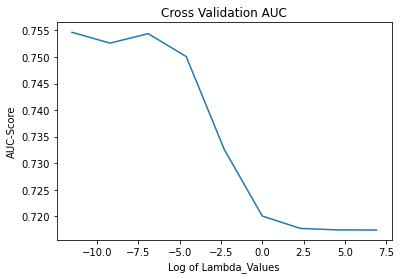

Best lambda 1e-05


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

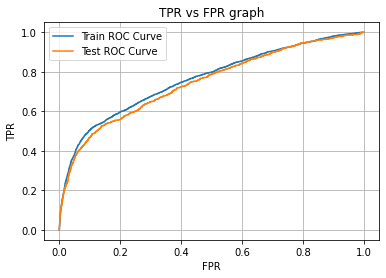

Train AUC Score 0.7610255318335202
Test AUC Score 0.7442869236453379


Train Confusion Matrix


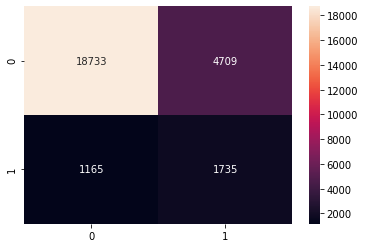


Test Cofusion Matrix


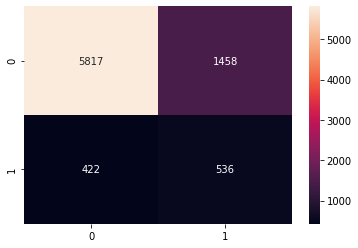

In [ ]:
log=SGDClassifier(loss='log',penalty='l2',alpha=1e-05,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.5839566972700773
Test F1-Score: 0.5788943492861993


<h4> Linear SVM </h4>

In [ ]:

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')
   
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

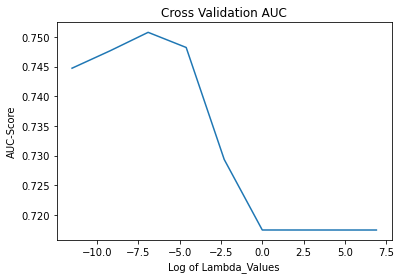

Best lambda 0.001


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

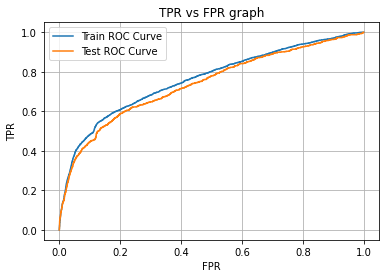

Train AUC Score 0.7597671362041017
Test AUC Score 0.7385348198207893


Train Confusion Matrix


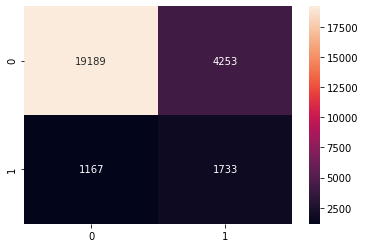


Test Cofusion Matrix


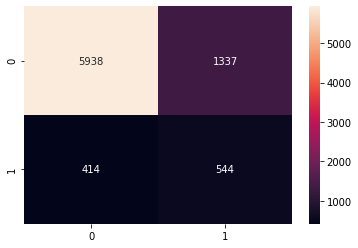

In [ ]:
SVM=SGDClassifier(penalty='l2',alpha=0.001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.5903105374661975
Test F1-Score: 0.5881270687775179


<h4> Dataset For Random Forest and XGBoost Classifier </h4>

In [ ]:
train_dataset=np.hstack((train_age.toarray(),train_job.toarray(),train_marital.toarray(),train_education.toarray(),train_default.toarray(),train_iloan.toarray(),train_contact.toarray(),train_month.toarray(),train_day.toarray(),train_poutcome.toarray(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_dataset.shape)
cv_dataset=np.hstack((cv_age.toarray(),cv_job.toarray(),cv_marital.toarray(),cv_education.toarray(),cv_default.toarray(),cv_iloan.toarray(),cv_contact.toarray(),cv_month.toarray(),cv_day.toarray(),cv_poutcome.toarray(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_dataset.shape)
test_dataset=np.hstack((test_age.toarray(),test_job.toarray(),test_marital.toarray(),test_education.toarray(),test_default.toarray(),test_iloan.toarray(),test_contact.toarray(),test_month.toarray(),test_day.toarray(),test_poutcome.toarray(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_dataset.shape)

(26342, 66)
(6586, 66)
(8233, 66)


<h4> Random Forest </h4>

In [ ]:

number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))


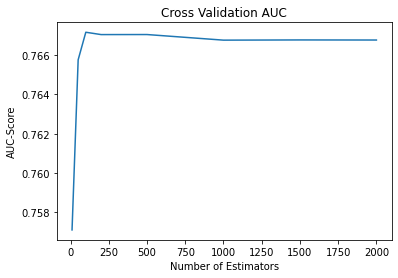

Best number of estimators 100


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

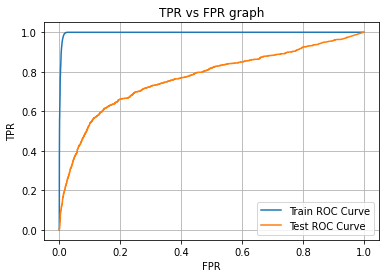

Train AUC Score 0.9977235966096809
Test AUC Score 0.7702160141761544


Train Confusion Matrix


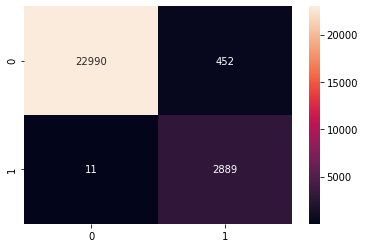


Test Cofusion Matrix


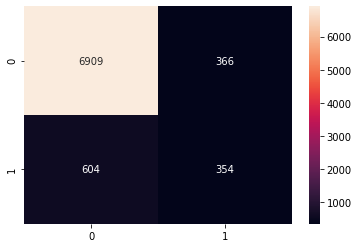

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,class_weight='balanced')
random.fit(train_dataset,y_train)
sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.854948943227742
Test F1-Score: 0.6021373737391328


<h4> XGBoost Classifier </h4>

In [ ]:

number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))




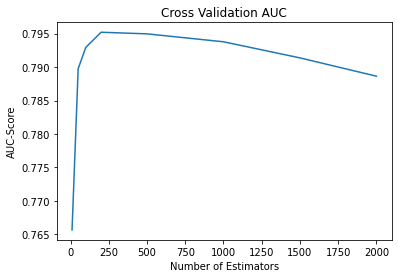

Best number of estimators 200


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

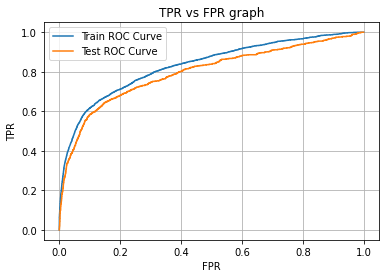

Train AUC Score 0.8319685268704271
Test AUC Score 0.7962804095014672


Train Confusion Matrix


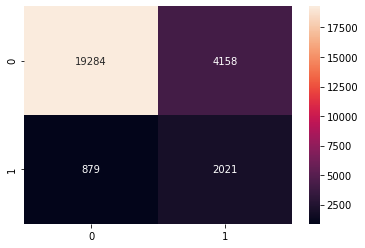


Test Cofusion Matrix


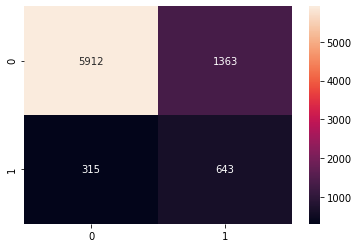

In [ ]:
from xgboost  import XGBClassifier
xgboost=XGBClassifier(n_estimators=200,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.6774797439230871
Test F1-Score: 0.6582594028729296


<h4> Adaboost </h4>

In [ ]:
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

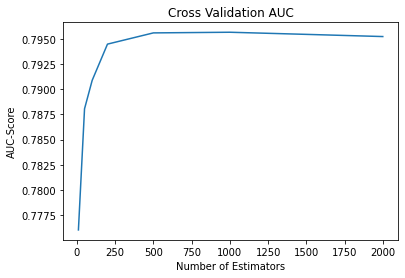

Best number of estimators 1000


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

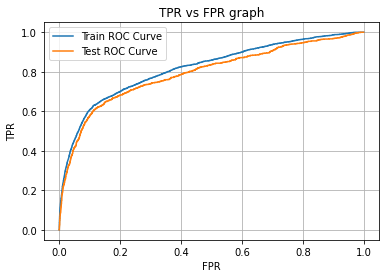

Train AUC Score 0.8179265553427536
Test AUC Score 0.7931101449899203


Train Confusion Matrix


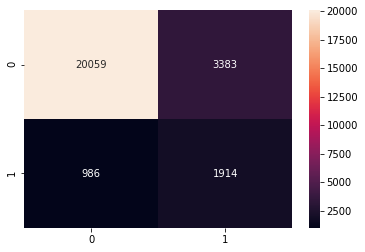


Test Cofusion Matrix


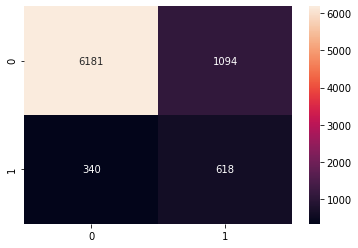

In [ ]:
adaboost=AdaBoostClassifier(n_estimators=1000,random_state=42)
sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.6478186179894485
Test F1-Score: 0.6392366552369025


From above different models we can observe that all the models are performing better than our baseline model. XGBoost was performing best with Test AUC score of 0.7962 which is more than what reserachers got with Neural Network with test AUC of 0.794

<h4> Response Encoding </h4>

In [ ]:
"""this function takes the train dataset and tries to fit the categories and return the positve and negative probablity of each feature
This function is more like fit function that is present in sklearn count_vectoriser """
def response_encoding(feature,y_values):  
    #taking unique values from features and converting it into list.
    unique_values=np.unique(feature).tolist()
    
    y_values=pd.DataFrame(data=y_values)
    df=pd.DataFrame({'feature':feature.values.tolist(),'y_values':y_values.values.flatten().tolist()})
    negative={}
    positive={}
    for values in unique_values:
        count_positive=len(df[(df['feature']==values) & (df['y_values']==1)]) 
        count_negative=len(df[(df['feature']==values) & (df['y_values']==0)])
        negative[values]=count_negative/(count_negative+count_positive)
        positive[values]=count_positive/(count_negative+count_positive)
    return positive,negative

In [ ]:
"""this function is used to transform our dataset based on our fit train dataset. If the category is present it will replace the it with
positive and negative probablity computed during fit function if category is not present it would it with 0.5 probablity for both
positive and negative."""
def transform_response_encoding(feature,positive,negative,y_test_values):
    unique_list=np.unique(feature).tolist()
   
    y_test_values=pd.DataFrame(data=y_test_values)
    dataframe=pd.DataFrame({'feature':feature.values.tolist(),'y_test_values':y_test_values.values.flatten().tolist()})
    
    negative_test={}
    positive_test={}
    for value in unique_list:
        #value which is not present in training data probablity values would be 0.5
        if value not in positive.keys() and negative.keys():
           
            negative_test[value]=0.5
            positive_test[value]=0.5
        else:
            negative_test[value]=negative[value]
            positive_test[value]=positive[value]
    return positive_test,negative_test

In [ ]:
"""Creating the dataframe so as to store all the train cv and test response encoding"""
train_dataset=pd.DataFrame()
cv_dataset=pd.DataFrame()
test_dataset=pd.DataFrame()
print("Done...")

Done...


In [ ]:

positive_values_train,negative_values_train=response_encoding(X_train['age_group'],y_train)

train_dataset['age_group_pos']=X_train['age_group'].map(positive_values_train)
train_dataset['age_group_neg']=X_train['age_group'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['age_group'],positive_values_train,negative_values_train,y_cv)
cv_dataset['age_group_pos']=X_cv['age_group'].map(positive_values_cv)
cv_dataset['age_group_neg']=X_cv['age_group'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['age_group'],positive_values_train,negative_values_train,y_test)
test_dataset['age_group_pos']=X_test['age_group'].map(positive_values)
test_dataset['age_group_neg']=X_test['age_group'].map(negative_values)
print(train_dataset['age_group_neg'].shape)
print(cv_dataset['age_group_neg'].shape)
print(test_dataset['age_group_neg'].shape)





(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['job'],y_train)

train_dataset['job_pos']=X_train['job'].map(positive_values_train)
train_dataset['job_neg']=X_train['job'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['job'],positive_values_train,negative_values_train,y_cv)
cv_dataset['job_pos']=X_cv['job'].map(positive_values_cv)
cv_dataset['job_neg']=X_cv['job'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['job'],positive_values_train,negative_values_train,y_test)
test_dataset['job_pos']=X_test['job'].map(positive_values)
test_dataset['job_neg']=X_test['job'].map(negative_values)
print(train_dataset['job_neg'].shape)
print(cv_dataset['job_neg'].shape)
print(test_dataset['job_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['marital'],y_train)

train_dataset['marital_pos']=X_train['marital'].map(positive_values_train)
train_dataset['marital_neg']=X_train['marital'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['marital'],positive_values_train,negative_values_train,y_cv)
cv_dataset['marital_pos']=X_cv['marital'].map(positive_values_cv)
cv_dataset['marital_neg']=X_cv['marital'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['marital'],positive_values_train,negative_values_train,y_test)
test_dataset['marital_pos']=X_test['marital'].map(positive_values)
test_dataset['marital_neg']=X_test['marital'].map(positive_values)
print(train_dataset['marital_neg'].shape)
print(cv_dataset['marital_neg'].shape)
print(test_dataset['marital_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['education'],y_train)

train_dataset['education_pos']=X_train['education'].map(positive_values_train)
train_dataset['education_neg']=X_train['education'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['education'],positive_values_train,negative_values_train,y_cv)
cv_dataset['education_pos']=X_cv['education'].map(positive_values_cv)
cv_dataset['education_neg']=X_cv['education'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['education'],positive_values_train,negative_values_train,y_test)
test_dataset['education_pos']=X_test['education'].map(positive_values)
test_dataset['education_neg']=X_test['education'].map(negative_values)
print(train_dataset['education_neg'].shape)
print(cv_dataset['education_neg'].shape)
print(test_dataset['education_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['default'],y_train)

train_dataset['default_pos']=X_train['default'].map(positive_values_train)
train_dataset['default_neg']=X_train['default'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['default'],positive_values_train,negative_values_train,y_cv)
cv_dataset['default_pos']=X_cv['default'].map(positive_values_cv)
cv_dataset['default_neg']=X_cv['default'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['default'],positive_values_train,negative_values_train,y_test)
test_dataset['default_pos']=X_test['default'].map(positive_values)
test_dataset['default_neg']=X_test['default'].map(negative_values)
print(train_dataset['default_neg'].shape)
print(cv_dataset['default_neg'].shape)
print(test_dataset['default_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['i_loan'],y_train)

train_dataset['i_loan_pos']=X_train['i_loan'].map(positive_values_train)
train_dataset['i_loan_neg']=X_train['i_loan'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['i_loan'],positive_values_train,negative_values_train,y_cv)
cv_dataset['i_loan_pos']=X_cv['i_loan'].map(positive_values_cv)
cv_dataset['i_loan_neg']=X_cv['i_loan'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['i_loan'],positive_values_train,negative_values_train,y_test)
test_dataset['i_loan_pos']=X_test['i_loan'].map(positive_values)
test_dataset['i_loan_neg']=X_test['i_loan'].map(negative_values)
print(train_dataset['i_loan_neg'].shape)
print(cv_dataset['i_loan_neg'].shape)
print(test_dataset['i_loan_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['contact'],y_train)

train_dataset['contact_pos']=X_train['contact'].map(positive_values_train)
train_dataset['contact_neg']=X_train['contact'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['contact'],positive_values_train,negative_values_train,y_cv)
cv_dataset['contact_pos']=X_cv['contact'].map(positive_values_cv)
cv_dataset['contact_neg']=X_cv['contact'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['contact'],positive_values_train,negative_values_train,y_test)
test_dataset['contact_pos']=X_test['contact'].map(positive_values)
test_dataset['contact_neg']=X_test['contact'].map(negative_values)
print(train_dataset['contact_neg'].shape)
print(cv_dataset['contact_neg'].shape)
print(test_dataset['contact_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['month'],y_train)

train_dataset['month_pos']=X_train['month'].map(positive_values_train)
train_dataset['month_neg']=X_train['month'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['month'],positive_values_train,negative_values_train,y_cv)
cv_dataset['month_pos']=X_cv['month'].map(positive_values_cv)
cv_dataset['month_neg']=X_cv['month'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['month'],positive_values_train,negative_values_train,y_test)
test_dataset['month_pos']=X_test['month'].map(positive_values)
test_dataset['month_neg']=X_test['month'].map(negative_values)
print(train_dataset['month_neg'].shape)
print(cv_dataset['month_neg'].shape)
print(test_dataset['month_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['day_of_week'],y_train)

train_dataset['day_of_week_pos']=X_train['day_of_week'].map(positive_values_train)
train_dataset['day_of_week_neg']=X_train['day_of_week'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['day_of_week'],positive_values_train,negative_values_train,y_cv)
cv_dataset['day_of_week_pos']=X_cv['day_of_week'].map(positive_values_cv)
cv_dataset['day_of_week_neg']=X_cv['day_of_week'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['day_of_week'],positive_values_train,negative_values_train,y_test)
test_dataset['day_of_week_pos']=X_test['day_of_week'].map(positive_values)
test_dataset['day_of_week_neg']=X_test['day_of_week'].map(negative_values)
print(train_dataset['day_of_week_neg'].shape)
print(cv_dataset['day_of_week_neg'].shape)
print(test_dataset['day_of_week_neg'].shape)

(26342,)
(6586,)
(8233,)


In [ ]:
positive_values_train,negative_values_train=response_encoding(X_train['poutcome'],y_train)

train_dataset['poutcome_pos']=X_train['poutcome'].map(positive_values_train)
train_dataset['poutcome_neg']=X_train['poutcome'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['poutcome'],positive_values_train,negative_values_train,y_cv)
cv_dataset['poutcome_pos']=X_cv['poutcome'].map(positive_values_cv)
cv_dataset['poutcome_neg']=X_cv['poutcome'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['poutcome'],positive_values_train,negative_values_train,y_test)
test_dataset['poutcome_pos']=X_test['poutcome'].map(positive_values)
test_dataset['poutcome_neg']=X_test['poutcome'].map(negative_values)
print(train_dataset['poutcome_neg'].shape)
print(cv_dataset['poutcome_neg'].shape)
print(test_dataset['poutcome_neg'].shape)

(26342,)
(6586,)
(8233,)


Stacking of Columns with Duration

In [ ]:
train_duration=np.hstack((train_dataset.to_numpy(),train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train_duration.shape)
cv_duration=np.hstack((cv_dataset.to_numpy(),cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv_duration.shape)
test_duration=np.hstack((test_dataset.to_numpy(),test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test_duration.shape)

(26342, 28)
(6586, 28)
(8233, 28)


<h4> Baseline Model with Duration </h4>

In [ ]:
strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(train_duration, y_train)
    predict_y = sig_clf.predict_proba(cv_duration)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))




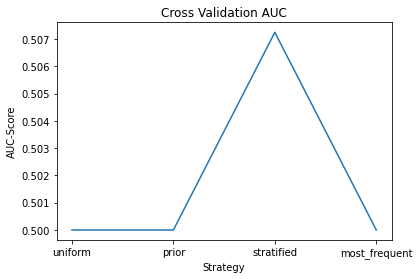

In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

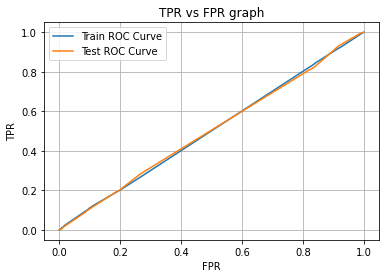

Train AUC Score 0.502449434995837
Test AUC Score 0.5033153979151871


Train Confusion Matrix


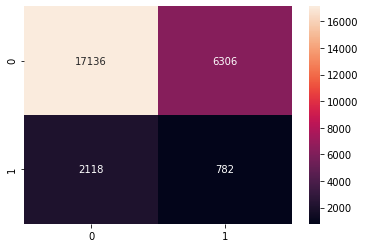


Test Cofusion Matrix


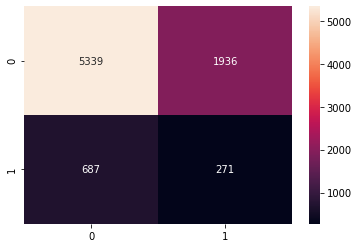

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,train_duration,test_duration,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_duration), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_duration), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


Stacking columns without Duration

In [ ]:
train=np.hstack((train_dataset.to_numpy(),train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train.shape)
cv=np.hstack((cv_dataset.to_numpy(),cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv.shape)
test=np.hstack((test_dataset.to_numpy(),test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test.shape)

(26342, 27)
(6586, 27)
(8233, 27)


<h4> K Nearest Neighbours </h4>

In [ ]:
neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in tq.tqdm(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
   
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

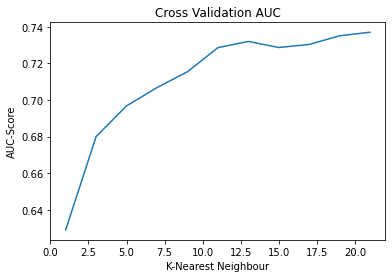

Best K  21


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

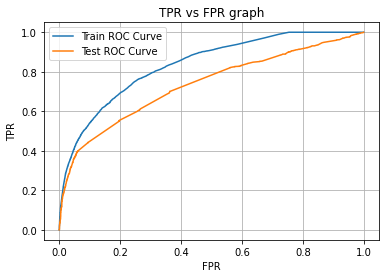

Train AUC Score 0.8353150769764849
Test AUC Score 0.733447259109399


Train Confusion Matrix


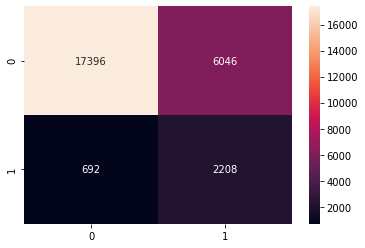


Test Cofusion Matrix


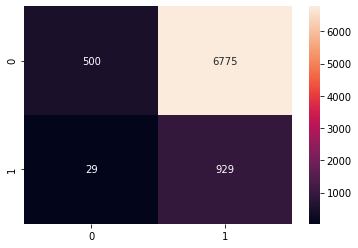

In [ ]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.6374107017479227
Test F1-Score: 0.606764989293566


<h4> Logistic Regression </h4>

In [ ]:

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))




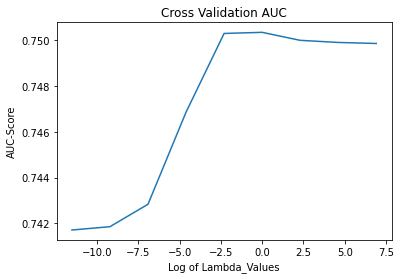

Best lambda 1


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

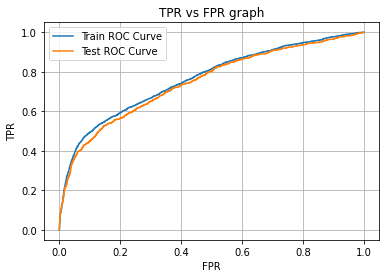

Train AUC Score 0.7632842319562
Test AUC Score 0.7481271118954866


Train Confusion Matrix


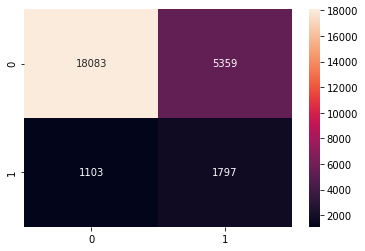


Test Cofusion Matrix


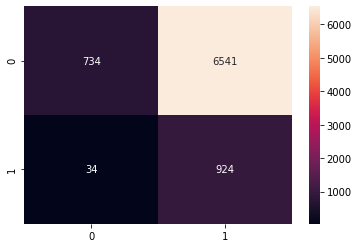

In [ ]:
lr=LogisticRegression(penalty='l2',C=1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.6052963562591491
Test F1-Score: 0.6729381824277094


<h4> SGD with Log-Loss

In [ ]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

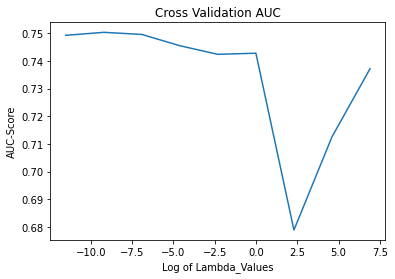

Best lambda 0.0001


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

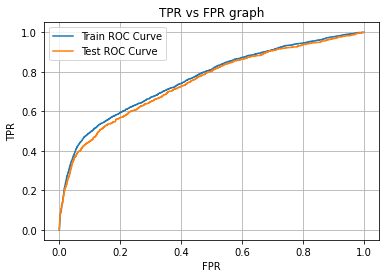

Train AUC Score 0.7631862792688631
Test AUC Score 0.747586897100919


Train Confusion Matrix


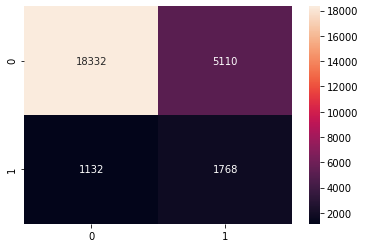


Test Cofusion Matrix


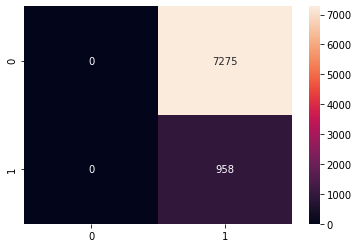

In [ ]:
log=SGDClassifier(loss='log',penalty='l2',alpha=0.0001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.6061395348714396
Test F1-Score: 0.6755097710567222


<h4> Linear SVM </h4>

In [ ]:

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

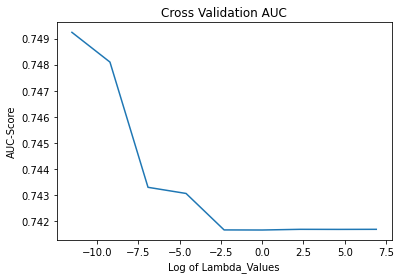

Best lambda 1e-05


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

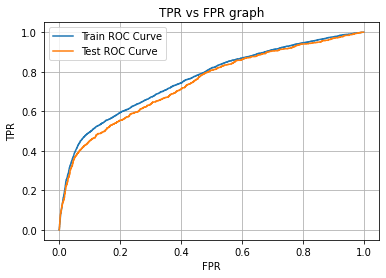

Train AUC Score 0.7631878532195382
Test AUC Score 0.7425110302821599


Train Confusion Matrix


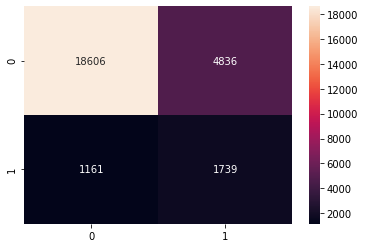


Test Cofusion Matrix


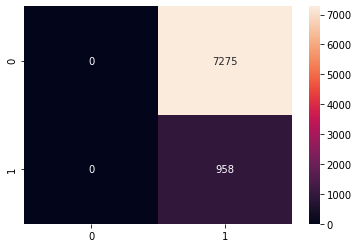

In [ ]:
SVM=SGDClassifier(penalty='l2',alpha=1e-05,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5885947742266415
Test F1-Score: 0.10423240126210423


<h4> Random Forest</h4>

In [ ]:
train_r=np.hstack((train_dataset.to_numpy(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_r.shape)
cv_r=np.hstack((cv_dataset.to_numpy(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_r.shape)
test_r=np.hstack((test_dataset.to_numpy(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_r.shape)

(26342, 27)
(6586, 27)
(8233, 27)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

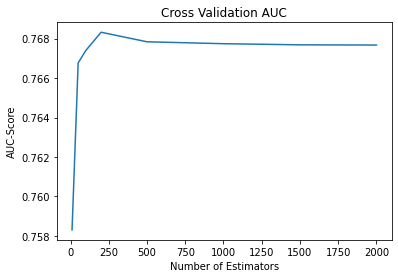

Best number of estimators 200


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

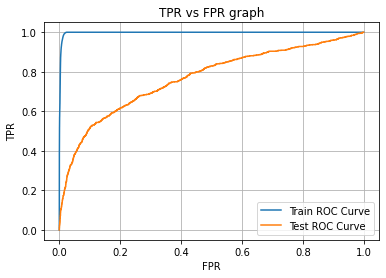

Train AUC Score 0.9979012250337591
Test AUC Score 0.7670582327156377


Train Confusion Matrix


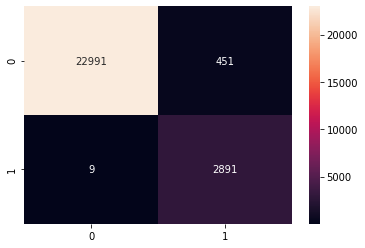


Test Cofusion Matrix


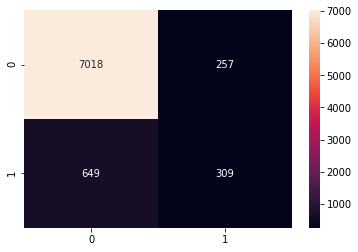

In [ ]:
random=RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.848870208580224
Test F1-Score: 0.5876919711773184


<h4> XGBoost </h4>

In [ ]:
from xgboost  import XGBClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

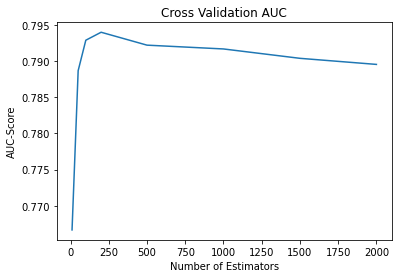

Best number of estimators 200


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

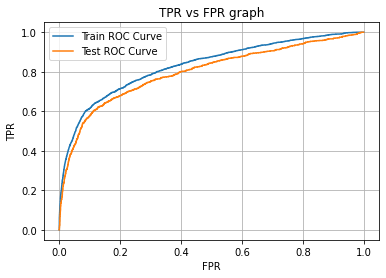

Train AUC Score 0.8305227722714021
Test AUC Score 0.7973039479442425


Train Confusion Matrix


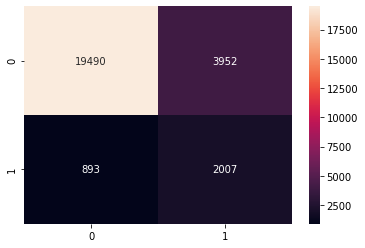


Test Cofusion Matrix


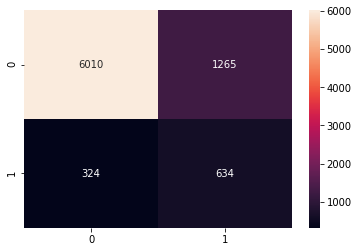

In [ ]:
xgboost=XGBClassifier(n_estimators=200,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.6803229549294108
Test F1-Score: 0.6546067603942072


<h4> Dumping Best Model After Evaluation i.e XGBoost</h4>

In [ ]:
from joblib import dump, load
dump(sig_clf, 'bestmodel.joblib') 

<h4> Adaboost </h4>

In [ ]:

number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

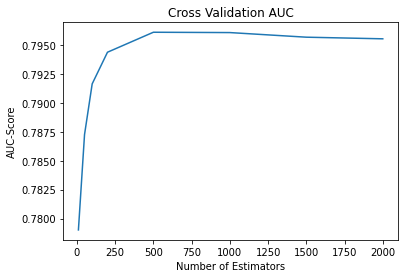

Best number of estimators 500


In [ ]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

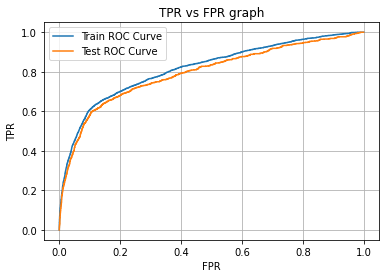

Train AUC Score 0.8163671232594606
Test AUC Score 0.7942831930783634


Train Confusion Matrix


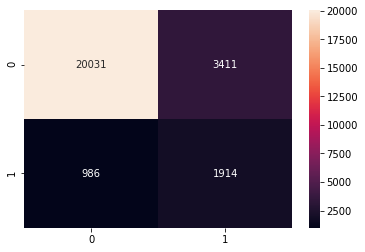


Test Cofusion Matrix


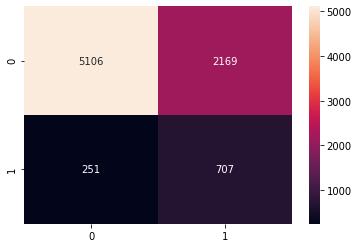

In [ ]:
adaboost=AdaBoostClassifier(n_estimators=500,random_state=42)
sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.6435659626983876
Test F1-Score: 0.6793946862676361


Also,XGboost with response encoding of categorical feature perform better than Xgboost with one hot encoding of categorical fetaure.<br>
For all the models I have  performed  basic hyperparamter tuning. Here I wanted to check which model perform better with which feature encoding. Now it is evident that XGBoost with response encoding performs better.In different Notebook I have created Custom Stacking Model after that we will be proper model evaluation.
